<h1>Proyecto 2<span class="tocSkip"></span></h1>

## Tabla de contenidos
> Parte A
> 1. Exploración y visualización de datos
> 2. Datos Faltantes  
> 3. Det. outliers
> 4. Ing. de datos 
> 5. svd/pca

# Parte A

## Exploración y visaulización de datos

### Importamos las librerías para trabajar

In [1]:
#importamos las librerías necesarias para trabajar.
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(color_codes=True)
from matplotlib import gridspec
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import svm
from sklearn.metrics import r2_score
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from xgboost import plot_importance
from matplotlib import pyplot
from graphviz import Digraph
from xgboost import XGBRegressor
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

## Exploramos el dataset de properati con pandas

In [2]:
df = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')
#Cargamos las primeras 5 instancias
df.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


In [3]:
#Vemos la cantidad de filas y columnas del data frame
df.shape

(146660, 19)

## Comenzamos graficando la cantidad de instancias por tipo de propiedad 

In [4]:
#Generamos una dataframe organizado por tipos de propiedad, ordenando las cantidad de instancias de mayoy a manor y reiniciamos el índice
df_filt1 = df.groupby('property_type').size().to_frame().reset_index()
df_filt1['Tipo de propiedad'] = df_filt1['property_type'] 
df_filt1['Cantidad'] = df_filt1[0] 
df_filt1 = df_filt1.sort_values('Cantidad',ascending=False).reset_index()
df_filt1 = df_filt1.drop(['property_type', 0], axis = 1)
df_filt1 = df_filt1.drop('index', axis = 1)
df_filt1

,Tipo de propiedad,Cantidad
0,Departamento,107326
1,Casa,21521
2,PH,14298
3,Lote,1312
4,Oficina,658
5,Otro,374
6,Local comercial,325
7,Casa de campo,322
8,Depósito,265
9,Cochera,259


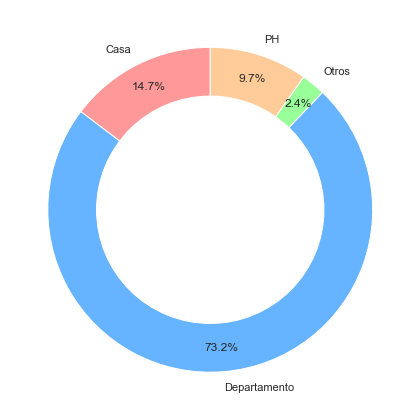

In [5]:
#Graficamos la cantidad de instancias por tipo de propiedad
#Instanciamos los ejes que se quieren graficar.
labels = df_filt1['Tipo de propiedad']
sizes = df_filt1['Cantidad']
#Función que nos permite unificar categorías con instancias por debajo del tercer cuartil en "Otros"
def group_lower_ranking_values(column):
    count = df_filt1.groupby(column).sum()
    pct_value = count[lambda df: df.columns[0]].quantile(.75)
    values_below_pct_value = count[lambda df: df.columns[0]].loc[lambda s: s < pct_value].index.values
    def fix_values(row):
        if row[column] in values_below_pct_value:
            row[column] = 'Otros'
        return row 
    count_grouped = df_filt1.apply(fix_values, axis=1).groupby(column).sum()
    return count_grouped
sizes = group_lower_ranking_values('Tipo de propiedad')
labels = sizes.index
#Graficamos 
labels = labels
sizes = sizes
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
fig = plt.figure(figsize=(8, 6))
ax = plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.tight_layout()
plt.show()

En el gráfico se puede observar que casi un 98% de las instancias se agrupan en las categorías: "Departamento", "Casa y "PH". El resto de las categorías tienen muy pocas observaciones.

In [6]:
#Agrupamos por regiones y generamos un dataframe ordeanado de mayor a menor cantidad instancias y con nuevo índice.
regiones_cant = df.groupby("l2").size().to_frame().reset_index()
regiones_cant['Regiones'] = regiones_cant['l2']
regiones_cant['Cantidad'] = regiones_cant[0]
regiones_cant = regiones_cant.drop(['l2', 0], axis = 1)
regiones_cant = regiones_cant.sort_values('Cantidad',ascending=False)
regiones_cant = regiones_cant.reset_index()
regiones_cant = regiones_cant.drop(['index'], axis = 1)
regiones_cant

,Regiones,Cantidad
0,Capital Federal,92539
1,Bs.As. G.B.A. Zona Norte,24282
2,Bs.As. G.B.A. Zona Sur,17173
3,Bs.As. G.B.A. Zona Oeste,12666


In [7]:
#mismo procedimiento agrupados por barrios. 
barrios_cant = df.groupby("l3").size()
barrios_cant = barrios_cant.to_frame()
barrios_cant = barrios_cant.reset_index()
barrios_cant['Barrios'] = barrios_cant['l3']
barrios_cant['Cantidad'] = barrios_cant[0]
barrios_cant = barrios_cant.drop(['l3', 0], axis = 1)
barrios_cant = barrios_cant.sort_values('Cantidad',ascending=False)
barrios_cant = barrios_cant.reset_index()
barrios_cant = barrios_cant.drop(['index'], axis = 1)
barrios_cant

,Barrios,Cantidad
0,Palermo,13073
1,Tigre,8718
2,Almagro,7527
3,Belgrano,6935
4,Caballito,6650
...,...,...
84,Cañuelas,108
85,Villa Soldati,69
86,Villa Riachuelo,42
87,Marcos Paz,35


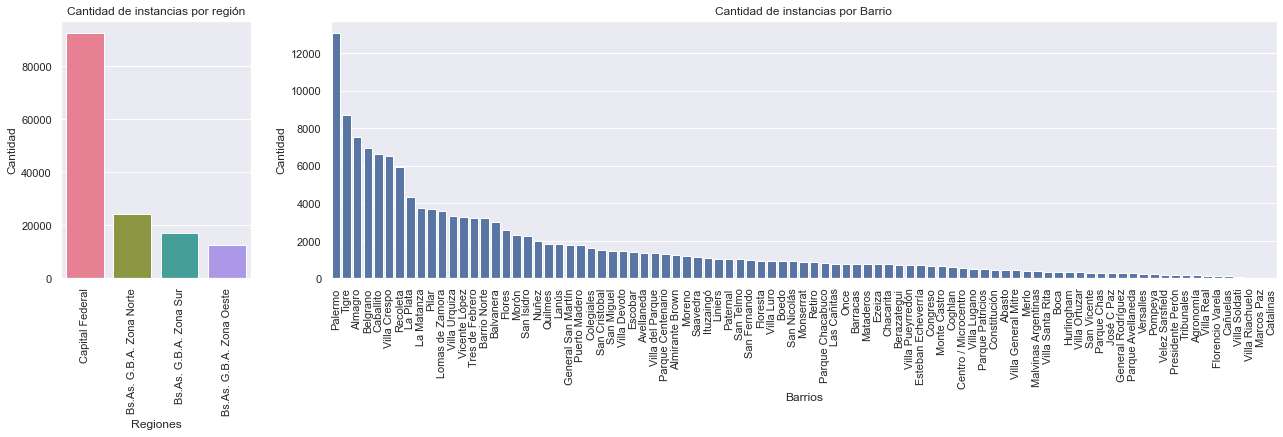

In [8]:
#Realizamos gráficos de barras de ambos dataframe. Usamos la función Gridspec para setear la proporción de cada gráfico en el espacio con el fin de mejorar la visualización.
from matplotlib import gridspec
fig = plt.figure(figsize=(18,10))
gs = gridspec.GridSpec(2, 2, width_ratios=[1, 5])
plt.subplot(gs[0])
plt.title('Cantidad de instancias por región')
plt.xticks(rotation = 90)
ax = sns.barplot(x = 'Regiones', y = 'Cantidad', data= regiones_cant, palette = 'husl')
plt.subplot(gs[1])
plt.title('Cantidad de instancias por Barrio')
plt.xticks(rotation = 90)
ax2 = sns.barplot(x = 'Barrios', y = 'Cantidad', data= barrios_cant, color = 'b')


plt.tight_layout()
plt.show()

En los gráficos podemos observar que la Capital Federal es la región con más instancias y dentro de los barrios, se ubica palermo como el barrio con más publicaciones

### Superficie total y cubierta


Text(0.5, 1.0, 'Gráfico de catplot con superficie total y tipo de propiedad')

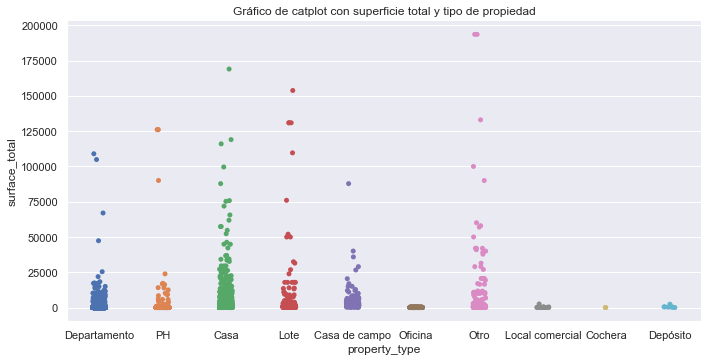

In [9]:
#Graficamos la superficie total por cada tipo de propiedad.
sns.catplot(x = 'property_type', y = 'surface_total', data = df, hue = 'property_type',  height=5, aspect=2)
plt.title('Gráfico de catplot con superficie total y tipo de propiedad')

Observando este gráfico podemos tener una idea de qué tipo de propiedad contiene más outliers

Vamos a realizar un gráfico boxplot analizando la superficie total y el tipo de propiedad


In [10]:
# Seleccionamos las dos variables
surface_total = ['surface_total', 'property_type']
sup_total = df[surface_total]
sup_total.head()

,surface_total,property_type
0,140.0,Departamento
1,70.0,PH
2,45.0,PH
3,85.0,PH
4,50.0,PH


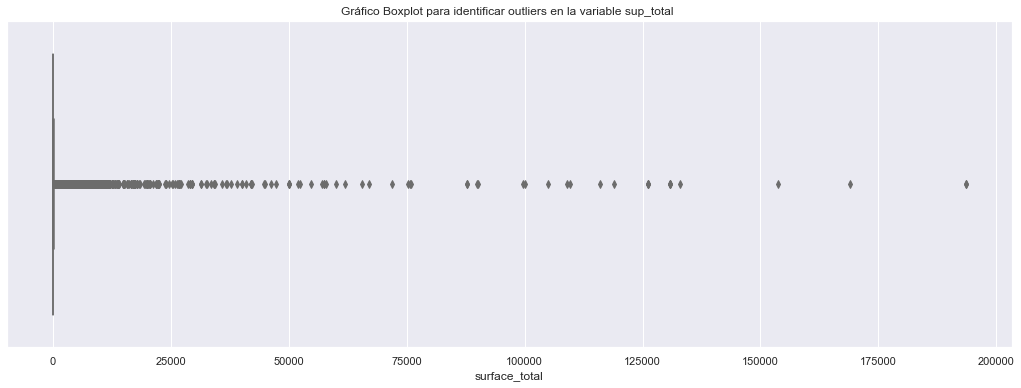

In [11]:
#Realizamos un Gráfico Boxplot para identificar outliers.
fig = plt.figure(figsize=(18, 6))
plt.title('Gráfico Boxplot para identificar outliers en la variable sup_total ')
ax = sns.boxplot(x ='surface_total',  data= sup_total, color = 'r', palette = 'husl')

Podemos observar que en la variable sup_total, hay una gran cantidad de outliers, lo tendremos en cuenta al momento de tratarlos.


Verificamos  que no haya propiedades con una superficie cubierta mayor que la superficie total

In [12]:
# Realizamos un filtro para encontrar aquellas propiedades cuya sup total sea menor a la cubierta
wrong_sup = df[df.surface_total < df.surface_covered]
print('Hay {} instancias con superficie cubierta mayor que superficie total.'.format(wrong_sup.shape[0]))

Hay 1432 instancias con superficie cubierta mayor que superficie total.


Sabemos que hay 1432 instancias en las cuales la superficie cubierta supera a la total. Como dato erroneo podemos tomar dos caminos, borras esas observaciones o pensar por qué fueron ingresadas de manera errónea. En este caso, una posibilidad es que se hayan ingresado los valores de mánera opuesta. Los valores de superficie cubierta deberían ir en los valores totales.

En este caso, elegimos cambiar los valores. Al ser un número considerable, podrían ser datos relevantes para el modelo

In [13]:
df.at[wrong_sup.index, 'surface_total'] = wrong_sup.surface_covered
df.at[wrong_sup.index, 'surface_covered'] = wrong_sup.surface_total
#verificamos el cambio
wrong_sup = df[df.surface_total < df.surface_covered]
print('Hay {} instancias con superficie cubierta mayor que superficie total.'.format(wrong_sup.shape[0]))

Hay 0 instancias con superficie cubierta mayor que superficie total.


## Latitud y longitud
Realizamos un conteo para verificar si son datos reales o hacen referencia a alguna ubicación en particular.

In [14]:
lat_long_frec = df.groupby(['lat', 'lon']).size()
lat_long_frec = lat_long_frec[lat_long_frec > 1].sort_values(ascending=False)
lat_long_frec.head(20)

lat         lon       
-34.425087  -58.579659    516
-34.597256  -58.445498    254
-34.578066  -58.426532    236
-34.579326  -58.455819    217
-34.596762  -58.421589    205
-34.587383  -58.397276    190
-34.542750  -58.460145    169
-34.589767  -58.420728    168
-34.618150  -58.394095    160
-34.602133  -58.466831    156
-34.601364  -58.430143    153
-34.605265  -58.424579    151
-34.588007  -58.420122    139
-34.597679  -58.443019    132
-34.615924  -58.440603    130
-34.602046  -58.443942    128
-34.604387  -58.451789    127
-34.603219  -58.432771    127
-34.615243  -58.406220    126
-34.603995  -58.413336    126
dtype: int64

Podemos ver que hay muchas instancias que se repiten. Posiblemente usaron puntos de referencia para aquellas propiedades cuya ubicación era desconocida.


In [15]:
# Realizamos una correlación entre las variables 'lat', 'lon' y 'price'
lat_long_corr = df[['lat', 'lon', 'price']]
corr = lat_long_corr.corr()

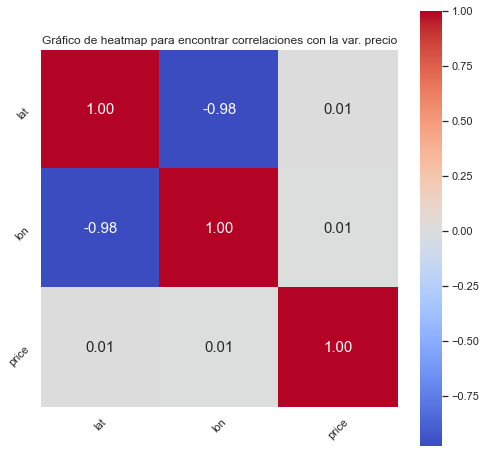

In [16]:
# Graficamos un heatmap para ver las correlaciones
plt.figure(figsize=(8,8))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15}, cmap= 'coolwarm')
plt.title('Gráfico de heatmap para encontrar correlaciones con la var. precio')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

En el gráfico de heatmap podemos identificar una correlación muy baja entre el precio y las variables lat y long. Asimismo, una correlación negativa lógica de casi 1 entre lat y lon, debido a que son coordenadas polares. 

## Exploración de datos faltantes

#### Detectando valores faltantes de forma numérica

Utilizamos la función  missing_values_table(df) para observar las columnas del dataset que tiene datos faltantes. La función también calcula el porcentaje de valores faltantes respecto al total

In [17]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns



In [18]:
#instanciamos la función
df_missing= missing_values_table(df)
df_missing

Your selected dataframe has 19 columns.
There are 5 columns that have missing values.


,Missing Values,% of Total Values
surface_covered,21614,14.7
surface_total,20527,14.0
lon,9959,6.8
lat,9925,6.8
bathrooms,5957,4.1


Las variables con valores faltantes son "surface_covered", "surface_total", "lon", "lat" y "bathrooms"
Realizaremos un análisis de los datos faltantes con el objetivo de conocer su origen. Una vez identificados los patrones de ausencia,  podemos realizar un tratamiento de estos datos en función de la categoría de "missing value" obtenida.
Los mecanismos por los cuales existen datos faltantes en un dataset se conocen como: MAR, NMAR Y MCAR. A continuación, estudiaremos estos datos a fin de poder clasificarlos. 

### Detectando los valores faltantes de manera gráfica

El gráfico de barras que se muestra a continuación nos da una idea sobre los datos vacíos en el deataset. Las columnas "surface_covered", "surface_total", "lon", "lat" y "bathrooms" tienen valores faltantes.

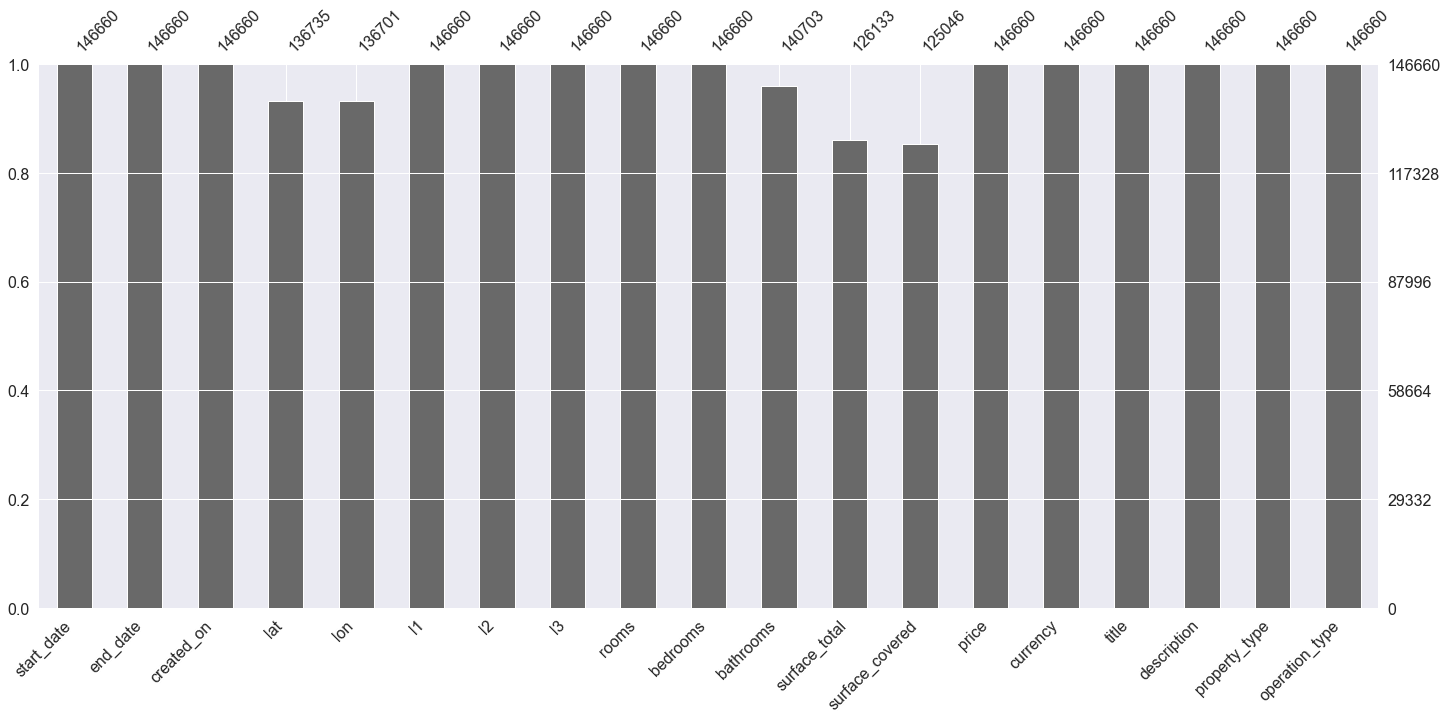

In [19]:
import missingno as msno
msno.bar(df)

### Visualizando la ubicación de los datos faltantes

Con la función msno.matrix podemos encontrar patrones sobre los datos faltantes con la finalidad de entender su origen.

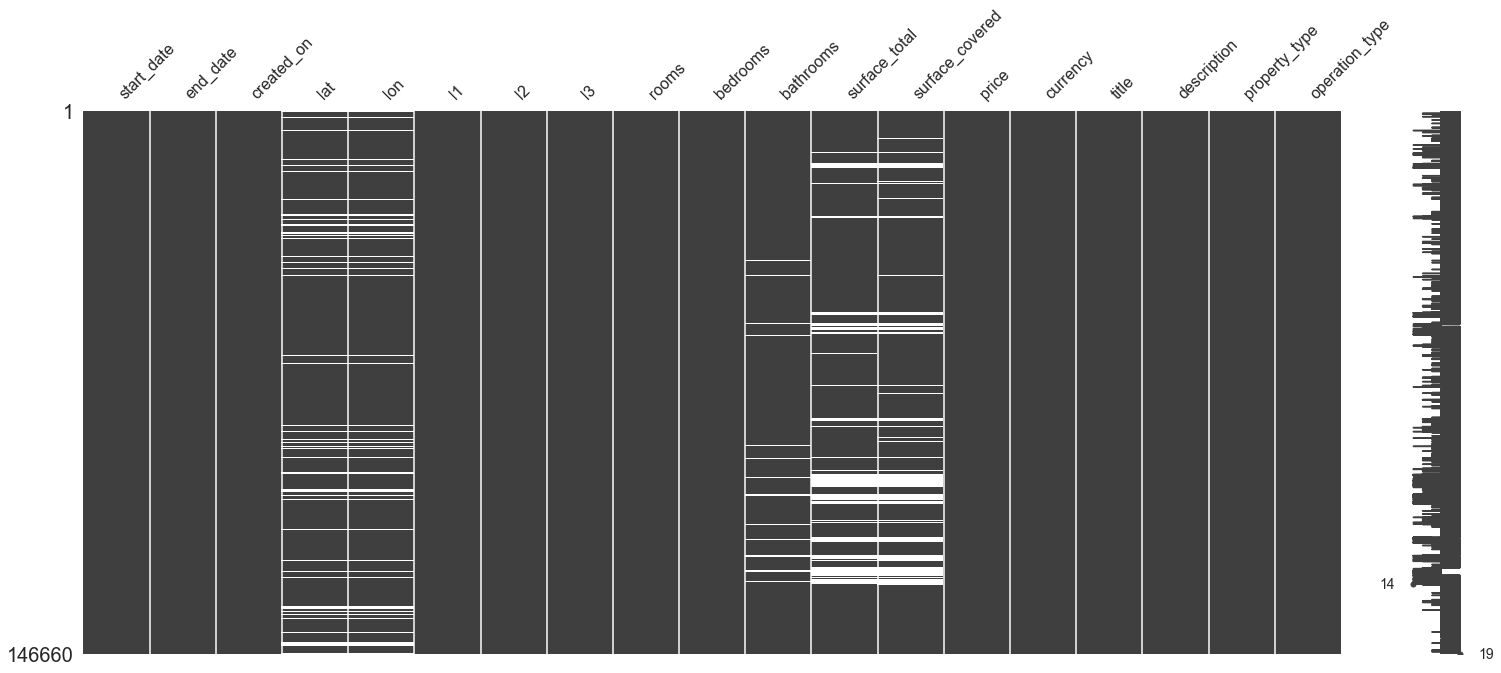

In [20]:
msno.matrix(df)


* En el gráfico de barras se pueden observar los valores faltantes en blanco. 

* El gráfico de la derecha nos da una idea de la forma general de los vacíos en el dataset. 


En un primer análisis se pueden observar algunas correlaciones entre los datos faltantes. Resultan evidentes de manera gráfica que tanto longitud como latitud y superficie total y cubierta están fuertemente correlacionadas. Sin embargo, no aporta mucha evidencia respecto a su origen. Tiene sentido que si no se tomó un dato sobre la latitud tampoco esté la longitud. Ambos se desglozan de otra variable, la ubicación.
En el caso de las superficies, hay instancias que faltan con asimetría. En algunas solo están ausentes en sup. total y otras en sup. cubierta. Pero en general, están ausentes en forma sincrónica. 
En la variable cantidad de baños, no podemos hacer una inferencia sobre su origen observando el gráfico. Si podemos realizarla analizado el origen del dataset. Una posibilidad es que estén relacionados a tipos de propiedad que no tienen baños

A continuación vamos a graficar los datos faltantes ordenados según variables con todas las observaciones presentes. En caso de encontrar alguna correlación podríamos clasificarlo como "MAR". Datos nulos que no son una muestra aleatoria simple de todos los valores sino el resultado de la dependencia de una o más de las variables medidas en el análisis. 


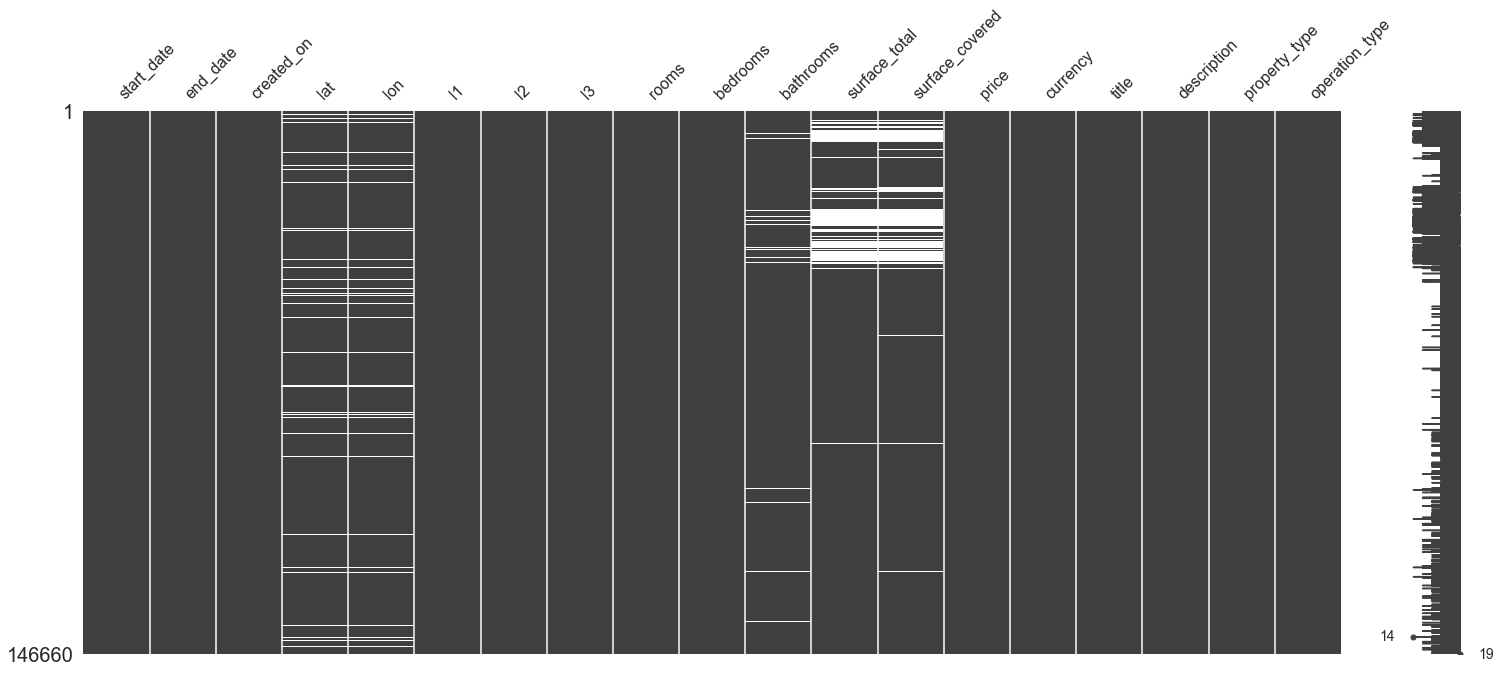

In [21]:
#Empezamos ordenando según la primera variable star_date
sorted = df.sort_values('start_date', ascending = False)
msno.matrix(sorted)

Parece haber un relación entre esta variable y los datos faltantes de surface_total y surface_covered

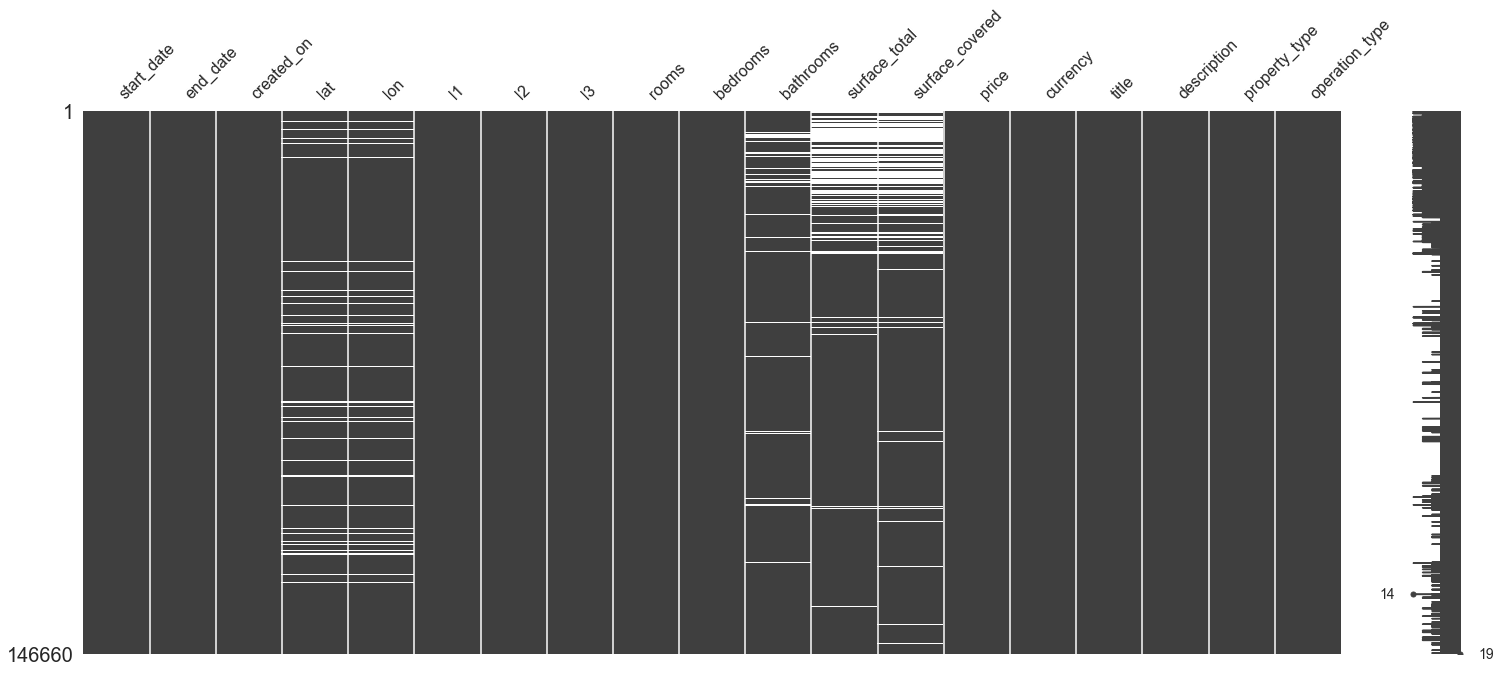

In [22]:
#Mismo procedimiento con end_date
sorted = df.sort_values('end_date', ascending = False)
msno.matrix(sorted)

Las fechas más recientes de baja del anuncia se corresponden con muchos datos faltantes en las catagorías de superficie de una manera más evidente que en start date. Vamos a analizar estás variables. 
Realizamos un filtrado por datos nulos en surface_total y los agrupamos por end_date

In [23]:
df_sup_total_miss = df.surface_total.isnull().groupby([df['end_date']]).sum().astype(int).reset_index(name='count').sort_values('count', ascending = False).reset_index()
df_sup_total_miss = df_sup_total_miss.drop(['index'], axis = 1, inplace = False)
df_sup_total_miss 


,end_date,count
0,9999-12-31,16173
1,2020-01-18,697
2,2020-02-14,384
3,2020-01-25,286
4,2019-12-05,208
...,...,...
407,2019-06-19,0
408,2019-06-13,0
409,2019-06-10,0
410,2019-06-06,0


Hay una fecha inválida con la mayor parte de las observaciones nulas. 9999-12-31. Hacemos una descripción estadística de los datos.

In [24]:
df_sup_total_miss.describe().round()

,count
count,412.0
mean,50.0
std,798.0
min,0.0
25%,0.0
50%,0.0
75%,2.0
max,16173.0


Vemos el 75% de los datos se agrupan en un valor de 2 siendo el valor máximos 16173 correspondiente a la fecha 9999-12-31.
Filtramos por la media y realizamos un gráfico para tener una idea de la distribución. 

In [25]:
mayor_a_0 = df_sup_total_miss.loc[:, 'count']> 50
df_sup_total_miss_filt = df_sup_total_miss.loc[mayor_a_0]
df_sup_total_miss_filt

,end_date,count
0,9999-12-31,16173
1,2020-01-18,697
2,2020-02-14,384
3,2020-01-25,286
4,2019-12-05,208
5,2020-03-18,169
6,2020-01-24,140
7,2020-03-03,130
8,2020-03-14,114
9,2020-02-11,86


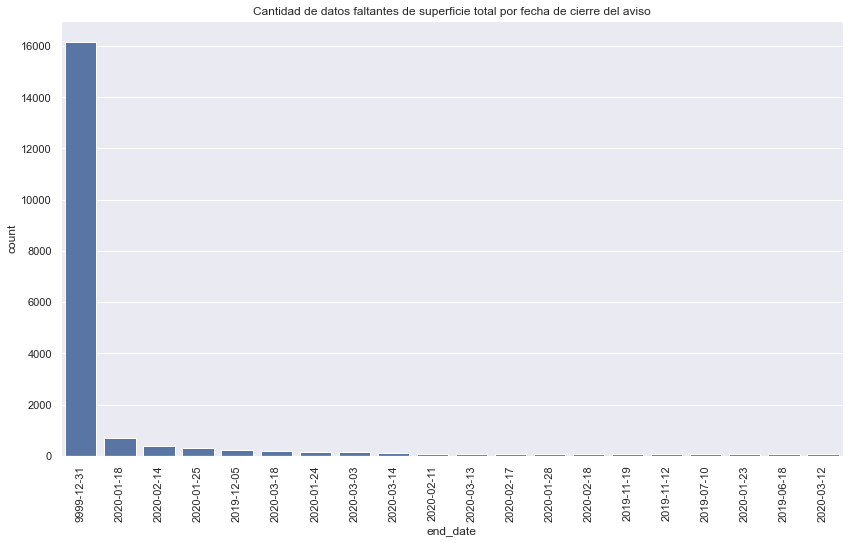

In [26]:
#Graficamos
plt.figure(figsize=(14, 8))
plt.title('Cantidad de datos faltantes de superficie total por fecha de cierre del aviso')
plt.xticks(rotation = 90)
ax = sns.barplot(x = 'end_date', y = 'count', data= df_sup_total_miss_filt, color='b')

En el gráfico se obseva que la gran mayoría de datos faltantes en las variables de superficie se agrupan en una sola fecha. 
De los 20527 valores nulos correspondientes a surface_total, 16173 corresponden solo a la fecha 9999-12-31. Dada esta relación podemos suponer que los datos faltantes se clasifican como MAR. Son valores relacionados con una columna cuyos datos están completos.
Sin embargo, la fecha es un dato erróneo. Posiblemente se utiliza para aquellas instancias que seguían publicadas al momento de extraer el dataset de la página de properati. Si bien podría considerarse como un MAR, la variable de la cual depende es un dato erróneo, no podemos establecer una correlación porque la razón por la cual el dato es nulo no la podemos conocer ni inferir con el dataset, por eso vamos a considerar a los datos de surface_total como MCAR
Realizamos otro filtrado por esa fecha en end_date para entender un poco más sobre estos valores.

In [27]:
#Filtramos por fecha 9999-12-31 en end_date
df3 = df.copy()
end_date_99991231 = df3.end_date == '9999-12-31'
df3 = df[end_date_99991231]
df3

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
26,2019-10-17,9999-12-31,2019-10-17,NaN,NaN,Argentina,Bs.As. G.B.A. Zona Oeste,Morón,2.0,1.0,1.0,45.0,45.0,110000.0,USD,VENTA DEPARTAMENTO EN CIUDAD JARDIN,Venta departamento de 2 ambientes en excelente...,Departamento,Venta
50,2019-10-17,9999-12-31,2019-10-17,-34.583199,-58.433708,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,54.0,54.0,240000.0,USD,"Se vende lindo departamento nuevo, 2 ambiente...","Edificio nuevo de 8 pisos, linda y exclusiva ...",Departamento,Venta
65,2019-10-17,9999-12-31,2019-10-17,-34.562661,-58.465351,Argentina,Capital Federal,Belgrano,2.0,1.0,1.0,31.0,31.0,114300.0,USD,Estilo industrial compuesto de excelentes mate...,Emprendimiento en pozoDepartamento dos ambient...,Departamento,Venta
68,2019-10-17,9999-12-31,2019-10-17,-34.562661,-58.465351,Argentina,Capital Federal,Belgrano,2.0,1.0,1.0,41.0,41.0,125600.0,USD,Estilo industrial compuesto de excelentes mate...,Emprendimiento en pozoDepartamento dos ambient...,Departamento,Venta
74,2019-10-17,9999-12-31,2019-10-17,-34.562661,-58.465351,Argentina,Capital Federal,Belgrano,2.0,1.0,1.0,41.0,41.0,138400.0,USD,Estilo industrial compuesto de excelentes mate...,Emprendimiento en pozoDepartamento dos ambient...,Departamento,Venta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146286,2019-07-31,9999-12-31,2019-07-31,-34.532292,-58.465984,Argentina,Bs.As. G.B.A. Zona Norte,Vicente López,4.0,3.0,2.0,250.0,150.0,980000.0,USD,EXCELENTE DEPARTAMENTO A ESTRENAR EN COMPLEJO ...,"Excelente ubicación, en Complejo Al Río, depar...",Departamento,Venta
146472,2019-07-31,9999-12-31,2019-07-31,-34.580357,-58.434867,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,58.0,48.0,196146.0,USD,Unidad 2 ambientes en venta - Nicaragua 5747 -...,"Excelente unidad de 2 ambientes en venta, cuen...",Departamento,Venta
146528,2019-07-31,9999-12-31,2019-07-31,-34.580357,-58.434867,Argentina,Capital Federal,Palermo,3.0,2.0,2.0,77.0,68.0,237677.0,USD,Unidad 3 Ambientes en venta - Nicaragua 5747 -...,"Excelente unidad de 3 ambientes, cuenta con to...",Departamento,Venta
146535,2019-07-31,9999-12-31,2019-07-31,-34.580357,-58.434867,Argentina,Capital Federal,Palermo,3.0,2.0,1.0,85.0,74.0,266647.0,USD,Unidad 3 ambientes en venta - Nicaragua 5747 -...,"Excelente unidad de 3 ambientes en venta, cuen...",Departamento,Venta


Las fechas de alta de la publicación son válidas, posiblemente sea una manera de ingresar un valor que indique que la publicación sigue vigente.


## Analizando los datos faltantes en la variable "bathrooms"
Comenzamos realizando un filtrado por tipos de propiedad con el objetivo de comprobar si los datos faltantes son de propiedades que no suelen tener baños

In [28]:
# Realizamos un filtrado de los datos faltantes correspondientes a la variable Baños
# Generamos un df con los tipos de propiedad y el conteo de los datos faltantes
df_conteo_bathrooms = df.bathrooms.isnull().groupby([df['property_type']]).sum().astype(int).reset_index(name='count')
df_conteo_bathrooms = df_conteo_bathrooms.sort_values('count',ascending=False).reset_index().drop('index', axis = 1)
df_conteo_bathrooms['Tipos de propiedad'] = df_conteo_bathrooms['property_type'] 
df_conteo_bathrooms['Datos faltantes en bathrooms'] = df_conteo_bathrooms['count']
df_conteo_bathrooms = df_conteo_bathrooms.drop(['property_type', 'count'], axis = 1)
df_conteo_bathrooms


,Tipos de propiedad,Datos faltantes en bathrooms
0,Departamento,2696
1,Casa,1337
2,Lote,835
3,Cochera,250
4,Depósito,229
5,PH,178
6,Local comercial,171
7,Otro,128
8,Oficina,112
9,Casa de campo,21


In [29]:
#df_conteo_bathrooms['Proporción datos faltantes con el total de instancias por tipo de propiedad'] 
#dn_bathrooms = df_conteo_bathrooms['Datos faltantes en bathrooms'].to_frame()
#dn_bathrooms
df.groupby(df.property_type).size().to_frame().sort_values(0, ascending = False)
#/df_conteo_bathrooms.groupby(df_conteo_bathrooms['Datos faltantes en bathrooms']).size()
#df_conteo_bathrooms['Datos faltantes en bathrooms']

,0
property_type,
Departamento,107326
Casa,21521
PH,14298
Lote,1312
Oficina,658
Otro,374
Local comercial,325
Casa de campo,322
Depósito,265


Graficamos la cantidad y proporción de datos nulos de la variable bathrooms

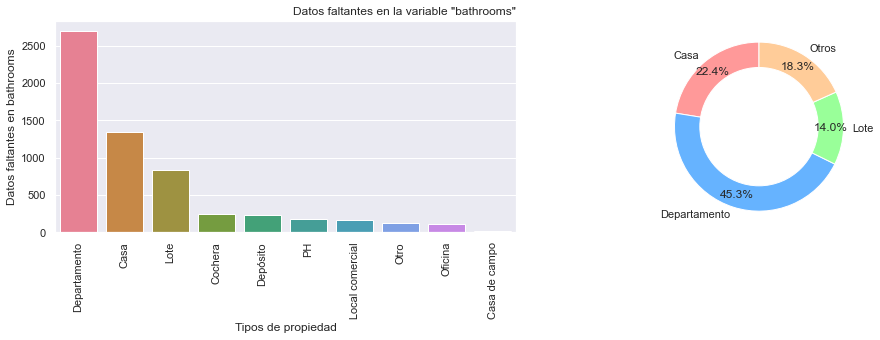

In [30]:
fig = plt.figure(figsize=(14, 8))
gs = gridspec.GridSpec(2, 2, width_ratios=[20, 20])
plt.subplot(gs[0])
plt.title('Datos faltantes en la variable "bathrooms"', 
 loc='right')
ax = sns.barplot(x='Tipos de propiedad', y= 'Datos faltantes en bathrooms', data= df_conteo_bathrooms, color = 'r', palette = 'husl') 

for item in ax.get_xticklabels():
       item.set_rotation(90)
#Instanciamos los ejes que se quieren graficar.
labels = df_conteo_bathrooms['Tipos de propiedad']
sizes = df_conteo_bathrooms['Datos faltantes en bathrooms']
#Función que nos permite unificar categorías con instancias por debajo del tercer cuartil en "Otros"
def group_lower_ranking_values(column):
    bath_count = df_conteo_bathrooms.groupby(column).sum()
    pct_value = bath_count[lambda df: df.columns[0]].quantile(.75)
    values_below_pct_value = bath_count[lambda df: df.columns[0]].loc[lambda s: s < pct_value].index.values
    def fix_values(row):
        if row[column] in values_below_pct_value:
            row[column] = 'Otros'
        return row 
    bath_grouped = df_conteo_bathrooms.apply(fix_values, axis=1).groupby(column).sum()
    return bath_grouped
sizes = group_lower_ranking_values('Tipos de propiedad')
labels = sizes.index
#Graficamos 
labels = labels
sizes = sizes
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
plt.subplot(gs[1])

ax2 = plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.tight_layout()
plt.show()


La mayor cantidad de datos nulos corresponden a departamento, siendo la categoría con más observaciones en el dataset original. Lote, cochera y depósito suelen ser propiedades sin baños. Por lo tanto tendremos que buscar si existe otro origen a los datos nulos, utilizaremos un dendrograma y un heatmap que correlacionan datos nulos

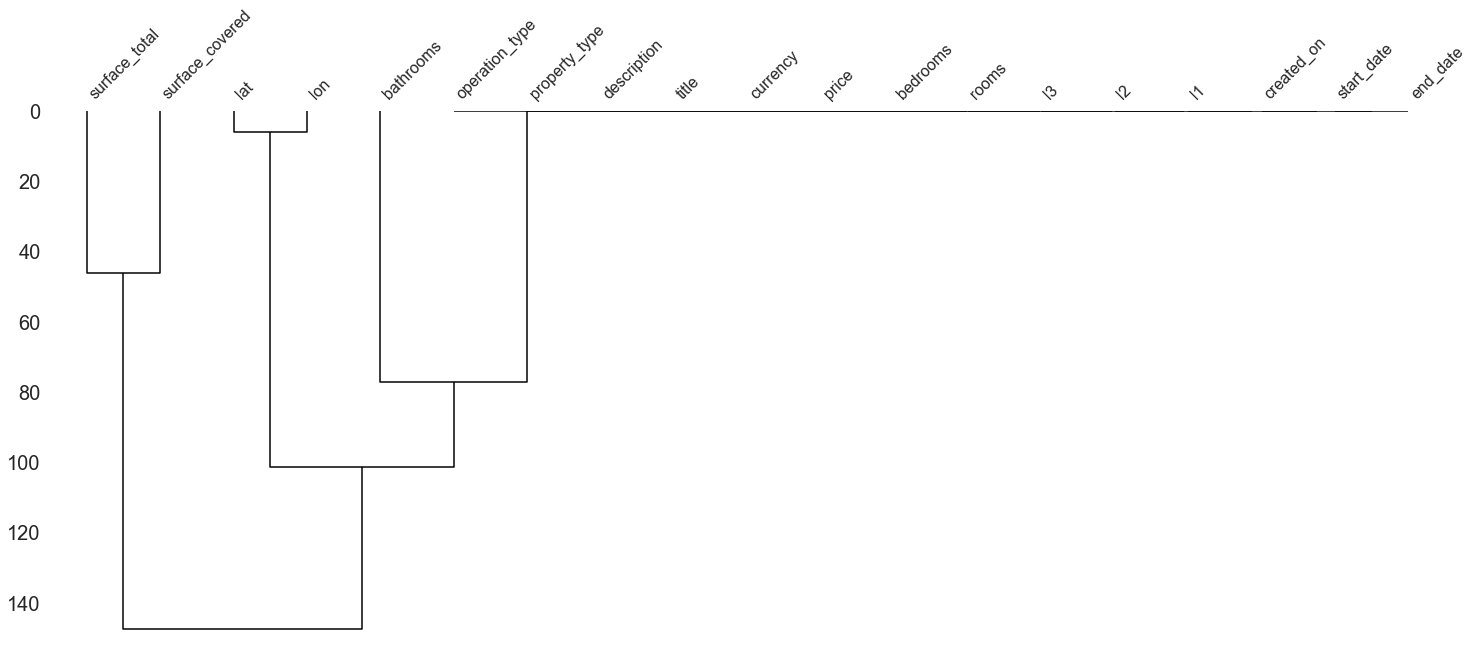

In [31]:
#graficamos con el dataset origial
msno.dendrogram(df)

El dendrograma utiliza un algoritmo de clustering jerárquico para visualizar los datos nulos que tengan alguna similitud. En este caso bathrooms tiene una raiz con surface_total y surface_covered. Realizaremos un heatmap para graficar la posible correlación entre las variables.

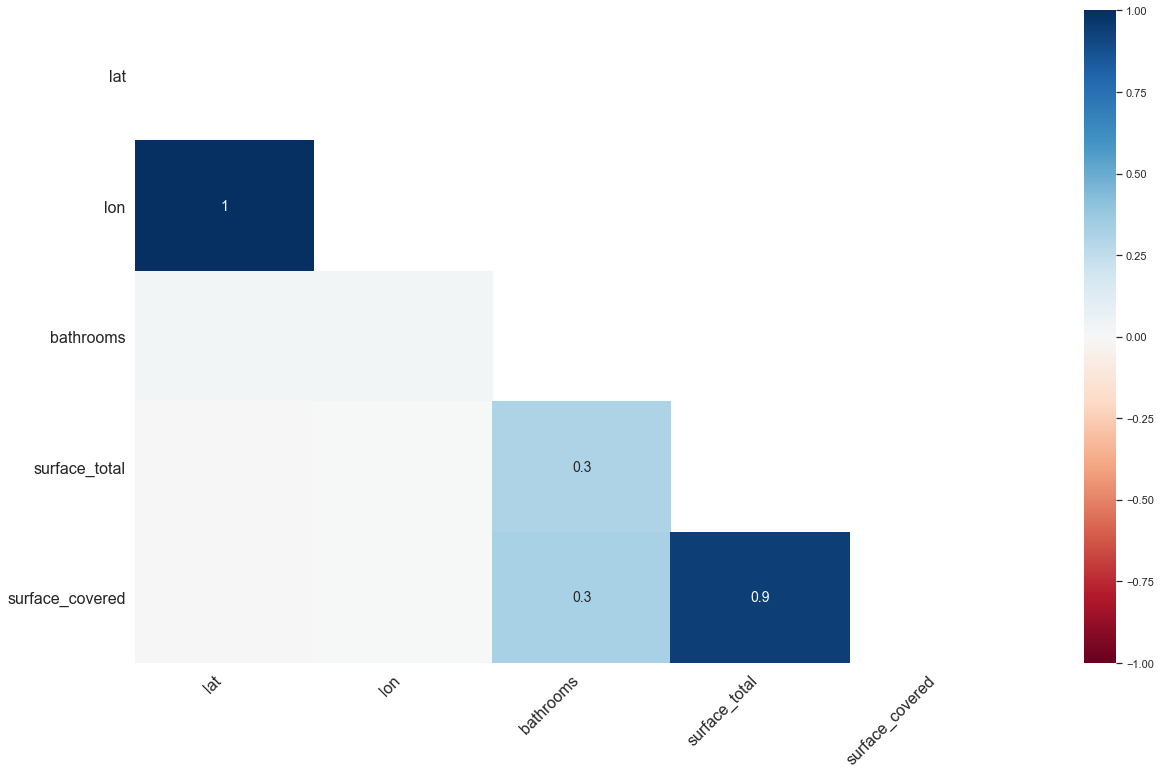

In [32]:
#Graficamos 
msno.heatmap(df)

Hay dos correlaciones que son evidentes entre lat y long y las superficies. Son variables que se desglosan de otra variable. Lat y long de ubicación y superficie cubierta de superficie total. En el caso de bathrooms encontramos una correlación con surface_total y surface_covered de 0.3

Vamos a generar un mapa de datos nulos ordenando por surface_total

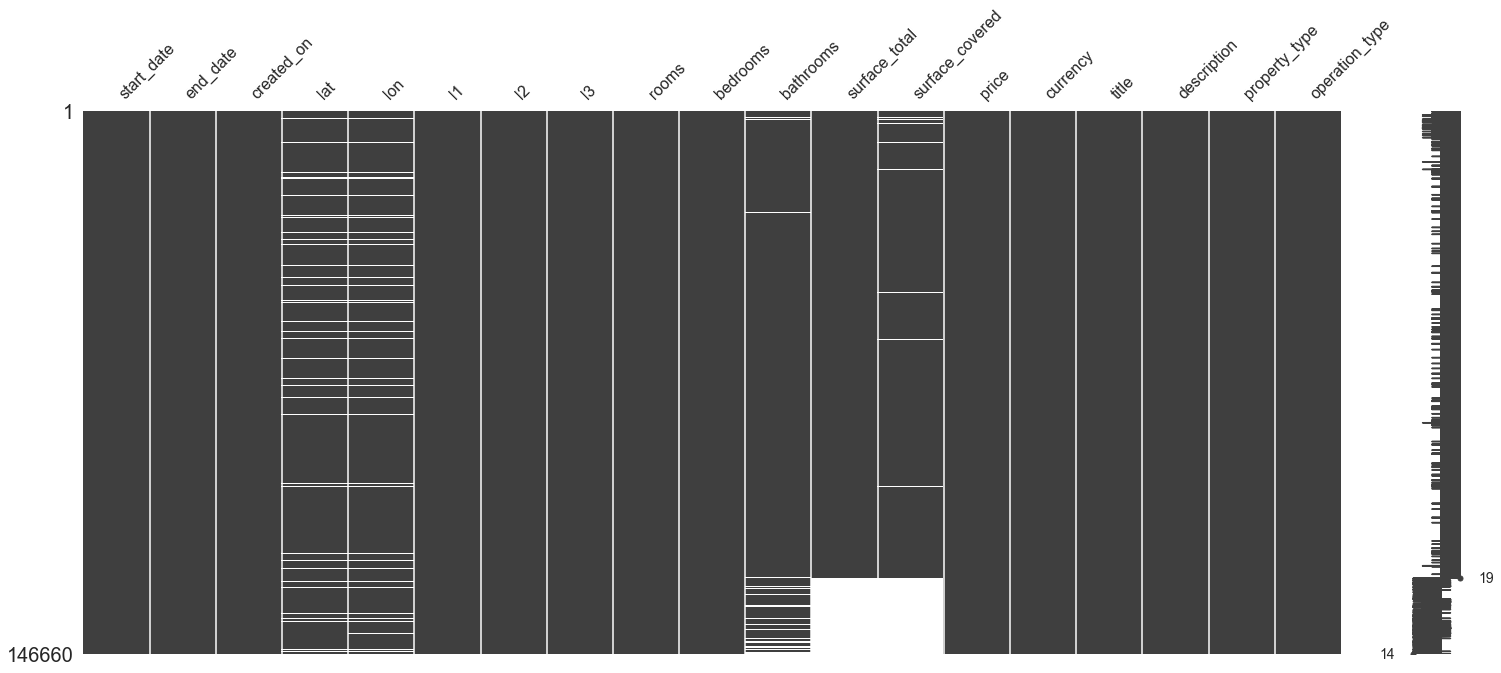

In [33]:
#Mismo procedimiento con surface_total
sorted = df.sort_values('surface_total', ascending = False)
msno.matrix(sorted)

En el gráfico se observa una agrupación de datos nulos en función de la superficie total 


Como son variables correlacionadas y ambas con datos faltantes, intentaremos demostrar que los valores faltantes de una son MNAR de la otra.

Vamos a estudiar los datos faltantes en bathrooms. Primero, bineamos a surface_total y contamos cuantos valores faltantes de bathrooms entran en cada intervalo.

In [34]:
#Filtramos el data set agrupado por valores de surface_total con datos nulos en la variable bathrooms
#copiamos el dataset original
df_bathrooms = df.copy()
dn_bathrooms = df_bathrooms.bathrooms.isnull().groupby([df_bathrooms['surface_total']]).sum().astype(int).reset_index(name='count').sort_values('count', ascending = False).reset_index()
dn_bathrooms = dn_bathrooms.drop(['index'], axis = 1, inplace = False)
dn_bathrooms

,surface_total,count
0,60.0,43
1,40.0,38
2,46.0,36
3,38.0,35
4,44.0,33
...,...,...
1894,912.0,0
1895,910.0,0
1896,909.0,0
1897,908.0,0


In [35]:
#Sacamos las estadísticas
dn_bathrooms.describe().round() 

,surface_total,count
count,1899.0,1899.0
mean,4595.0,1.0
std,13944.0,4.0
min,10.0,0.0
25%,484.0,0.0
50%,1005.0,0.0
75%,2660.0,0.0
max,193549.0,43.0


In [36]:
#realizamos el bineado de surface_total
df_bathrooms['surface_total-intervalos'] = pd.cut(df_bathrooms.surface_total, bins  = 5000)
df_bathrooms

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type,surface_total-intervalos
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta,"(126.123, 164.831]"
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta,"(48.708, 87.416]"
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta,"(-183.539, 48.708]"
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta,"(48.708, 87.416]"
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta,"(48.708, 87.416]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146655,2019-07-31,2019-08-13,2019-07-31,-34.816348,-58.181963,Argentina,Bs.As. G.B.A. Zona Sur,Berazategui,2.0,1.0,1.0,54.0,48.0,165000.0,USD,Departamento en Venta en Barrio Privado Barran...,Departamento de 2 ambientesCocina con alacena ...,Departamento,Venta,"(48.708, 87.416]"
146656,2019-07-31,2019-08-14,2019-07-31,-34.446459,-58.937810,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,4.0,3.0,2.0,164.0,90.0,130000.0,USD,Venta departamentos tres dormitorios jardín co...,Muy buen duplex a estrenar en dos plantas más ...,Departamento,Venta,"(126.123, 164.831]"
146657,2019-07-31,2019-08-14,2019-07-31,-34.444633,-58.981606,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,1.0,1.0,1.0,50.0,35.0,73000.0,USD,Venta departamento de un ambiente Manzanares C...,"En los Condominios de Campo Manzanares Chico, ...",Departamento,Venta,"(48.708, 87.416]"
146658,2019-07-31,2019-08-14,2019-07-31,-34.444830,-58.981796,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,2.0,1.0,1.0,38.0,38.0,68000.0,USD,Departamento en Venta. Manzanares chico.,Broker: Maria 11Departamento de dos ambientes ...,Departamento,Venta,"(-183.539, 48.708]"


In [37]:
#contamos cuántas instancias por intervalo tienen valores faltantes en bathrooms
#Obtenemosla frecuencia de estos valores faltantes, porque no todos los intervalos tienen la misma cantidad de instancias.
#agregamos a este dataframe el punto medio de cada intervalo.

vf_bathrooms = df_bathrooms.bathrooms.isnull().groupby([df_bathrooms['surface_total-intervalos']]).sum().astype(int).reset_index(name='count')
vf_bathrooms['freq'] = vf_bathrooms['count']/df_bathrooms.groupby([df_bathrooms['surface_total-intervalos']]).count()['surface_total'].values
vf_bathrooms['bin_centres'] = vf_bathrooms['surface_total-intervalos'].apply(lambda x: x.mid)
vf_bathrooms

,surface_total-intervalos,count,freq,bin_centres
0,"(-183.539, 48.708]",436,0.017138,-67.4155
1,"(48.708, 87.416]",572,0.012615,68.0620
2,"(87.416, 126.123]",207,0.010643,106.7695
3,"(126.123, 164.831]",118,0.011889,145.4770
4,"(164.831, 203.539]",93,0.014878,184.1850
...,...,...,...,...
4995,"(193355.461, 193394.169]",0,NaN,193374.8150
4996,"(193394.169, 193432.877]",0,NaN,193413.5230
4997,"(193432.877, 193471.584]",0,NaN,193452.2305
4998,"(193471.584, 193510.292]",0,NaN,193490.9380


In [38]:
# descripción estadística
vf_bathrooms.describe().round()

,count,freq
count,5000.0,364.0
mean,0.0,0.0
std,11.0,0.0
min,0.0,0.0
25%,0.0,0.0
50%,0.0,0.0
75%,0.0,0.0
max,572.0,1.0


In [39]:
# realizamos una máscara para filtrar valores por la desviación estándar para una mejor visualización de los datos
mayor_a_0 = vf_bathrooms.loc[:, 'count']> 9
vf_bathrooms = vf_bathrooms.loc[mayor_a_0]
vf_bathrooms

,surface_total-intervalos,count,freq,bin_centres
0,"(-183.539, 48.708]",436,0.017138,-67.4155
1,"(48.708, 87.416]",572,0.012615,68.0620
2,"(87.416, 126.123]",207,0.010643,106.7695
3,"(126.123, 164.831]",118,0.011889,145.4770
4,"(164.831, 203.539]",93,0.014878,184.1850
5,"(203.539, 242.247]",78,0.019471,222.8930
6,"(242.247, 280.955]",66,0.025249,261.6010
7,"(280.955, 319.662]",60,0.025630,300.3085
8,"(319.662, 358.37]",30,0.018785,339.0160
9,"(358.37, 397.078]",40,0.036101,377.7240


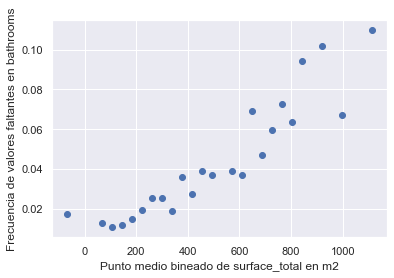

In [40]:
#graficamos
plt.scatter(vf_bathrooms['bin_centres'], vf_bathrooms['freq'])
plt.xlabel('Punto medio bineado de surface_total en m2')
plt.ylabel('Frecuencia de valores faltantes en bathrooms')
plt.show()

En el gráfico de dispersión se observa que a partir del valor de 200 m2 la frecuencia de valores faltantes de bathrooms aumenta en función la superficie. Se podría afirmar que los datos faltantes en la vaiable bathrooms tienen una dependencia con surface_total, por lo tanto es un MNAR 

### Datos faltantes en las variables lat y lon
Vamos a tratar de entender el origen de estos datos faltantes en estas variables con otra perspectiva. Agruparemos los datos faltantes de lat por barrios.

In [41]:
#FIltramos por datos nulos en lat por barrios y obtenemos las estadísticas de los datos faltantes
lat = df.lat.isnull().groupby([df['l3']]).sum().astype(int).reset_index(name='count').sort_values('count', ascending = False).reset_index()
lat = lat.drop(['index'], axis = 1, inplace = False)
lat.describe().round()

,count
count,89.0
mean,112.0
std,290.0
min,0.0
25%,5.0
50%,22.0
75%,98.0
max,2367.0


In [42]:
#FIltramos por el tercer cuantil
lat75 = lat.loc[:, 'count']>= 98
lat = lat.loc[lat75]
lat

,l3,count
0,Tigre,2367
1,Palermo,1094
2,Belgrano,600
3,Recoleta,556
4,Pilar,463
5,Barrio Norte,413
6,Puerto Madero,320
7,La Plata,271
8,Caballito,247
9,La Matanza,224


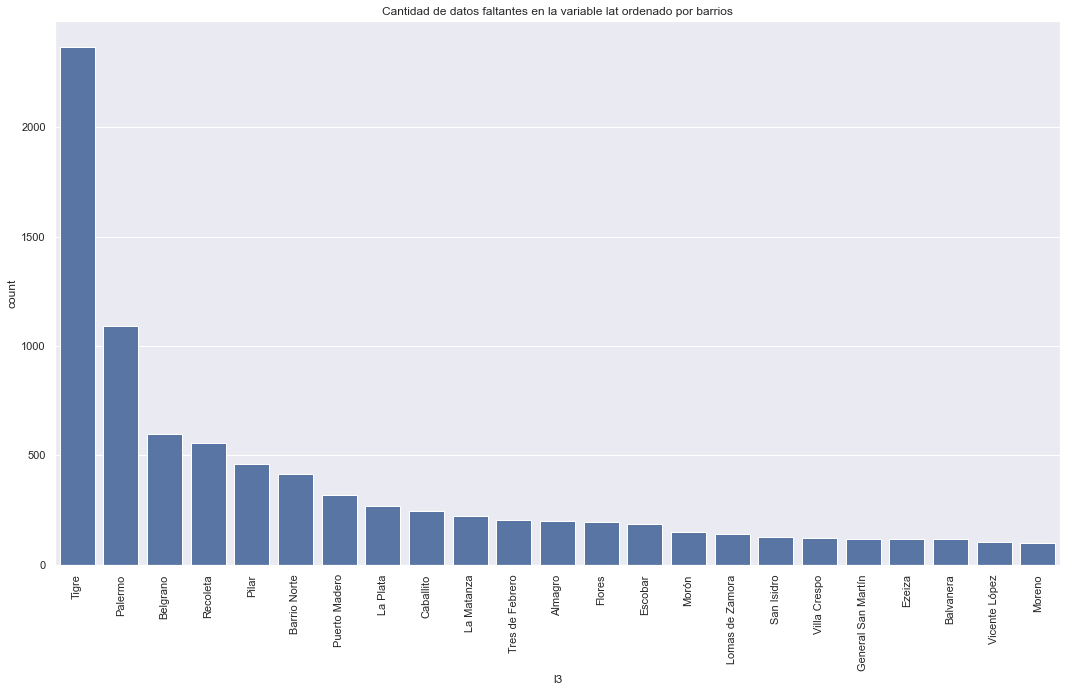

In [43]:
plt.figure(figsize=(18,10))
plt.title('Cantidad de datos faltantes en la variable lat ordenado por barrios')
plt.xticks(rotation = 90)
ax = sns.barplot(x = 'l3', y = 'count', data= lat, color='b')

***Podría haber una relación entre los datos faltantes en lat y los barrios. La mayor cantidad de datos faltanes se corresponde con el barrio de Tigre. Podría haber alguna razón pero excede el análisis posible con estos datos, por lo que podría considerarse un MCAR. 
En los barrios de Palermo, Belgrano y Recoleta es posible que la falta de esos datos respondan a alguna característica del barrio. Las primeras instancias son barrios emblemáticos de Capital Federal. En estos casos, es posible que se haya evitado agregar la ubicación precisa debido a que esos barrios son homogéneos en relación al precio y ubicación exacta. Graficaremos el valor del metro cuadrado para entender un poco más***  

Text(0.5, 0, 'Barrios de CABA y Prov. de Bs As')

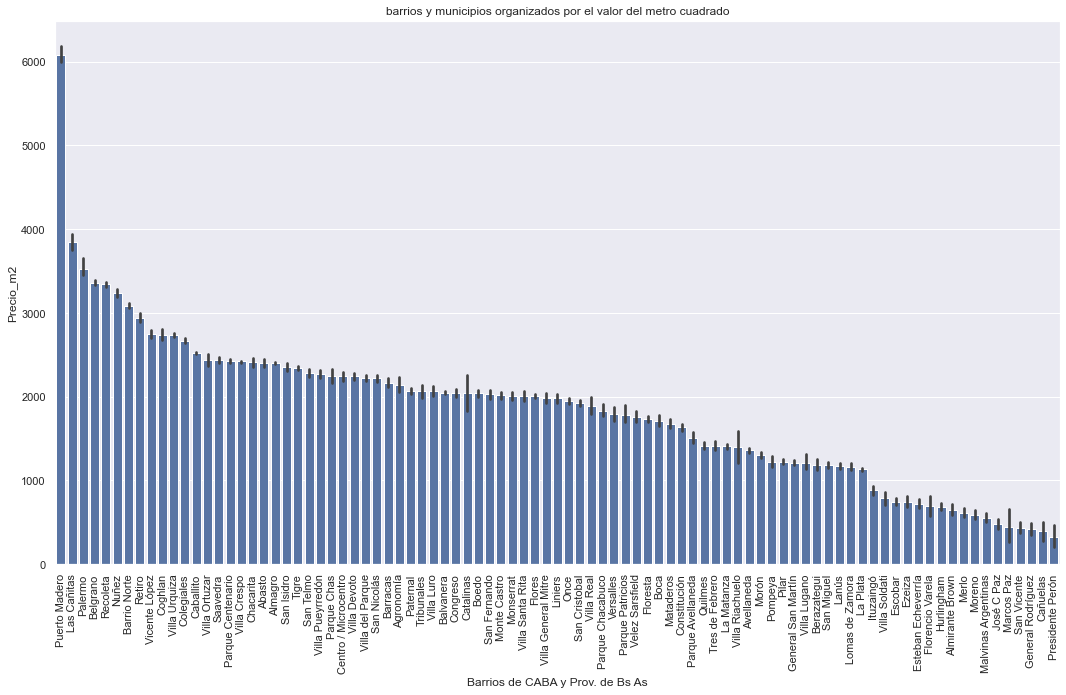

In [44]:
dataset_Properati_m2 = df.copy()
dataset_Properati_m2['Precio_m2'] = dataset_Properati_m2['price']/dataset_Properati_m2['surface_total']
dataset_Properati_m2
barrios = dataset_Properati_m2.groupby('l3').mean().sort_values('Precio_m2', ascending=False).index
fig = plt.figure(figsize=(18,10))
plt.xticks(rotation = 90)
plt.title('barrios y municipios organizados por el valor del metro cuadrado')

sns.barplot(x="l3", y="Precio_m2", order=barrios, data= dataset_Properati_m2, color = 'b')
plt.xlabel('Barrios de CABA y Prov. de Bs As')

Podemos ver que hay una correspondencia entre los barrios con m2 más caro y datos faltantes.
 

##   Encoding 

Es necesario transformar las variables categóricas en números. Los modelos que utilizaremos necesitan insumos numéricos para poder realizar una predicción. 

Primero vamos a retirar del dataset variables que no influyen en el análisis que realizaremos.

* l1: todas las instancias son de Argentina, es información redundante.

* l3: en este análisis no utilizaremos los barrios debido a que realizar un encoding requiere aumentar demasiado la dimensión, como también puede sesgar el modelo al asignar valores más altos a unou otro barrios. Asimismo utilizaremos las coordenadas para referirnos a la ubicación, con lo cual sería redundante.

* currency: todos los valores son en dólares

* title, description y operation_type: no son relevantes.



In [45]:
# sacamos variables que no tienen uso
df_reduced = df.copy()
df_reduced = df_reduced.drop(['l1','l3', 'currency','title', 'description', 'operation_type'], axis = 1)
df_reduced.head()

,start_date,end_date,created_on,lat,lon,l2,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Capital Federal,7.0,7.0,2.0,140.0,140.0,153000.0,Departamento
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Capital Federal,2.0,1.0,2.0,70.0,58.0,159000.0,PH
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Capital Federal,2.0,1.0,1.0,45.0,45.0,125000.0,PH
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Capital Federal,2.0,1.0,1.0,85.0,50.0,295000.0,PH
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Bs.As. G.B.A. Zona Sur,2.0,1.0,1.0,50.0,35.0,40000.0,PH


Vamos a cambiar la fecha 9999-12-31 por alguna que sea real, suponiendo que la propiedad seguía en venta al momento derealizar el dataset.

In [46]:
# cambiamos 9999-12-31
df_reduced.end_date = df_reduced.end_date.replace({'9999-12-31': '2021-12-31'})

In [47]:
end_date_2021 = df_reduced.end_date == '2021-12-31'
df4 = df_reduced.end_date[end_date_99991231]
df4

26        2021-12-31
50        2021-12-31
65        2021-12-31
68        2021-12-31
74        2021-12-31
             ...    
146286    2021-12-31
146472    2021-12-31
146528    2021-12-31
146535    2021-12-31
146536    2021-12-31
Name: end_date, Length: 25101, dtype: object

Vamos a extraer los dias y el mes de la fecha, dejando solo el valor numérico del año, para poder realizar un encoding y luego un escalado. 

In [48]:
#Extrayendo el año
df_reduced['start_date'] = pd.to_datetime(df_reduced.start_date)
df_reduced['end_date'] = pd.to_datetime(df_reduced.end_date)
df_reduced['created_on'] = pd.to_datetime(df_reduced.created_on)

df_reduced['start_date_year'] = df_reduced['start_date'].dt.year
df_reduced['end_date_year'] = df_reduced['end_date'].dt.year
df_reduced['created_on_year'] = df_reduced['created_on'].dt.year

df_reduced = df_reduced.drop(['start_date', 'end_date', 'created_on'], axis = 1)


In [49]:
df_reduced.head()

,lat,lon,l2,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type,start_date_year,end_date_year,created_on_year
0,-34.605880,-58.384949,Capital Federal,7.0,7.0,2.0,140.0,140.0,153000.0,Departamento,2019,2019,2019
1,-34.624056,-58.412110,Capital Federal,2.0,1.0,2.0,70.0,58.0,159000.0,PH,2019,2019,2019
2,-34.593569,-58.427474,Capital Federal,2.0,1.0,1.0,45.0,45.0,125000.0,PH,2019,2019,2019
3,-34.581294,-58.436754,Capital Federal,2.0,1.0,1.0,85.0,50.0,295000.0,PH,2019,2019,2019
4,-34.914194,-57.938219,Bs.As. G.B.A. Zona Sur,2.0,1.0,1.0,50.0,35.0,40000.0,PH,2019,2020,2019


Vamos a realizar un encoding de las variables categóricas mediante la función de get_dummies de pandas

In [50]:
#hago dummy del tipo de propiedad 
tipo_propiedad = pd.get_dummies(df_reduced.property_type, drop_first=False)
df_reduced = df_reduced.join(tipo_propiedad)


In [51]:
#hago dummy del tipo de propiedad 
reg = pd.get_dummies(df_reduced.l2, drop_first=False)
df_reduced = df_reduced.join(reg)

In [52]:
# Retiramos las variables del dataframe
df_reduced = df_reduced.drop(['l2', 'property_type'], axis = 1)

In [53]:
df_reduced.head()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,start_date_year,end_date_year,...,Depósito,Local comercial,Lote,Oficina,Otro,PH,Bs.As. G.B.A. Zona Norte,Bs.As. G.B.A. Zona Oeste,Bs.As. G.B.A. Zona Sur,Capital Federal
0,-34.605880,-58.384949,7.0,7.0,2.0,140.0,140.0,153000.0,2019,2019,...,0,0,0,0,0,0,0,0,0,1
1,-34.624056,-58.412110,2.0,1.0,2.0,70.0,58.0,159000.0,2019,2019,...,0,0,0,0,0,1,0,0,0,1
2,-34.593569,-58.427474,2.0,1.0,1.0,45.0,45.0,125000.0,2019,2019,...,0,0,0,0,0,1,0,0,0,1
3,-34.581294,-58.436754,2.0,1.0,1.0,85.0,50.0,295000.0,2019,2019,...,0,0,0,0,0,1,0,0,0,1
4,-34.914194,-57.938219,2.0,1.0,1.0,50.0,35.0,40000.0,2019,2020,...,0,0,0,0,0,1,0,0,1,0


## Imputación de valores faltantes

Para imputar los valores faltantes, Scikit Learn presenta varios métodos. Para saber y justificar qué metodo se ajusta mejor a la mputación, realizaremos una función en la cual se obtiene una métrica de error para evaluar los diferentes métodos para imputar los valores faltantes en el dataset de properati.

In [54]:
# selección de variables
train_df = df_reduced.copy(deep=True)

X = train_df.drop('price', axis=1)
y = train_df.price
#X = X[:400]
#y = y[:400]

In [55]:
# Realizamos un train, test y split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [56]:
#rng = np.random.RandomState(0)
# Definimos el modelo sobre el cual vamos a realizar las evaluaciones
N_SPLITS = 4
regressor = RandomForestRegressor(random_state=0)


Vamos a utilizar un pipeline con el método de imputación y el regressor. En este caso utilizaremos un RandomForestRegressor con una validación cruzada de 4 divisiones. 


In [57]:
# Definimos la función 
def get_scores_for_imputer(imputer, X_missing, y_missing):
    estimator = make_pipeline(imputer, regressor)
    impute_scores = cross_val_score(estimator, X_missing, y_missing,
                                    scoring='neg_mean_squared_error',
                                    cv=N_SPLITS)
    return impute_scores


x_labels = ['Zero imputation',
            'Mean Imputation',
            'KNN Imputation',
            'Iterative Imputation']

mses_train_df = np.zeros(4)
stds_train_df = np.zeros(4)


In [58]:
# Definimos la función para imputar con 0
def get_impute_zero_score(X_missing, y_missing):

    imputer = SimpleImputer(missing_values=np.nan, add_indicator=True,
                            strategy='constant', fill_value=0)
    zero_impute_scores = get_scores_for_imputer(imputer, X_missing, y_missing)
    return zero_impute_scores.mean(), zero_impute_scores.std()


mses_train_df[0], stds_train_df[0] = get_impute_zero_score(
    X_train, y_train)


In [59]:
# Definimos la función para imputar con kNNimputer
def get_impute_knn_score(X_missing, y_missing):
    imputer = KNNImputer(missing_values=np.nan, add_indicator=True)
    knn_impute_scores = get_scores_for_imputer(imputer, X_missing, y_missing)
    return knn_impute_scores.mean(), knn_impute_scores.std()


mses_train_df[1], stds_train_df[1] = get_impute_knn_score(
   X_train, y_train)


In [60]:
# Definimos la función para imputar con el promedio
def get_impute_mean(X_missing, y_missing):
    imputer = SimpleImputer(missing_values=np.nan, strategy="mean",
                            add_indicator=True)
    mean_impute_scores = get_scores_for_imputer(imputer, X_missing, y_missing)
    return mean_impute_scores.mean(), mean_impute_scores.std()


mses_train_df[2], stds_train_df[2] = get_impute_mean(
    X_train, y_train)

In [61]:
# Definimos la función para imputar con IterativeImputer
def get_impute_iterative(X_missing, y_missing):
    imputer = IterativeImputer(missing_values=np.nan, add_indicator=True,
                               random_state=0, n_nearest_features=5,
                               sample_posterior=True)
    iterative_impute_scores = get_scores_for_imputer(imputer,
                                                     X_missing,
                                                     y_missing)
    return iterative_impute_scores.mean(), iterative_impute_scores.std()

mses_train_df[3], stds_train_df[3] = get_impute_iterative(
    X_train, y_train)


mses_train_df = mses_train_df * -1


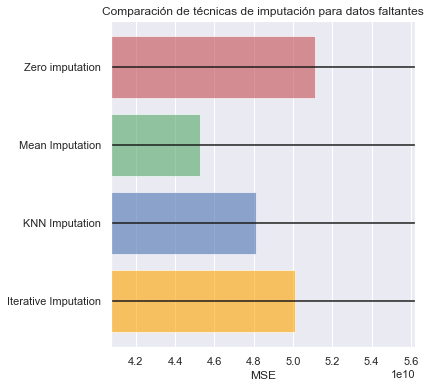

In [62]:
# Graficamos los resultados


n_bars = len(mses_train_df)
xval = np.arange(n_bars)

colors = ['r', 'g', 'b', 'orange']

# plot diabetes results
plt.figure(figsize=(12, 6))
ax1 = plt.subplot(121)
for j in xval:
    ax1.barh(j, mses_train_df[j], xerr=stds_train_df[j],
             color=colors[j], alpha=0.6, align='center')

ax1.set_title('Comparación de técnicas de imputación para datos faltantes')
ax1.set_xlim(left=np.min(mses_train_df) * 0.9,
             right=np.max(mses_train_df) * 1.1)
ax1.set_yticks(xval)
ax1.set_xlabel('MSE')
ax1.invert_yaxis()
ax1.set_yticklabels(x_labels)


plt.show()


Según el gráfico, el método con menos error fue imputar con el promedio, por lo tanto realizaremos esa metodología.

In [63]:
# Imputamos con el promedio para la variable baños
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
df_reduced.bathrooms = imp_mean.fit_transform(df_reduced.bathrooms.values.reshape(-1,1))


In [64]:
# Imputamos con el promedio para la variable de sup total
df_reduced.surface_total = imp_mean.fit_transform(df_reduced.surface_total.values.reshape(-1,1))

In [65]:
# Imputamos con el promedio para la variable de sup cubierta
df_reduced.surface_covered = imp_mean.fit_transform(df_reduced.surface_covered.values.reshape(-1,1))

In [66]:
# Chequeamos el resultado
df_reduced.isnull().sum()

lat                         9925
lon                         9959
rooms                          0
bedrooms                       0
bathrooms                      0
surface_total                  0
surface_covered                0
price                          0
start_date_year                0
end_date_year                  0
created_on_year                0
Casa                           0
Casa de campo                  0
Cochera                        0
Departamento                   0
Depósito                       0
Local comercial                0
Lote                           0
Oficina                        0
Otro                           0
PH                             0
Bs.As. G.B.A. Zona Norte       0
Bs.As. G.B.A. Zona Oeste       0
Bs.As. G.B.A. Zona Sur         0
Capital Federal                0
dtype: int64

Vamos a realizar el mismo procedimiento para las variables de latitud y longitud. El procediento anterior no tiene en cuanta el hecho de que para estas variables, al ser coordenadas polares no tiene sentido hacer un promedio. Por lo tanto probaremos otras variantes.

In [67]:
train_df2 = df_reduced.copy()

In [68]:
X = train_df2.drop('price', axis=1)
y = train_df2.price


In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [70]:
N_SPLITS = 4
regressor = RandomForestRegressor(random_state=0)

In [71]:
def get_scores_for_imputer(imputer, X_missing, y_missing):
    estimator = make_pipeline(imputer, regressor)
    impute_scores = cross_val_score(estimator, X_missing, y_missing,
                                    scoring='neg_mean_squared_error',
                                    cv=N_SPLITS)
    return impute_scores


x_labels = ['Zero imputation',
            'Mean Imputation',
            'KNN Imputation',
            'Iterative Imputation']

mses_train_df = np.zeros(4)
stds_train_df = np.zeros(4)

In [72]:
def get_impute_zero_score(X_missing, y_missing):

    imputer = SimpleImputer(missing_values=np.nan, add_indicator=True,
                            strategy='constant', fill_value=0)
    zero_impute_scores = get_scores_for_imputer(imputer, X_missing, y_missing)
    return zero_impute_scores.mean(), zero_impute_scores.std()


mses_train_df[0], stds_train_df[0] = get_impute_zero_score(
    X_train, y_train)

In [73]:
def get_impute_knn_score(X_missing, y_missing):
    imputer = KNNImputer(missing_values=np.nan, add_indicator=True)
    knn_impute_scores = get_scores_for_imputer(imputer, X_missing, y_missing)
    return knn_impute_scores.mean(), knn_impute_scores.std()


mses_train_df[1], stds_train_df[1] = get_impute_knn_score(
   X_train, y_train)

In [74]:
def get_impute_mean(X_missing, y_missing):
    imputer = SimpleImputer(missing_values=np.nan, strategy="mean",
                            add_indicator=True)
    mean_impute_scores = get_scores_for_imputer(imputer, X_missing, y_missing)
    return mean_impute_scores.mean(), mean_impute_scores.std()


mses_train_df[2], stds_train_df[2] = get_impute_mean(
    X_train, y_train)

In [75]:
def get_impute_iterative(X_missing, y_missing):
    imputer = IterativeImputer(missing_values=np.nan, add_indicator=True,
                               random_state=0, n_nearest_features=5,
                               sample_posterior=True)
    iterative_impute_scores = get_scores_for_imputer(imputer,
                                                     X_missing,
                                                     y_missing)
    return iterative_impute_scores.mean(), iterative_impute_scores.std()

mses_train_df[3], stds_train_df[3] = get_impute_iterative(
    X_train, y_train)


mses_train_df = mses_train_df * -1

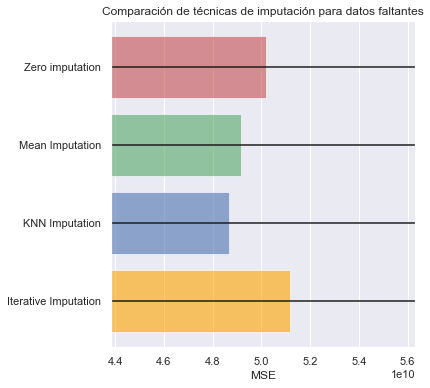

In [76]:
import matplotlib.pyplot as plt


n_bars = len(mses_train_df)
xval = np.arange(n_bars)

colors = ['r', 'g', 'b', 'orange']


plt.figure(figsize=(12, 6))
ax1 = plt.subplot(121)
for j in xval:
    ax1.barh(j, mses_train_df[j], xerr=stds_train_df[j],
             color=colors[j], alpha=0.6, align='center')

ax1.set_title('Comparación de técnicas de imputación para datos faltantes')
ax1.set_xlim(left=np.min(mses_train_df) * 0.9,
             right=np.max(mses_train_df) * 1.1)
ax1.set_yticks(xval)
ax1.set_xlabel('MSE')
ax1.invert_yaxis()
ax1.set_yticklabels(x_labels)


plt.show()

Según lo observado en el gráfico, el mejor método para la imputación de valores faltantes es kNN imputer.

In [77]:
# Realizamos la imputación con KNN imputer
imputer = KNNImputer(missing_values=np.nan, add_indicator=True)
df_reduced.lat = imputer.fit_transform(df_reduced.lat.values.reshape(-1,1))

In [78]:
df_reduced.lon = imputer.fit_transform(df_reduced.lon.values.reshape(-1,1))

In [79]:
# Chequeamos que no hayan valores nulos
df_reduced.isnull().sum()

lat                         0
lon                         0
rooms                       0
bedrooms                    0
bathrooms                   0
surface_total               0
surface_covered             0
price                       0
start_date_year             0
end_date_year               0
created_on_year             0
Casa                        0
Casa de campo               0
Cochera                     0
Departamento                0
Depósito                    0
Local comercial             0
Lote                        0
Oficina                     0
Otro                        0
PH                          0
Bs.As. G.B.A. Zona Norte    0
Bs.As. G.B.A. Zona Oeste    0
Bs.As. G.B.A. Zona Sur      0
Capital Federal             0
dtype: int64

## Creación de nuevas variables

Vamos a crear una nueva variable, precio por metro cuadrado. Si bien estaríamos sesgando el modelo al introducir la variable respuesta dentro de las variables dependientes, la vamos a utilizar para el tratamiento de outliers. Solo viendo el precio no podemos determinar si corresponde a un campo con muchos metros cuadrados o a un outlier. Conociendo el valor por m2 podemos hacernos una idea si el valor es real o no.
Creamos la variable y obtenemos algunas estadísticas básicas para entedender mejor esta variable.

In [80]:
Precio = df_reduced.price
sup_total = df_reduced.surface_total
Precio_m2 = Precio/sup_total



minimum_price = np.min(Precio_m2)
maximum_price = np.max(Precio_m2)
mean_price = np.mean(Precio_m2)
median_price = np.nanmedian(Precio_m2)
std_price = np.std(Precio_m2)

print("Precio por m2 mínimo: ${:,.2f}".format(minimum_price))
print("Precio por m2 máximo: ${:,.2f}".format(maximum_price))
print("Precio por m2 promedio: ${:,.2f}".format(mean_price))
print("Precio por m2 mediano: ${:,.2f}".format(median_price))
print("Desvío estándar: ${:,.2f}".format(std_price))

Primer_quartil = np.nanpercentile(Precio_m2, 25)
Tercer_quartil = np.nanpercentile(Precio_m2, 75)
Inter_quartil = Tercer_quartil - Primer_quartil
print('Percentiles de precio por m2')
print('Primer cuartil: ${:,.2f}'.format(Primer_quartil))
print('Tercer cuartil: ${:,.2f}'.format(Tercer_quartil))
print('Rango intercuartílico: ${:,.2f}'.format(Inter_quartil))

Precio por m2 mínimo: $0.55
Precio por m2 máximo: $754,284.47
Precio por m2 promedio: $2,164.70
Precio por m2 mediano: $2,134.83
Desvío estándar: $2,445.56
Percentiles de precio por m2
Primer cuartil: $1,178.33
Tercer cuartil: $2,844.44
Rango intercuartílico: $1,666.11


Observamos que como precio máximo y mínimo hay valores que no tienen sentido con la realidad. Vamos a crear la variable para detectar y eliminar los outliers.

In [81]:
# Creamos la nueva variable precio_m2
df_reduced['precio_m2'] = df_reduced.price/df_reduced.surface_total
df_reduced.head()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,start_date_year,end_date_year,...,Local comercial,Lote,Oficina,Otro,PH,Bs.As. G.B.A. Zona Norte,Bs.As. G.B.A. Zona Oeste,Bs.As. G.B.A. Zona Sur,Capital Federal,precio_m2
0,-34.605880,-58.384949,7.0,7.0,2.0,140.0,140.0,153000.0,2019,2019,...,0,0,0,0,0,0,0,0,1,1092.857143
1,-34.624056,-58.412110,2.0,1.0,2.0,70.0,58.0,159000.0,2019,2019,...,0,0,0,0,1,0,0,0,1,2271.428571
2,-34.593569,-58.427474,2.0,1.0,1.0,45.0,45.0,125000.0,2019,2019,...,0,0,0,0,1,0,0,0,1,2777.777778
3,-34.581294,-58.436754,2.0,1.0,1.0,85.0,50.0,295000.0,2019,2019,...,0,0,0,0,1,0,0,0,1,3470.588235
4,-34.914194,-57.938219,2.0,1.0,1.0,50.0,35.0,40000.0,2019,2020,...,0,0,0,0,1,0,0,1,0,800.000000


Vamos a utilizar un gráfico de cajas para identificar lo valores anómalos

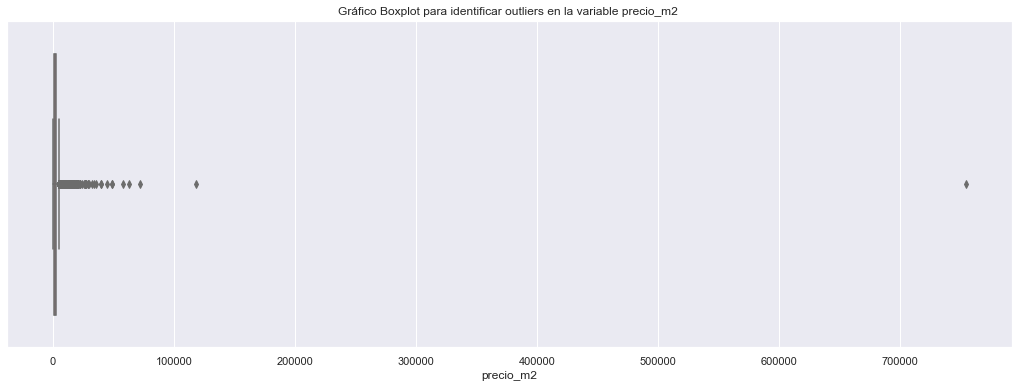

In [82]:
#Realizamos un Gráfico Boxplot para identificar outliers.
fig = plt.figure(figsize=(18, 6))
plt.title('Gráfico Boxplot para identificar outliers en la variable precio_m2 ')
ax = sns.boxplot(x ='precio_m2',  data= df_reduced, color = 'r', palette = 'husl')

Podemos observar que hay propiedades con valores muy extremos. Vamos a filtrar a través del valor de la casa más cara vendida en Argentina, cuyo valor fue de 7500 dólares el metro cuadrado. (http://sitiosargentina.com.ar/notas/2010/marzo/casa-mas-cara.htm) y el metro cuadrado más barato de la provincia de Buenos Aires, 1549 dólares (https://www.impulsobaires.com.ar/nota/277685/el-precio-del-metro-cuadrado-en-gran-buenos-aires-es-hasta-un-32-mas-economico-que-en-capital-federal/#:~:text=Zona%20Norte,-Si%20se%20plantea&text=Y%2C%20finalmente%2C%20San%20Miguel%20(,cuadrado)%20son%20los%20m%C3%A1s%20baratos.&text=Con%20respecto%20a%20los%20barrios,Vicente%20L%C3%B3pez%20y%20San%20Isidro.)

In [83]:
#Filtramos el dataset por valores de corte, en este caso la propiedad más cara del país. 
df_reduced_filt  = df_reduced[(df_reduced.precio_m2 <= 7500) & (df_reduced.precio_m2 >= 1134) ] 
df_reduced_filt.shape


(110597, 26)

Luego del filtrado, volvemos a sacar las estadísticas sobre la variable.

In [84]:
precio = df_reduced_filt.price
sup_total = df_reduced_filt.surface_total
precio_m2 = precio/sup_total

minimum_price = np.min(precio_m2)
maximum_price = np.max(precio_m2)
mean_price = np.mean(precio_m2)
median_price = np.nanmedian(precio_m2)
std_price = np.std(precio_m2)

print("Precio por m2 mínimo: ${:,.2f}".format(minimum_price))
print("Precio por m2 máximo: ${:,.2f}".format(maximum_price))
print("Precio por m2 promedio: ${:,.2f}".format(mean_price))
print("Precio por m2 mediano: ${:,.2f}".format(median_price))
print("Desvío estándar: ${:,.2f}".format(std_price))

Primer_quartil_filt = np.nanpercentile(precio_m2, 25)
Tercer_quartil_filt = np.nanpercentile(precio_m2, 75)
Inter_quartil_filt = Tercer_quartil_filt - Primer_quartil_filt
print('Percentiles de precio por m2')
print('Primer cuartil: ${:,.2f}'.format(Primer_quartil_filt))
print('Tercer cuartil: ${:,.2f}'.format(Tercer_quartil_filt))
print('Rango intercuartílico: ${:,.2f}'.format(Inter_quartil_filt))


Precio por m2 mínimo: $1,134.02
Precio por m2 máximo: $7,500.00
Precio por m2 promedio: $2,608.63
Precio por m2 mediano: $2,455.88
Desvío estándar: $989.91
Percentiles de precio por m2
Primer cuartil: $1,931.82
Tercer cuartil: $3,058.44
Rango intercuartílico: $1,126.62


Acotamos el dataset a un rango de 1,134.02 a 7,500.00, dólares el metro cuadrado. 

In [85]:
df_reduced_filt.shape

(110597, 26)

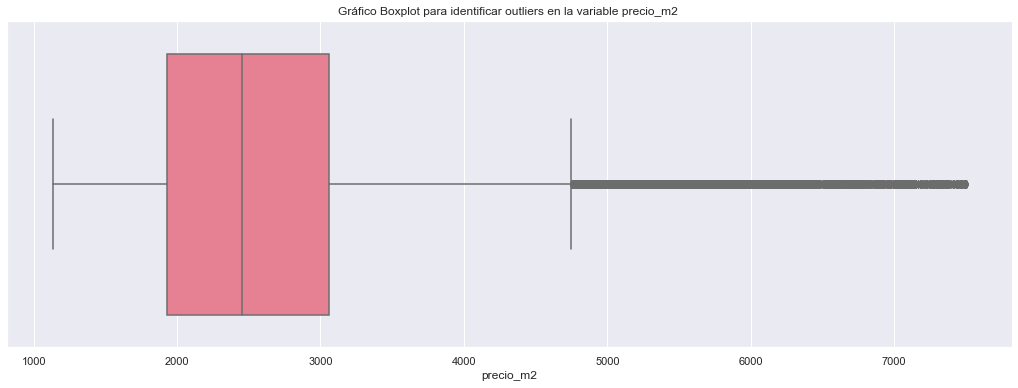

In [86]:
#Realizamos un Gráfico Boxplot para identificar outliers.
fig = plt.figure(figsize=(18, 6))
plt.title('Gráfico Boxplot para identificar outliers en la variable precio_m2 ')
ax = sns.boxplot(x ='precio_m2',  data= df_reduced_filt, color = 'r', palette = 'husl')

En el gráfico podemos observar un conjunto de valores agrupados entre 5000 y 7500 dólares el metro cuadrado. Si bien en relación al resto del dataset, parecen outliers, posiblemente correspondan a un subgrupo. Por ejemplo, se podría corresponder con propiedades de lujo. Lo ideal sería hacer un subgrupo para este tipo de propiedades y analizarlo por separado. En este trabajo realizaremos un tratamiento de valores atípicos a través de los cuartiles. Posiblemente estas propiedades queden fuera del dataset. 

Utilizando la la técnica de tratamiento de outliers mediante el rango intercuartílico, fijaremos un valor de corte máximo. En el caso del valos minimo, no lo utilizaremos debido a que fijamos un valor de corte mínimo según el metro cuadrado más barato de la provincia de Buenos Aires y no se observan valores atípicos en el gráfico, antes del primer cuartil.

In [87]:
# Realizamos la máscara para los valores máximos. 
maximo = Tercer_quartil_filt + 1.5*Inter_quartil_filt

print(maximo)

4748.376623376624


Vamos a filtrar por el valor máximo de corte calculado por el rango intercuartílico. 

In [88]:
# dataset final
df_rango_iqr_precio_m2 = df_reduced_filt[df_reduced_filt.precio_m2 <= maximo] 
df_rango_iqr_precio_m2.shape

(106236, 26)

Realizamos otro boxplot para analizar como quedó la distribución de la variable luego del procesamiento de los outliers

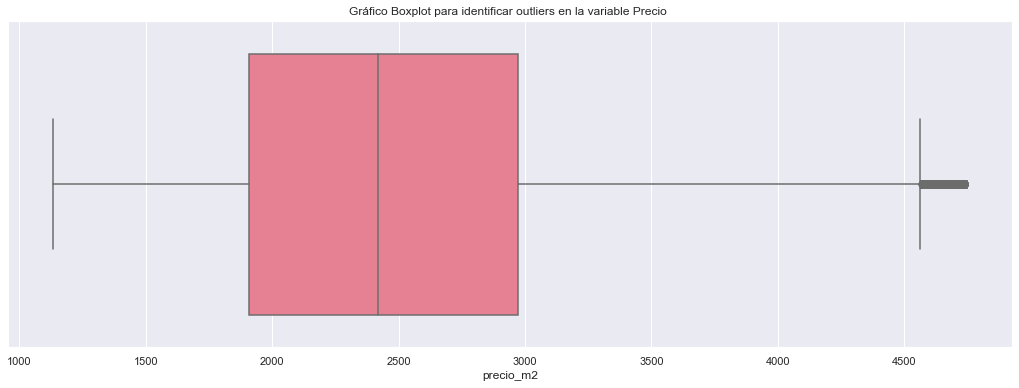

In [89]:
fig = plt.figure(figsize=(18, 6))
plt.title('Gráfico Boxplot para identificar outliers en la variable Precio ')
ax = sns.boxplot(x ='precio_m2',  data= df_rango_iqr_precio_m2, color = 'r', palette = 'husl')

Se observa un pequeño grupo de valores por fuera de los valores donde se agrupan la mayor cantidad de instancias. Filtramos por ese valor.

In [90]:
#dataset final
df_rango_iqr_precio_m2 = df_reduced_filt[df_reduced_filt.precio_m2 <= 4500] 
df_rango_iqr_precio_m2.shape

(105400, 26)

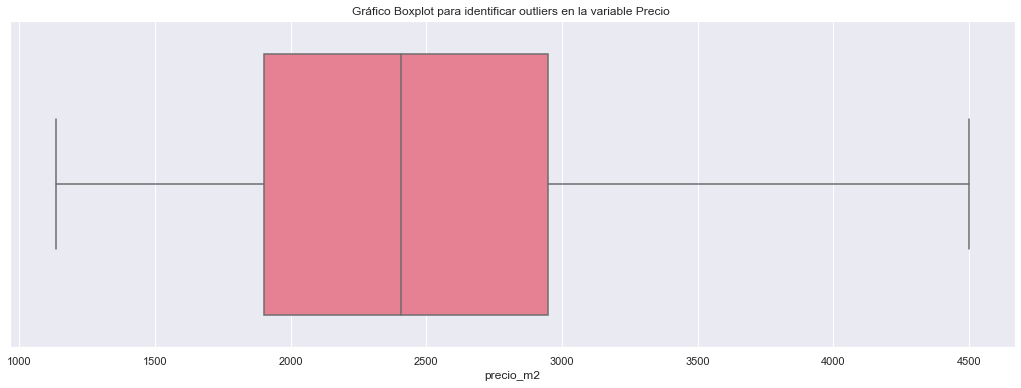

In [91]:
fig = plt.figure(figsize=(18, 6))
plt.title('Gráfico Boxplot para identificar outliers en la variable Precio ')
ax = sns.boxplot(x ='precio_m2',  data= df_rango_iqr_precio_m2, color = 'r', palette = 'husl')

Finalmente, obtuvimos una distribución homogénea en relación a la media. 

In [92]:

precio = df_rango_iqr_precio_m2.price
sup_total = df_rango_iqr_precio_m2.surface_total
precio_m2 = precio/sup_total


minimum_price = np.min(precio_m2)
maximum_price = np.max(precio_m2)
mean_price = np.mean(precio_m2)
median_price = np.nanmedian(precio_m2)
std_price = np.std(precio_m2)

print("Precio por m2 mínimo: ${:,.2f}".format(minimum_price))
print("Precio por m2 máximo: ${:,.2f}".format(maximum_price))
print("Precio por m2 promedio: ${:,.2f}".format(mean_price))
print("Precio por m2 mediano: ${:,.2f}".format(median_price))
print("Desvío estándar: ${:,.2f}".format(std_price))

Primer_quartil_filt = np.nanpercentile(precio_m2, 25)
Tercer_quartil_filt = np.nanpercentile(precio_m2, 75)
Inter_quartil_filt = Tercer_quartil_filt - Primer_quartil_filt
print('Percentiles de precio por m2')
print('Primer cuartil: ${:,.2f}'.format(Primer_quartil_filt))
print('Tercer cuartil: ${:,.2f}'.format(Tercer_quartil_filt))
print('Rango intercuartílico: ${:,.2f}'.format(Inter_quartil_filt))

Precio por m2 mínimo: $1,134.02
Precio por m2 máximo: $4,500.00
Precio por m2 promedio: $2,463.74
Precio por m2 mediano: $2,408.16
Desvío estándar: $742.25
Percentiles de precio por m2
Primer cuartil: $1,903.23
Tercer cuartil: $2,950.00
Rango intercuartílico: $1,046.77


En las estadísticas no se observan valores atípicos. 

Vamos a utilizar la técnica de las tres sigmas para comprar los resultados obtenidos.

In [93]:
# Calculamos los valores máximos y mínimos
sigma_minimo = mean_price - std_price*3
sigma_maximo = mean_price + std_price*3
print(sigma_minimo)
print(sigma_maximo)

236.97811755804696
4690.497126296626


In [94]:
# Filtramos por esos valores
df_3_sigmas = df_reduced_filt[(df_reduced_filt['precio_m2']<= sigma_maximo) & (df_reduced_filt['precio_m2']>= sigma_minimo)]

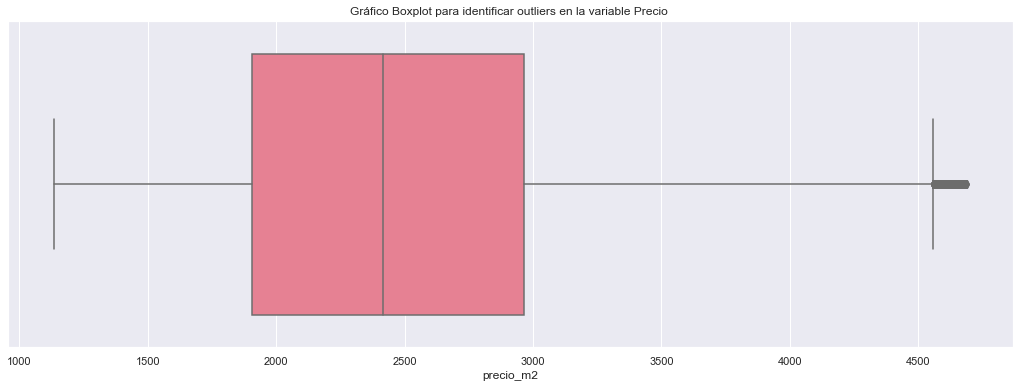

In [95]:
# Graficamos
fig = plt.figure(figsize=(18, 6))
plt.title('Gráfico Boxplot para identificar outliers en la variable Precio ')
ax = sns.boxplot(x ='precio_m2',  data= df_3_sigmas, color = 'r', palette = 'husl')

El resultado es similar al obtenido mediante la técnica de los rangos intercuartílicos. 

Vamos separar la subpoblación antes menciodada sobre las propiedades con un valor excesivo del metro cuadrado y que posiblemente pertenezcan a propiedades de lujo.

In [96]:
#subplobación propiedades de lujo.
df_reduced_filt1  = df_reduced_filt[df_reduced_filt.precio_m2 >= maximo] 
df_reduced_filt1.shape

(4361, 26)

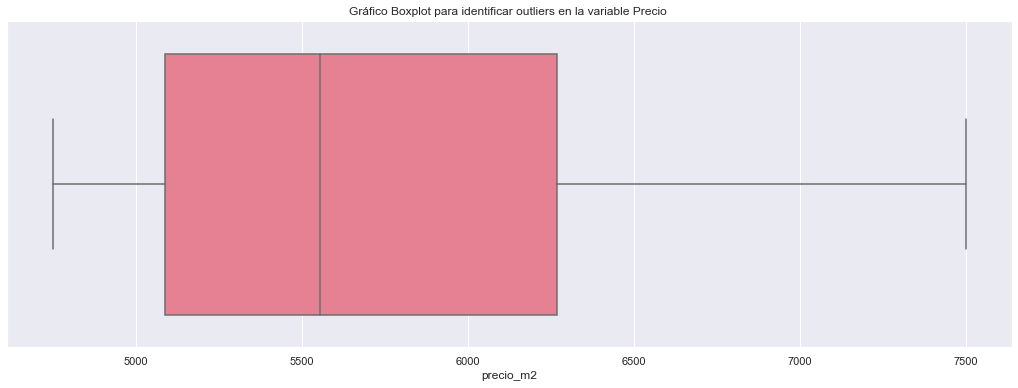

In [97]:
fig = plt.figure(figsize=(18, 6))
plt.title('Gráfico Boxplot para identificar outliers en la variable Precio ')
ax = sns.boxplot(x ='precio_m2',  data= df_reduced_filt1, color = 'r', palette = 'husl')

En el gráfico, se observa que el conjunto de datos se distribuye de manera homogénea. Podría analizarse como un subconjunto y predecir valores para este tipo de propiedad. 

In [98]:
precio = df_reduced_filt1.price
sup_total = df_reduced_filt1.surface_total
precio_m2 = precio/sup_total

minimum_price = np.min(precio_m2)
maximum_price = np.max(precio_m2)
mean_price = np.mean(precio_m2)
median_price = np.nanmedian(precio_m2)
std_price = np.std(precio_m2)

print("Precio por m2 mínimo: ${:,.2f}".format(minimum_price))
print("Precio por m2 máximo: ${:,.2f}".format(maximum_price))
print("Precio por m2 promedio: ${:,.2f}".format(mean_price))
print("Precio por m2 mediano: ${:,.2f}".format(median_price))
print("Desvío estándar: ${:,.2f}".format(std_price))

Primer_quartil = np.nanpercentile(precio_m2, 25)
Tercer_quartil = np.nanpercentile(precio_m2, 75)
Inter_quartil = Tercer_quartil - Primer_quartil
print('Percentiles de precio por m2')
print('Primer cuartil: ${:,.2f}'.format(Primer_quartil))
print('Tercer cuartil: ${:,.2f}'.format(Tercer_quartil))
print('Rango intercuartílico: ${:,.2f}'.format(Inter_quartil))


Precio por m2 mínimo: $4,750.00
Precio por m2 máximo: $7,500.00
Precio por m2 promedio: $5,724.25
Precio por m2 mediano: $5,555.56
Desvío estándar: $736.55
Percentiles de precio por m2
Primer cuartil: $5,087.82
Tercer cuartil: $6,268.66
Rango intercuartílico: $1,180.84


Las estadísticas obtenidas confirman que los datos se distribuyen de manera homogénea.

Vamos a filtrar el dataset por los valores de corte y realizar un gráfico estilo "violin" para entender como se distribuyen los valores en lsa diferentes propiedades 

In [99]:
df1 = df.copy()
df1['precio_m2'] = df1.price/df1.surface_total

In [100]:
df1 = df1[(df1['precio_m2'] >= 1134.02) & (df1['precio_m2'] <= 4500)]


Text(0.5, 1.0, 'Gráfico de catplot, estilo violin para identificar la distribución del precio y los tipos de propiedad ')

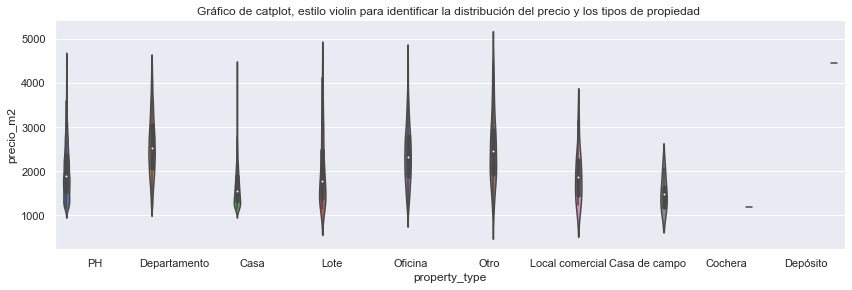

In [101]:
sns.catplot(x = 'property_type', y = 'precio_m2', data = df1, hue = 'property_type', kind = 'violin', height=4, aspect=3)
plt.title('Gráfico de catplot, estilo violin para identificar la distribución del precio y los tipos de propiedad ')

Vamos a analizar los tipos de propiedad que reunen la mayor cantidad de instancias.

Los departamentos se distribuyen de manera homogénea, mientras que las casas se agrupan en valores entre 1000 y 2000 dólares el metro cuadrado. Los PHs, tienen una agrupación más homogénea, agrupando los valores entre 1000 y 3000.

Vamos a analizar el subgrupo de propiedades con alto valor.

In [102]:
# Copaimos el dataset y creamos la nueva variable
df2 = df.copy()
df2['precio_m2'] = df2.price/df.surface_total


In [103]:
# FIltramos por los valores del del rango del subgrupo
df2 = df2[(df2['precio_m2'] >= 4750) & (df2['precio_m2'] <= 7500)]

Text(0.5, 1.0, 'Gráfico de catplot, estilo violin para identificar la distribución del precio y los tipos de propiedad ')

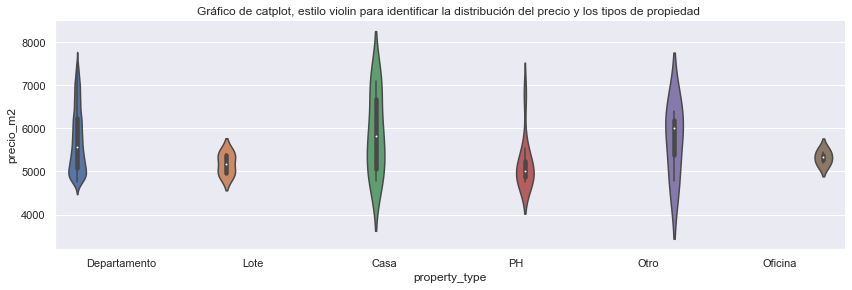

In [104]:
# Graficamos
sns.catplot(x = 'property_type', y = 'precio_m2', data = df2, hue = 'property_type', kind = 'violin', height=4, aspect=3)
plt.title('Gráfico de catplot, estilo violin para identificar la distribución del precio y los tipos de propiedad ')

La propiedades que forman parte de este subgrupo son Departamento, Casa y Otro. Lo cual tiene sentido, si pensamos a este grupo como un subgrupo de propiedades de lujo. Las propiedades tipo PH no suelen pertencer a este sector. 

La distribución dentro de las casas tiene una mayorcantidad de instancias dentro del rango de valores de 5800 a 6000 metros cuadrados.

Los departamentos tienen una distribución más homogénea dentro de un rango de valores más amplio. 

El las propiedades dentro de la categoría "Otro" no queda claro cuáles son las propiedades que abarca. Tiene una distribución curiosamente muy homogénea y simétrica.

In [105]:
#Filtramos el dataset por valores de corte.
df_reduced_filt_1  = df_reduced[(df_reduced.precio_m2 >= 1134.02)&(df_reduced.precio_m2 <= 4500)] 
df_reduced_filt_1.shape

(105400, 26)

## Tratamiento de outliers en la variable surface_total

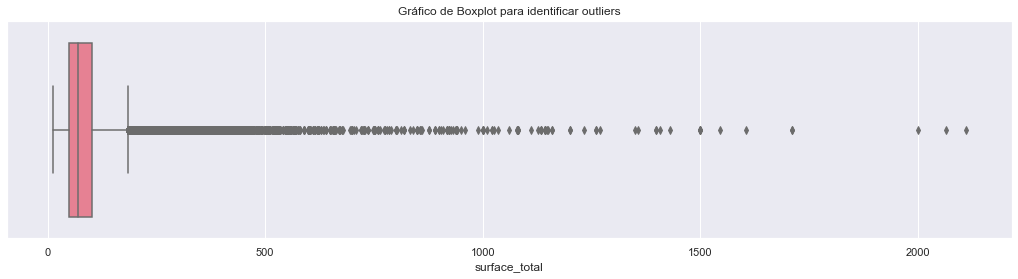

In [106]:
#Realizamos un Boxplot.
fig = plt.figure(figsize=(18, 4))
plt.title('Gráfico de Boxplot para identificar outliers')
ax = sns.boxplot(x ='surface_total',  data= df1, color = 'r', palette = 'husl')

Observamos outliers o valores que se ubican más allá del tercer cuartil. 

Vamos a realizar el mismo procedimiento realizado para el valor del metro cuadrado.

In [107]:
minimum_surface = np.min(df1.surface_total)
maximum_surface = np.max(df1.surface_total)
mean_surface = np.mean(df1.surface_total)
median_surface = np.nanmedian(df1.surface_total)
std_surface = np.std(df1.surface_total)

print("Superficie mínima en m2: {:,.2f}".format(minimum_surface))
print("Superficie máxima en m2: {:,.2f}".format(maximum_surface))
print("Superficie promedio en m2: {:,.2f}".format(mean_surface))
print("Superficie mediana en m2: {:,.2f}".format(median_surface))
print("Desvío estándar en m2: {:,.2f}".format(std_surface))

Primer_quartil = np.nanpercentile(df1.surface_total, 25)
Tercer_quartil = np.nanpercentile(df1.surface_total, 75)
Inter_quartil = Tercer_quartil - Primer_quartil
print('Percentiles de superficie')
print('Primer cuartil: {:,.2f}'.format(Primer_quartil))
print('Tercer cuartil: {:,.2f}'.format(Tercer_quartil))
print('Rango intercuartílico: {:,.2f}'.format(Inter_quartil))


Superficie mínima en m2: 12.00
Superficie máxima en m2: 2,111.00
Superficie promedio en m2: 89.62
Superficie mediana en m2: 69.00
Desvío estándar en m2: 73.92
Percentiles de superficie
Primer cuartil: 49.00
Tercer cuartil: 103.00
Rango intercuartílico: 54.00


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

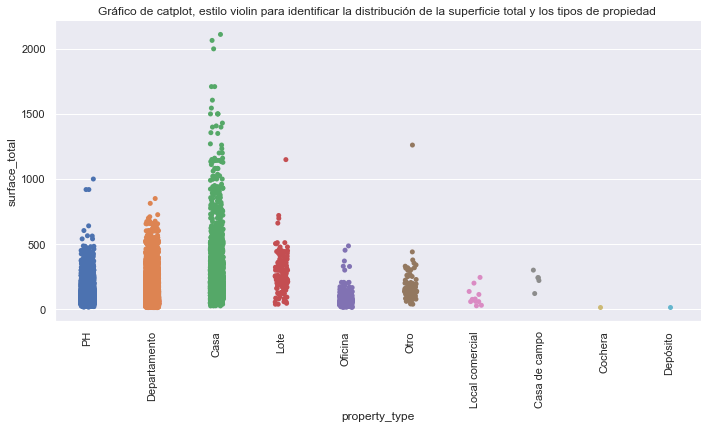

In [108]:
sns.catplot(x = 'property_type', y = 'surface_total', data = df1, hue = 'property_type',  height=5, aspect=2)
plt.title('Gráfico de catplot, estilo violin para identificar la distribución de la superficie total y los tipos de propiedad ')
plt.xticks(rotation = 90)

Los valores mínimos y máximos están muy por fuera del rango de valores entre el primer y tercer cuartil. Sin embargo, el tipo de propiedades que abarcan todo el dataset es muy heterogéneo. Es entendible que un Lote tenga más de 500 metros cuadrados. Dentro de las categorías de casas, es muy amplio el rango de metros cuadrados que puede tener una propiedad. No es lo mismo una casa en almagro donde difícilmente se excedan los 300 metros cuadrados que una casa quinta en Ing. Maschwitz donde puede tener más de 1000 m2. 
Vamos a analizar la superficie cubierta.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

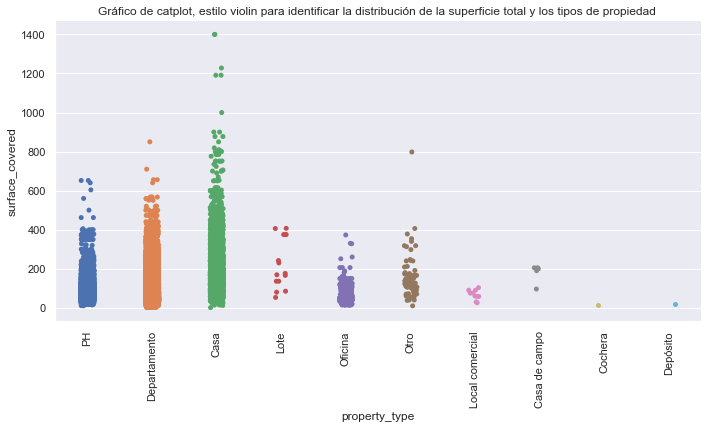

In [109]:
sns.catplot(x = 'property_type', y = 'surface_covered', data = df1, hue = 'property_type',  height=5, aspect=2)
plt.title('Gráfico de catplot, estilo violin para identificar la distribución de la superficie total y los tipos de propiedad ')
plt.xticks(rotation = 90)

En este caso, es posible hacer un tratamiento de outliers. Claramente un PH no puede tener 6000 metros cuadrados. Asimismo como dejamos de lado las propiedades de lujo de lado, vamos a trabajar con una superficie cubierta de menos de 1000 en principio. En relación al rango mínimo, puede haber valores bajos que tengan sentido, cómo una cochera.

Vamos a probar con las técnicas de rango intercuartil y las 3 sigmas para comparar.

In [110]:
minimum_surface = np.min(df1.surface_covered)
maximum_surface = np.max(df1.surface_covered)
mean_surface = np.mean(df1.surface_covered)
median_surface = np.nanmedian(df1.surface_covered)
std_surface = np.std(df1.surface_covered)

print("Superficie mínima en m2: {:,.2f}".format(minimum_surface))
print("Superficie máxima en m2: {:,.2f}".format(maximum_surface))
print("Superficie promedio en m2: {:,.2f}".format(mean_surface))
print("Superficie mediana en m2: {:,.2f}".format(median_surface))
print("Desvío estándar en m2: {:,.2f}".format(std_surface))

Primer_quartil = np.nanpercentile(df1.surface_covered, 25)
Tercer_quartil = np.nanpercentile(df1.surface_covered, 75)
Inter_quartil = Tercer_quartil - Primer_quartil
print('Percentiles de superficie')
print('Primer cuartil: {:,.2f}'.format(Primer_quartil))
print('Tercer cuartil: {:,.2f}'.format(Tercer_quartil))
print('Rango intercuartílico: {:,.2f}'.format(Inter_quartil))

Superficie mínima en m2: 1.00
Superficie máxima en m2: 1,400.00
Superficie promedio en m2: 76.71
Superficie mediana en m2: 60.00
Desvío estándar en m2: 55.98
Percentiles de superficie
Primer cuartil: 44.00
Tercer cuartil: 89.00
Rango intercuartílico: 45.00


Hay valores muy atípicos por fuera del primer y cuarto cuartil

In [111]:
# Rango intercuartílico
minimo = Primer_quartil - 1.5* Inter_quartil
maximo = Tercer_quartil + 1.5* Inter_quartil
print('Mínimo: {:,.2f}'.format(minimo))
print('Máximo: {:,.2f}'.format(maximo))


Mínimo: -23.50
Máximo: 156.50


Vamos a probar con las 3 sigmas

In [112]:
# Reglas de las 3 sigmas
mean = np.mean(df1.surface_covered)
median = np.nanmedian(df1.surface_covered)
std = np.std(df1.surface_covered)
# Calculamos los valores máximos y mínimos
sigma_minimo = mean - std*3
sigma_maximo = mean + std*3
print('Media: {:,.2f}'.format(mean))
print('Mediana: {:,.2f}'.format(median))
print('DS: {:,.2f}'.format(std))
print('sigma_minimo: {:,.2f}'.format(sigma_minimo))
print('sigma_minimo: {:,.2f}'.format(sigma_maximo))



Media: 76.71
Mediana: 60.00
DS: 55.98
sigma_minimo: -91.22
sigma_minimo: 244.64


In [113]:
df1 = df1[df1.surface_covered <= sigma_maximo]
df1.surface_covered.shape

(98217,)

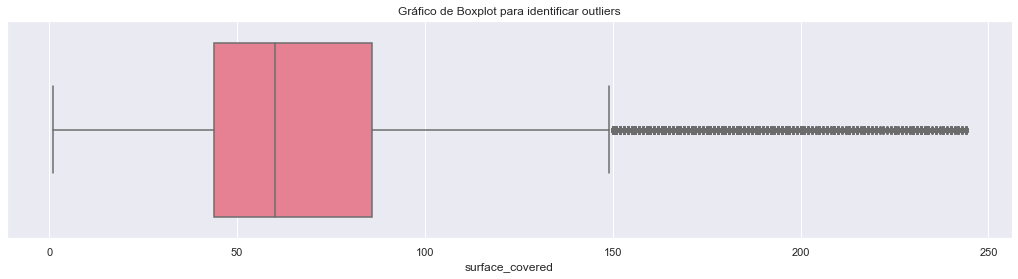

In [114]:
fig = plt.figure(figsize=(18, 4))
plt.title('Gráfico de Boxplot para identificar outliers')
ax = sns.boxplot(x ='surface_covered',  data= df1, color = 'r', palette = 'husl')

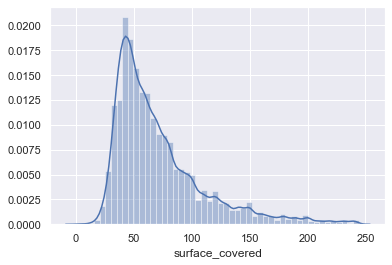

In [115]:
sns.distplot(df1.surface_covered)

Vemos que todavía quedan propiedades por fuera del tercer cuartil, con valores de superficie cubierta dentro de los rangos posibles. De todas formas, en el histograma observamos una asimetría hacia al derecha. FIltraremos por el valor maximo obtenido mediante la regla del rango intercuartílico. Perderemos información útil, una superficie cubierta mayor a 160 metros cuadrados no es un valor muy atípico en la realidad. De todas formas,  como la superficie cubierta está altamente correlacionada con el precio, decidimos generar una dataset homógeneo aunque perdamos información relevante. 

In [116]:
df1 = df1[df1.surface_covered <= maximo]


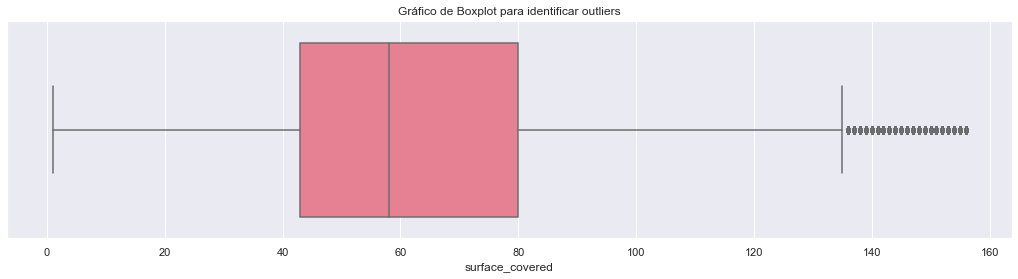

In [117]:
fig = plt.figure(figsize=(18, 4))
plt.title('Gráfico de Boxplot para identificar outliers')
ax = sns.boxplot(x ='surface_covered',  data= df1, color = 'r', palette = 'husl')

Luego del filtrado obtenemos un dataset con pocos valores por fuera del tercer cuartil

In [118]:
# Filtramos por los valores de corte
df_reduced_filt_1 = df_reduced_filt_1[df_reduced_filt_1.surface_covered <= maximo]

In [119]:
#dataset a utilizar
df_escalado = df_reduced_filt_1
df_escalado.head()


,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,start_date_year,end_date_year,...,Local comercial,Lote,Oficina,Otro,PH,Bs.As. G.B.A. Zona Norte,Bs.As. G.B.A. Zona Oeste,Bs.As. G.B.A. Zona Sur,Capital Federal,precio_m2
1,-34.624056,-58.412110,2.0,1.0,2.0,70.0,58.0,159000.0,2019,2019,...,0,0,0,0,1,0,0,0,1,2271.428571
2,-34.593569,-58.427474,2.0,1.0,1.0,45.0,45.0,125000.0,2019,2019,...,0,0,0,0,1,0,0,0,1,2777.777778
3,-34.581294,-58.436754,2.0,1.0,1.0,85.0,50.0,295000.0,2019,2019,...,0,0,0,0,1,0,0,0,1,3470.588235
5,-34.593779,-58.441239,2.0,1.0,1.0,56.0,56.0,150000.0,2019,2019,...,0,0,0,0,1,0,0,0,1,2678.571429
6,-34.600988,-58.433061,2.0,1.0,1.0,70.0,70.0,159500.0,2019,2019,...,0,0,0,0,1,0,0,0,1,2278.571429


In [120]:
df_escalado = df_escalado.drop(['Lote', 'Oficina', 'Otro', 'Local comercial', 'Cochera', 'Depósito', 'Casa de campo'], axis = 1)
df_escalado.shape

(98734, 19)

Luego del tratamiento de los outliers, tenemos al dataset listo para realizar el siguiente tratamiento, el escalado de datos. 

In [121]:
# Establecemos las variables
y = df_escalado.price
X = df_escalado.drop(['price'], axis = 1)

Vamos a utilizar la función de StandarScaler de Scikit Learn. Utilizamos with_mean = True y with_std = True, para que considere a la media del grupo de entrenamiento y al desvío estandar.

In [122]:
# Instanciamos
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler(copy=True, 
                            with_mean=True, 
                            with_std=True)

In [123]:
# Entrenamos
scaled_array = std_scaler.fit_transform(X)

In [124]:
# Transformamos el arreglo en un dataframe con la función de pandas
scaled_df = pd.DataFrame(scaled_array, columns= X.columns)

In [125]:
# Comprobamos el escalado
scaled_df.head()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,start_date_year,end_date_year,created_on_year,Casa,Departamento,PH,Bs.As. G.B.A. Zona Norte,Bs.As. G.B.A. Zona Oeste,Bs.As. G.B.A. Zona Sur,Capital Federal,precio_m2
0,-0.371404,0.397776,-0.732866,-0.883219,0.776928,-0.257019,-0.322145,-0.28485,-0.490958,-0.28485,-0.203251,-2.404796,3.054149,-0.428078,-0.223142,-0.261046,0.602147,-0.275295
1,0.013743,0.260691,-0.732866,-0.883219,-0.635832,-0.755382,-0.758648,-0.28485,-0.490958,-0.28485,-0.203251,-2.404796,3.054149,-0.428078,-0.223142,-0.261046,0.602147,0.419445
2,0.168815,0.177888,-0.732866,-0.883219,-0.635832,0.041999,-0.590762,-0.28485,-0.490958,-0.28485,-0.203251,-2.404796,3.054149,-0.428078,-0.223142,-0.261046,0.602147,1.370021
3,0.011089,0.137872,-0.732866,-0.883219,-0.635832,-0.536103,-0.389299,-0.28485,-0.490958,-0.28485,-0.203251,-2.404796,3.054149,-0.428078,-0.223142,-0.261046,0.602147,0.283328
4,-0.079985,0.210836,-0.732866,-0.883219,-0.635832,-0.257019,0.080782,-0.28485,-0.490958,-0.28485,-0.203251,-2.404796,3.054149,-0.428078,-0.223142,-0.261046,0.602147,-0.265495


Respecto a las variables de lat y lon, no creo que el escalado sea una opción correcta. Al ser coordenadas polares, los cálculos realizados durante el escalado pueden modificar los valores de formal tal que pierdan relación con la variable respuesta.

Vamos realizar un filtrado para ver cuantas instancias se repiten en estas variables.

In [126]:
# Filtramos
lat_long_frec = scaled_df.groupby(['lat', 'lon']).size()
lat_long_frec = lat_long_frec[lat_long_frec > 1].sort_values(ascending=False)
lat_long_frec

lat        lon      
-0.129359  -0.076848    6496
 2.142227  -1.097192     512
-0.032831   0.099866     254
 0.193676   0.007784     217
 0.209603   0.269099     198
                        ... 
 0.060221  -0.325676       2
 0.059965   0.518694       2
 0.059943  -0.196316       2
 0.059905   0.079089       2
-0.023224   0.643501       2
Length: 14675, dtype: int64

Hay muchas instancias que se repiten. De todas maneras, vamos a dejar estas variables y evaluar la correlación que tienen con la variable a predecir mediante un gráfico de heatmap

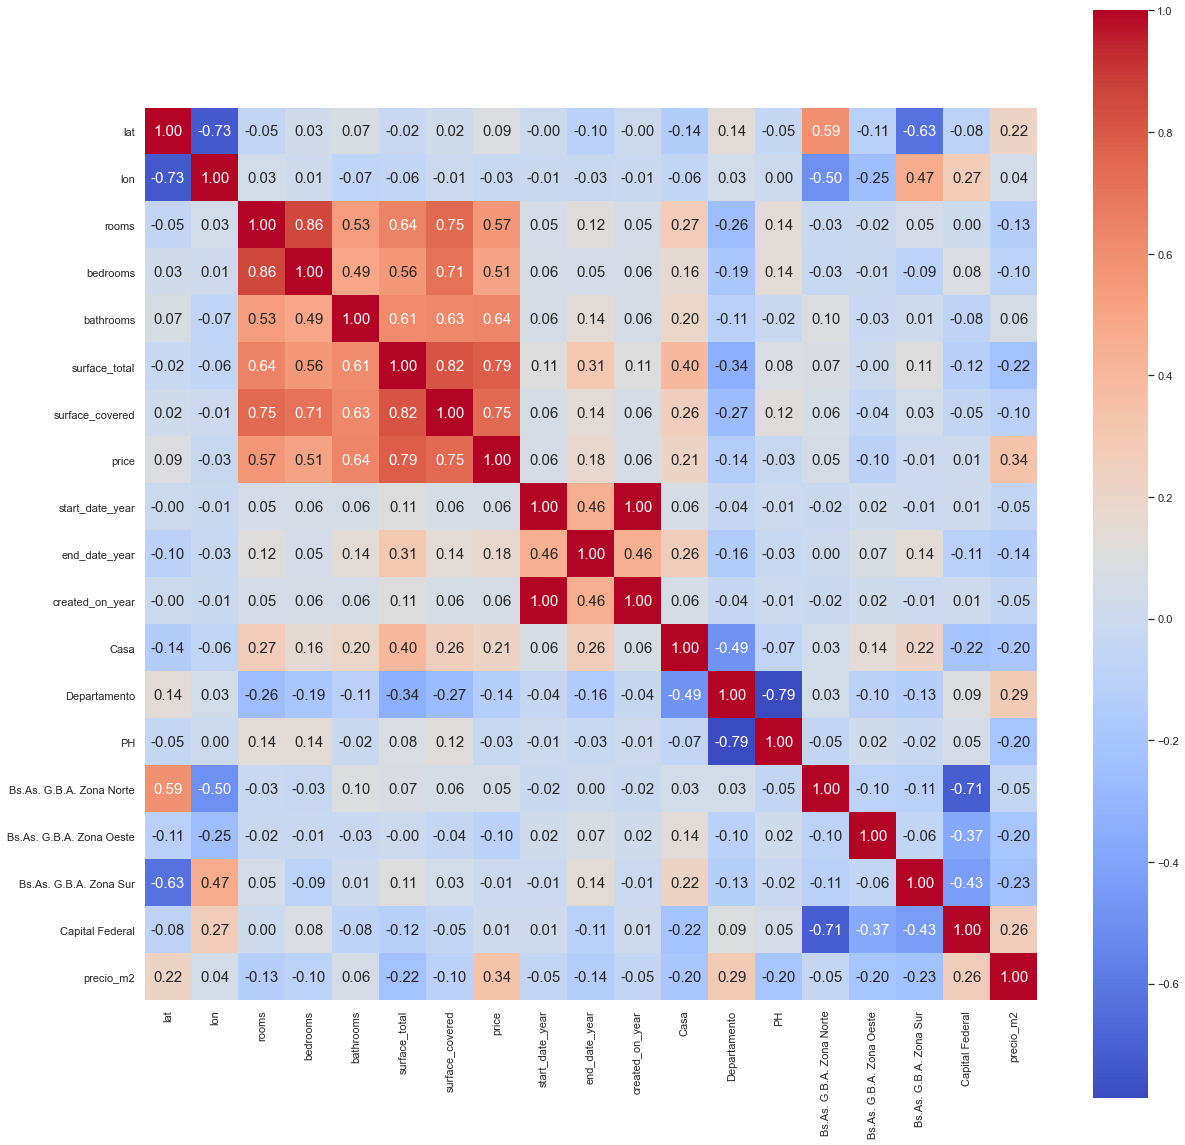

In [127]:
# Graficamos las correlaciones
corr = df_escalado.corr(method='pearson') 
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= df_escalado.columns, 
           yticklabels= df_escalado.columns,
           cmap= 'coolwarm')

plt.show()

En el gráfico de correlaciones, las variables que más influyen en la variable a respuesta son: surface_total, surface_covered, bathrooms, bedrooms y rooms. 
Si bien tienen una alta correlación positiva con la variable respuesta, algunas están muy correlacionadas entre si. rooms y bedrooms tienen una correlación del 87%. Podríamos desestimar alguna para reducir la dimensionalidad.
En el caso de lat y lon, curiosamente tienen una correlación muy baja con el precio. Entre ellas, existe una alta correlación negativa, lo cual es lógico debido a que son coordenadas polares.   
EN el caso de las variables start_date_year, end_date_year y created_on, las correlaciones entre ellas es del 100% y tienen una correlación del 46% con el precio. Vamos a desestimar.
Si bien podríamos retirar algunas variables del dataset, vamos utilizar la técnica de PCA para reducir la dimensionalidad.

In [128]:
scaled_df.shape

(98734, 18)

Retiramos las variable precio_m2 debido a que incluye a la variable a predecir (precio). Al incluir la variable respuesta dentro de las variables predictoras, sesgaría el modelo. 

In [129]:
scaled_df = scaled_df.drop('precio_m2', axis = 1)

**Disminución de la dimensionalidad con PCA**

Utilizaremos Análisis de Componentes Principales (PCA) para lograr una reducción de la dimensionalidad

In [130]:
# Establecemos las varibles independientes y  la dependiente (precio)
y = df_escalado.price
X = scaled_df

Vamos a utilizar la función shape para obtener cuantás instancias y variables tiene el dataset. Recordar que hicimos una reducción aleatoria para poder correr con más facilidad el análisis. 

In [131]:
# utilizamos la función shape
scaled_df.shape

(98734, 17)

Tenemos 98916 instancias y 18 variables. Vamos a realizar la técnica de PCA para reducir la cantidad de variables. Para lograrlo, tenemos que definir en cuantos componentes descomponer las variables. Desarrollamos una función que vaya itinerando entre de 1 a 18 componentes en función de una métrica que nos permita evaluar con cada valor cuánto aumenta el error. En este caso utilizaremos el RSME.
EL objetivo encontrar un valor menor a 18, que tenga un RSME similar a la utilización de todas las variables (18), de ese modo establecer un número de componentes principales que no genere una pérdida en la varianza acumulada.
Los componentes principales representan los ejes en donde se acumula la mayor varianza. Por lo tanto, si preservamos esos ejes y llevamos a un valor de 0 aquellos que tienen la menor variabza podemos preservar la capacidad del conjunto de de datos de predecir la variable respuesta y reducir la dimensionalidad. 
Al reducir la dimensionalidad, preservando al máximo posible la varianza acumulada, aumentamos la eficiencia de los modelos y la significancia estadística.
Como modelo utilizaremos un regresor de vecinos cercanos simple que nos permita evaluar de manera itinerante todos los valores de la lista de "components".

In [132]:
# Realizamos un train, test y split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [133]:
# Utilizamos la función integrada en PCA de Sklearn
pca = PCA()
X_train = pca.fit_transform(X_train)
pca.explained_variance_ratio_

array([2.41966972e-01, 1.56147349e-01, 1.32482490e-01, 1.17354796e-01,
       9.79404777e-02, 6.65904798e-02, 5.27228883e-02, 3.71197822e-02,
       3.15762428e-02, 2.18190196e-02, 1.75004423e-02, 8.88191409e-03,
       7.88232468e-03, 7.77311181e-03, 2.24171001e-03, 9.55934293e-32,
       4.26130530e-32])

La función .explained_variance_ratio_ nos indica la proporción de de la varianza que correspone a cada uno de los 18 ejes obtenidos luego de realizar el PCA. Si sumamos todos los valores obtendremos el 100% de la varianza. 
Los valores obtenidos no corresponden a las variables originales, sino a los ejes obtenidos luego de la transformación de los datos. 
Mediante la función de for a continuación, obtendremos la varianza acumulada transformando el dataset original mediante PCA con una lista de componentes del 1 al total de variables, 18. Luego graficaremos la varianza en función del número de componentes principales.

In [134]:
# Definimos las listas vacias para los valores de accuracy deseados
lista_RSME_pca = []


# Definimos la lista de valores de los componentes que vamos a explorar
components = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]

# Generamos en loop sobre los distintos valores 
for n in components:
    
    pca = PCA(n_components= n)
    
    pca_X = pca.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(pca_X, y, test_size=0.33, random_state=42)
    
    # Utilizamos un regresor de vecinos cercanos
    clf = KNeighborsRegressor()
    
    clf.fit(X_train,y_train)
    
   
    y_pca_pred = clf.predict(X_test)
    pca_acc = mean_squared_error(y_test, y_pca_pred)
    
  
    
    # Agregar la información a las listas
    lista_RSME_pca.append(pca_acc)
  
 
    
    

Vamos a graficar los valores para cada número de componentes  y evaluamos

Text(0, 0.5, 'RSME')

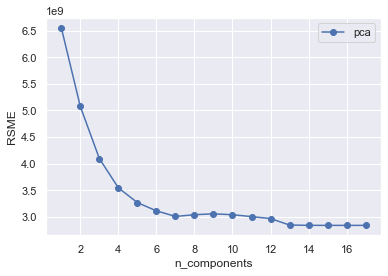

In [135]:

plt.plot(components,lista_RSME_pca,'o-',label='pca' )

plt.legend()
plt.xlabel('n_components')
plt.ylabel('RSME')

En el gráfico podemos ver que a un número de 13 componentes, el RSME se estabiliza en un valor constante. Podríamos usar ese valor para descomponer las variables independientes y preservar la relación con la variable dependiente.
La función PCA de Scikit learn tiene integradas otras aplicaciones como, explained_variance_ratio_ que indica la varianza acumulada en relación a cada variable.

La función de PCA, tiene integrada la posibilidad de graficar la varianza acumulada en función del número de componentes.

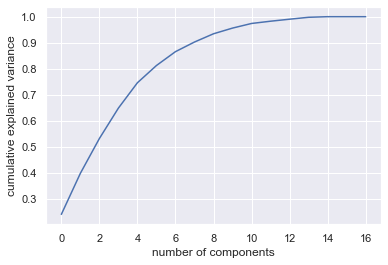

In [136]:
# Graficamos
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

En el gráfico podemos observar que cerca de los 13 componentes, la varianza acumulada se mantiene. Dicho de otro modo casi el 100% de la varianza se explica por 13 variables. 
Es decir que si reducimos de 18 a 13 componentes, las variables guardan la misma información. Por lo tanto utilizaremos ese valor para reducir la dimensionalidad.

In [137]:
# Implementamos la función con 13 componentes
pca = PCA(n_components= 13)   

In [138]:
# Entrenamos
pca_X = pca.fit_transform(X)

In [139]:
# Utilizamos el shape para comprobar la reducción.
pca_X.shape

(98734, 13)

In [140]:
pca_X_df = pd.DataFrame(pca_X)
pca_X_df.shape

(98734, 13)

In [141]:
pca_X_df.shape

(98734, 13)

In [142]:
print(abs( pca.components_ ))

[[2.52369167e-02 1.85560303e-02 4.16240714e-01 3.82407484e-01
  3.43989683e-01 4.29987751e-01 4.31199072e-01 1.10976176e-01
  1.71423634e-01 1.10976176e-01 2.36635829e-01 2.39835596e-01
  1.15757941e-01 3.05198669e-02 1.85686446e-02 6.03209138e-02
  6.72760238e-02]
 [5.47594875e-01 5.22013402e-01 2.18929772e-02 1.33826019e-02
  8.13652255e-02 2.25992858e-02 3.12106487e-02 2.84988532e-02
  4.86815609e-02 2.84988532e-02 4.24789931e-02 9.00918752e-02
  6.92281252e-02 4.76515917e-01 6.57060718e-02 3.36592880e-01
  2.35565384e-01]
 [2.13464559e-02 5.96464892e-02 1.58371513e-01 1.76437760e-01
  8.82737476e-02 3.21329676e-02 1.33527119e-01 5.84254583e-01
  4.15211797e-01 5.84254583e-01 9.34429433e-02 2.50331671e-03
  7.55229746e-02 6.21194209e-02 1.07045990e-01 8.11321223e-02
  1.47211424e-01]
 [1.75325705e-01 3.75208722e-02 1.10523967e-01 2.00314759e-01
  8.68677220e-02 8.07394379e-03 8.81484478e-02 2.28707616e-01
  2.58404695e-02 2.28707616e-01 3.01215725e-01 2.85305492e-01
  1.20431579e-01

In [143]:
print(pd.DataFrame(pca.components_))

           0         1         2         3         4         5         6  \
0  -0.025237 -0.018556  0.416241  0.382407  0.343990  0.429988  0.431199   
1   0.547595 -0.522013 -0.021893  0.013383  0.081365  0.022599  0.031211   
2  -0.021346 -0.059646 -0.158372 -0.176438 -0.088274 -0.032133 -0.133527   
3  -0.175326 -0.037521 -0.110524 -0.200315 -0.086868  0.008074 -0.088148   
4   0.097829 -0.148072 -0.061131 -0.027394 -0.197521 -0.093408 -0.094040   
5  -0.104355 -0.207756  0.037598  0.063923  0.003726 -0.003881 -0.035685   
6   0.125527 -0.098927 -0.159139 -0.241537 -0.004942  0.132027 -0.069356   
7  -0.024317 -0.057535 -0.229602 -0.275014  0.358162  0.216981  0.069288   
8  -0.022858  0.002621 -0.320070 -0.347865  0.615612  0.115589  0.056814   
9   0.006711 -0.047288 -0.196557 -0.240572 -0.559387  0.560785  0.456082   
10  0.096148 -0.665644  0.150994  0.018649 -0.011352 -0.027855 -0.088154   
11 -0.514895 -0.229537  0.239731 -0.062500 -0.002680  0.448806 -0.536278   
12  0.573675

Vamos a evaluar el resultado con un modelo de regresión kNN

In [144]:
# Hacemos un train, test split con el dataset reducido (pca_X)
X_train, X_test, y_train, y_test = train_test_split(pca_X, y, test_size=0.33, random_state=42)

In [145]:
X_train.shape

(66151, 13)

In [146]:
# Instanciamos el modelos kNN
clf1 = KNeighborsRegressor()

In [147]:
# Entrenamos
clf1.fit(X_train,y_train)

KNeighborsRegressor()

In [148]:

y_pca_pred = clf1.predict(X_test)
print('RSME con 13 variables: {0:0.4f}'. format( np.sqrt(mean_squared_error(y_test, y_pca_pred))))


RSME con 13 variables: 53331.7463


In [149]:
# Hacemos un train, test split con el dataset original (18 variables)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [150]:
# Entrenamos
clf2 = KNeighborsRegressor()
clf2.fit(X_train,y_train)

KNeighborsRegressor()

In [151]:
y_pred = clf2.predict(X_test)
print('RSME con 17 variables: {0:0.4f}'. format( np.sqrt(mean_squared_error(y_test, y_pred))))


RSME con 17 variables: 53302.5693


Vamos a graficar los resultados con y sin PCA

In [152]:
RSME={}
RSME['PCA'] =  np.sqrt(mean_squared_error(y_test, y_pca_pred))
RSME['Sin PCA'] =  np.sqrt(mean_squared_error(y_test, y_pred))

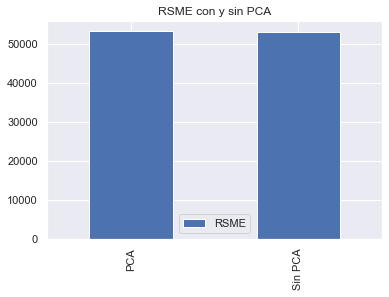

In [153]:
RSME = pd.DataFrame.from_dict(RSME,orient='index')
RSME.columns=['RSME']


RSME.plot(kind="bar",title='RSME con y sin PCA')


Podemos ver que que luego de utilizar el PCA obtuvimos una valor menor de RSME.


Vamos a evaluar los resultados mediante validación cruzada y con tres modelos diferentes. Uno de regresión lineal, un árbol de desición y un regresor de vecinos cercanos.


In [154]:
# Definimos la función evaluar con un k fold de 3 splits
def evaluar(train,labels):
    results={}
    def test_model(clf):
        
        cv = KFold(n_splits=3,shuffle=True,random_state=45)
        r2 = make_scorer(r2_score)
        r2_val_score = cross_val_score(clf, train, labels, cv=cv,scoring=r2)
        scores=[r2_val_score.mean()]
        return scores

    clf = LinearRegression()
    results["Linear"]=test_model(clf)
    
    clf = DecisionTreeRegressor()
    results["DecisionTreeRegressor"]=test_model(clf)
    
    clf = KNeighborsRegressor()
    results["KNeighborsRegressor"]=test_model(clf)
    
   
    
    results = pd.DataFrame.from_dict(results,orient='index')
    results.columns=["R Square Score"] 
    results = pd.DataFrame(results["R Square Score"].sort_values(ascending=False))
    results.plot(kind="bar",title="Model Scores")
    axes = plt.gca()
    return results


,R Square Score
KNeighborsRegressor,0.801583
DecisionTreeRegressor,0.790538
Linear,0.714174


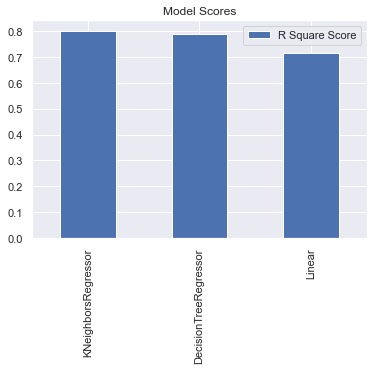

In [155]:
# Utilizamos la función con todo el dataset
evaluar(X, y)

El modelo con mejor rendimiento es el DecisionTreeRegressor.

,R Square Score
KNeighborsRegressor,0.801469
DecisionTreeRegressor,0.736634
Linear,0.711721


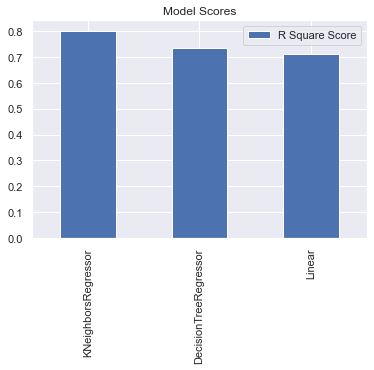

In [156]:
# Utilizamos la función con todo el dataset
evaluar(pca_X, y)

En el dataset tratado con PCA el modelo que obtuvo mejor rendimiento fue el KNeighborsRegressor. El mejor rendimiento fue con el dataset original. Sin embargo, la diferencia es mínima entre ambos y el dataset se obtuvo una ganancia en reducir la dimensión de valores y en consecuencia el uso de procesamiento. 

El modelo que obtuvo mejor rendimiento en la validación cruzada con el dataset original fue el DecisionTreeRegressor(). Vamos a probar con este modelo con ambos datasets, con y sin PCA.

Vamos a obtener la importancia de las variables con una función integrada en el método de PCA de Scikit Learn.

In [157]:
X_train, X_test, y_train, y_test = train_test_split(pca_X, y, test_size=0.33, random_state=42)

In [158]:
regresor = DecisionTreeRegressor()

In [159]:
regresor.fit(X_train,y_train)

DecisionTreeRegressor()

In [160]:
y_pred_pca = regresor.predict(X_test)
print('RSME con 13 variables: {0:0.4f}'. format(np.sqrt(mean_squared_error(y_test, y_pred_pca))))

RSME con 13 variables: 61949.9174


In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [162]:
regresor2 = DecisionTreeRegressor()

In [163]:
regresor2.fit(X_train,y_train)

DecisionTreeRegressor()

In [164]:
y_pred = regresor2.predict(X_test)
print('RSME con 17 variables: {0:0.4f}'. format(np.sqrt(mean_squared_error(y_test, y_pred))))

RSME con 17 variables: 56708.3558


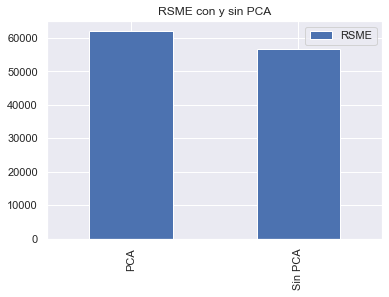

In [165]:
RSME={}
RSME['PCA'] = np.sqrt(mean_squared_error(y_test, y_pred_pca))
RSME['Sin PCA'] = np.sqrt(mean_squared_error(y_test, y_pred))

RSME = pd.DataFrame.from_dict(RSME,orient='index')
RSME.columns=['RSME']


RSME.plot(kind="bar",title='RSME con y sin PCA')




En este caso, se obtuvo un mejor rendimiento sin el procesamiento mediante PCA. Deberíamos probar con màs componentes hasta obtenes mejores métricas.

Vamos a analizar la importancia de las variables obtenidas. Scikit Learn ofrece una función integrada que evalúa la importancia de cada variable en función de la pérdida de impureza (impureza Gini)

In [166]:
regresor.feature_importances_

array([0.51612341, 0.05306424, 0.03307993, 0.04102023, 0.07939776,
       0.02524816, 0.03651138, 0.03981045, 0.0318651 , 0.05558596,
       0.0224982 , 0.02874405, 0.03705113])

Obtenemos un arrglo con la importancia de cada variables, en este caso vemos que la primer variable o el componente principal 1 es el más importante con 0.5 aprox. 

Vamos a graficar las variables el precio en función de las variables obtenidas. 

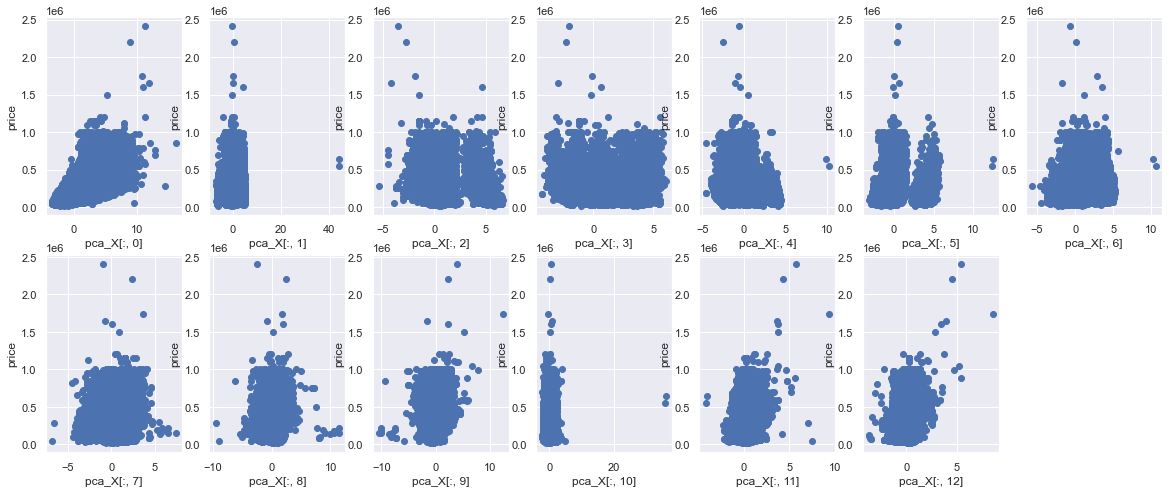

In [167]:
from matplotlib import gridspec
fig = plt.figure(figsize=(20,8))
gs = gridspec.GridSpec(2, 7)

plt.subplot(gs[0])
plt.scatter(pca_X[:, 0], y)
plt.xlabel('pca_X[:, 0]')
plt.ylabel('price')

plt.subplot(gs[1])
plt.scatter(pca_X[:, 1], y)
plt.xlabel('pca_X[:, 1]')
plt.ylabel('price')

plt.subplot(gs[2])
plt.scatter(pca_X[:, 2], y)
plt.xlabel('pca_X[:, 2]')
plt.ylabel('price')

plt.subplot(gs[3])
plt.scatter(pca_X[:, 3], y)
plt.xlabel('pca_X[:, 3]')
plt.ylabel('price')

plt.subplot(gs[4])
plt.scatter(pca_X[:, 4], y)
plt.xlabel('pca_X[:, 4]')
plt.ylabel('price')

plt.subplot(gs[5])
plt.scatter(pca_X[:, 5], y)
plt.xlabel('pca_X[:, 5]')
plt.ylabel('price')

plt.subplot(gs[6])
plt.scatter(pca_X[:, 6], y)
plt.xlabel('pca_X[:, 6]')
plt.ylabel('price')

plt.subplot(gs[7])
plt.scatter(pca_X[:, 7], y)
plt.xlabel('pca_X[:, 7]')
plt.ylabel('price')

plt.subplot(gs[8])
plt.scatter(pca_X[:, 8], y)
plt.xlabel('pca_X[:, 8]')
plt.ylabel('price')

plt.subplot(gs[9])
plt.scatter(pca_X[:, 9], y)
plt.xlabel('pca_X[:, 9]')
plt.ylabel('price')


plt.subplot(gs[10])
plt.scatter(pca_X[:, 10], y)
plt.xlabel('pca_X[:, 10]')
plt.ylabel('price')

plt.subplot(gs[11])
plt.scatter(pca_X[:, 11], y)
plt.xlabel('pca_X[:, 11]')
plt.ylabel('price')

plt.subplot(gs[12])
plt.scatter(pca_X[:, 12], y)
plt.xlabel('pca_X[:, 12]')
plt.ylabel('price')

plt.show()





En el gráfico vemos que existe una relación lineal entre la variable y el precio, lo cual coincide con la importancia de las variables obtenidas en la línea anterior.

La técnica de PCA es muy eficiente para disminuir la dimensionalida. Sin embargo en este problema, no creo que se utilizable debido a que se pierde interpretabilidad del problema. Si evaluamos con estas características, no podremos tener una referencia útil en relación a qué variable es más importante al momento de predecir el valor de una propiedad.

La técnica de PCA, cobra importancia en problemas donde sea más relevante llegar a una buena métrica o un buen resultado disminuyendo la dimensionalidad y en consecuencia, disminuir el tiempo y uso de procesamiento. Un ejemplo es el reconocimiento de imágenes. 

Vamos a continuar el trabajo con los datos previos a la transformación por PCA. 



In [168]:
# Establecemos las varibles independientes y  la dependiente (precio)
y = df_escalado.price
X = scaled_df

explicar por qué

In [169]:
scaled_df.drop(['bedrooms', 'end_date_year', 'created_on_year' ], axis = 1)

,lat,lon,rooms,bathrooms,surface_total,surface_covered,start_date_year,Casa,Departamento,PH,Bs.As. G.B.A. Zona Norte,Bs.As. G.B.A. Zona Oeste,Bs.As. G.B.A. Zona Sur,Capital Federal
0,-0.371404,0.397776,-0.732866,0.776928,-0.257019,-0.322145,-0.28485,-0.203251,-2.404796,3.054149,-0.428078,-0.223142,-0.261046,0.602147
1,0.013743,0.260691,-0.732866,-0.635832,-0.755382,-0.758648,-0.28485,-0.203251,-2.404796,3.054149,-0.428078,-0.223142,-0.261046,0.602147
2,0.168815,0.177888,-0.732866,-0.635832,0.041999,-0.590762,-0.28485,-0.203251,-2.404796,3.054149,-0.428078,-0.223142,-0.261046,0.602147
3,0.011089,0.137872,-0.732866,-0.635832,-0.536103,-0.389299,-0.28485,-0.203251,-2.404796,3.054149,-0.428078,-0.223142,-0.261046,0.602147
4,-0.079985,0.210836,-0.732866,-0.635832,-0.257019,0.080782,-0.28485,-0.203251,-2.404796,3.054149,-0.428078,-0.223142,-0.261046,0.602147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98729,-0.097681,-1.198907,0.189290,0.776928,1.557024,0.416553,-0.28485,-0.203251,0.415836,-0.327423,-0.428078,4.481461,-0.261046,-1.660723
98730,-2.800693,2.451287,-0.732866,-0.635832,-0.575972,-0.657916,-0.28485,-0.203251,0.415836,-0.327423,-0.428078,-0.223142,3.830738,-1.660723
98731,1.895293,-4.683615,-1.655023,-0.635832,-0.655710,-1.094420,-0.28485,-0.203251,0.415836,-0.327423,2.336022,-0.223142,-0.261046,-1.660723
98732,1.892804,-4.685311,-0.732866,-0.635832,-0.894924,-0.993688,-0.28485,-0.203251,0.415836,-0.327423,2.336022,-0.223142,-0.261046,-1.660723


In [170]:
df_final = scaled_df.drop(['bedrooms','end_date_year', 'created_on_year' ], axis = 1)
df_final.head()

,lat,lon,rooms,bathrooms,surface_total,surface_covered,start_date_year,Casa,Departamento,PH,Bs.As. G.B.A. Zona Norte,Bs.As. G.B.A. Zona Oeste,Bs.As. G.B.A. Zona Sur,Capital Federal
0,-0.371404,0.397776,-0.732866,0.776928,-0.257019,-0.322145,-0.28485,-0.203251,-2.404796,3.054149,-0.428078,-0.223142,-0.261046,0.602147
1,0.013743,0.260691,-0.732866,-0.635832,-0.755382,-0.758648,-0.28485,-0.203251,-2.404796,3.054149,-0.428078,-0.223142,-0.261046,0.602147
2,0.168815,0.177888,-0.732866,-0.635832,0.041999,-0.590762,-0.28485,-0.203251,-2.404796,3.054149,-0.428078,-0.223142,-0.261046,0.602147
3,0.011089,0.137872,-0.732866,-0.635832,-0.536103,-0.389299,-0.28485,-0.203251,-2.404796,3.054149,-0.428078,-0.223142,-0.261046,0.602147
4,-0.079985,0.210836,-0.732866,-0.635832,-0.257019,0.080782,-0.28485,-0.203251,-2.404796,3.054149,-0.428078,-0.223142,-0.261046,0.602147


In [171]:
y = df_escalado.price
X = df_final

### Desempeño trabajo 1

Traemos el dataset filtrado del Proyecto 1 para comparar los rendimientos

In [172]:
df = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')

In [173]:
#Realizamos el filtrado del dataset indicado en el punto 5.
dataset_Properati_filt2 = df[(df['l2'] == 'Capital Federal') & ((df['property_type'] == 'Departamento') | (df['property_type'] == 'PH') | (df['property_type'] == 'Casa'))]
dataset_Properati_filt2.shape


(91485, 19)

In [174]:
#Realizamos el filtrado según las indicaciones de la consigna.
dscheckpoint = dataset_Properati_filt2[(dataset_Properati_filt2['surface_total'] >= 15) & (dataset_Properati_filt2['surface_total'] <= 1000) ]
dscheckpoint = dscheckpoint[(dscheckpoint['price'] <= 4000000)]
columnas2 = ['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price']
dscheckpoint = dscheckpoint[columnas2]
dscheckpoint = dscheckpoint.dropna()
dscheckpoint.shape


(81019, 6)

In [175]:
dscheckpoint.head(2)

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
0,7.0,7.0,2.0,140.0,140.0,153000.0
1,2.0,1.0,2.0,70.0,58.0,159000.0


**Métricas de evaluación**

Los modelos de ML planteados predicen una variable dentro de una escala de valores continúa utilizando variables predictoras. En este caso se utiliza un análisis de regresión para predecir el precio de una propiedad en función de las siguientes características: cantidad de baños, de cuartos, ambientes, superficie total y superficie cubierta. 
Con el objetivo de evaluar los resultados de las predicciones, se utilizará  como métrica  el RSME  (raíz del error cuadrático medio). Dicho estimador se compone por la raíz cuadrada  del promedio de la suma de las diferencias entre los valores reales y los valores predichos elevados al cuadrado. 
La elección del RSME se fundamenta en la capacidad de dicho estimador para comparar el error entre dos modelos predictores. Si bien es una métrica que castiga los errores muy altos, es adecuada para evaluar estos modelos. El dataset utilizado fue filtrado de valores excepcionales o outliers, por lo tanto el RSME no se enfrentará a grandes diferencias entre los valores reales y predichos. 
Cuánto mayor es el resultado menos preciso es el modelo como predictor de valores. Una métrica similar es el MAE (error medio absoluto). Dicha métrica se podría utilizar para comparar ambos modelos.  Los valores excepcionales no la modifican tanto como en el RSME, es más robusta, pero su análisis es más complejo y requiere mayor proceso.
En relación al límite del valor del RSME, es necesario plantear un modelo de prueba a partir del cual tener una referencia. En este caso, un modelo Bnechmark de regresión lineal para evaluar los modelos de NNK y árbol de decisión. 
Una desventaja de la utilización de estas métricas es que, si bien se obtiene una medida de magnitud del error, no permite conocer la dirección. El modelo puede estar subestimando o sobreestimando.
Como ventaja, permite trabajar con las unidades de medida utilizadas en la variable a predecir.


**Modelo kNN**

In [176]:
# selección de variables
X1 = dscheckpoint.drop('price', axis=1)
y1 = dscheckpoint.price

In [177]:
#crear objeto modelos
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression


In [178]:
clf_tree = DecisionTreeRegressor()
clf_knn = KNeighborsRegressor()

In [179]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.33, random_state=42)

In [180]:
# Modelo Benchmark

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
print(linear_model.coef_, linear_model.intercept_)

[ 1.21958902e+04 -6.34300748e+04  1.32416957e+05  2.04732597e+03
  1.12268400e+02] -56786.29785501299


In [181]:

# Definir el modelo con el valor de vecinos deseado
clf = LinearRegression()
# Entrenar el modelo
clf.fit(X_train,y_train)
# Predecir y evaluar sobre el set de entrenamiento
y_train_pred = clf.predict(X_train)
train_acc = mean_squared_error(y_train, y_train_pred)
# Predecir y evaluar sobre el set de evaluación
y_test_pred = clf.predict(X_test)
test_acc = mean_squared_error(y_test, y_test_pred)


In [182]:
bench_1 = np.sqrt(test_acc)
print(f'Error cuadrático medio para modelo benchmark para X_test:  {test_acc}')
print(f'RSME para modelo benchmark X_test:  {np.sqrt(test_acc)} ')


Error cuadrático medio para modelo benchmark para X_test:  40955704817.847046
RSME para modelo benchmark X_test:  202375.1585986952 


In [183]:
#Entrenamos con los hiperparámetros elegidos
clf_tree_best = DecisionTreeRegressor(max_depth = 6)
clf_knn_best = KNeighborsRegressor(n_neighbors= 4)
cfl_benchmark = linear_model

In [184]:
clf_tree_best.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=6)

In [185]:
clf_knn_best.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=4)

In [186]:
cfl_benchmark.fit(X_train, y_train)

LinearRegression()

**Para el modelo árbol**

In [187]:
#Predecimos con valores reales y obtenemos el ECM.
y_test_pred = clf_tree_best.predict(X_test)

arbol_1 = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'RSME para modelo árbol con max_depth = 6 para X_test:  {np.sqrt(mean_squared_error(y_test, y_test_pred))} ')


RSME para modelo árbol con max_depth = 6 para X_test:  166461.35409018665 


**Para el modelo kNN**

In [188]:
y_test_pred = clf_knn_best.predict(X_test)

kNN_1 = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'RSME para modelo de vecinos con kNN = 4 para X_test: {np.sqrt(mean_squared_error(y_test, y_test_pred))} ')


RSME para modelo de vecinos con kNN = 4 para X_test: 155066.11554864785 


**Comparación y gráficos de modelos utilizados en el proyecto 1**

Vamos a comparar los modelos de vecinos cercanos y árbol de desición con el dataset del Proyecto 1 


Modelo: Modelo Benchmark
Raíz del error cuadrático medio en Train: 199092.34349941407
Raíz del error cuadrático medio en Test: 202375.1585986952


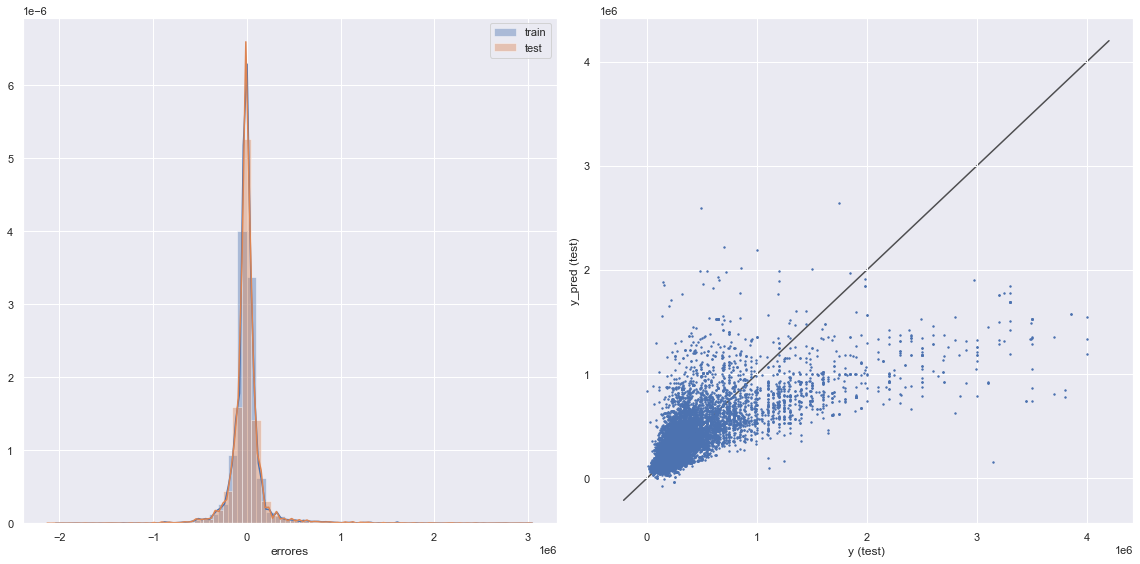

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 158961.98528869357
Raíz del error cuadrático medio en Test: 166461.35409018665


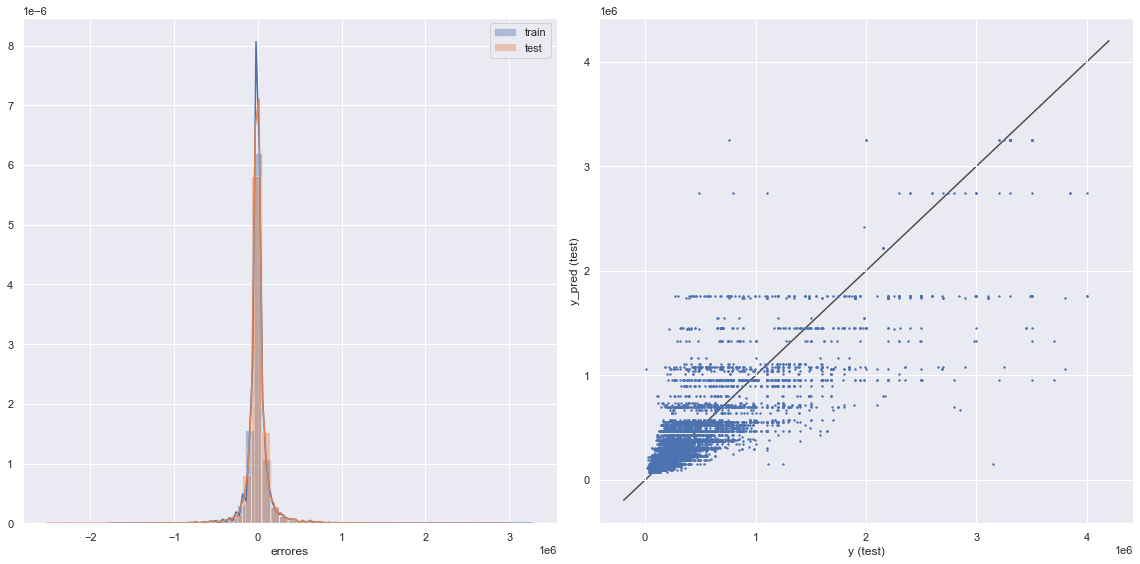

Modelo: Vecinos más cercanos
Raíz del error cuadrático medio en Train: 115426.08870183105
Raíz del error cuadrático medio en Test: 155066.11554864785


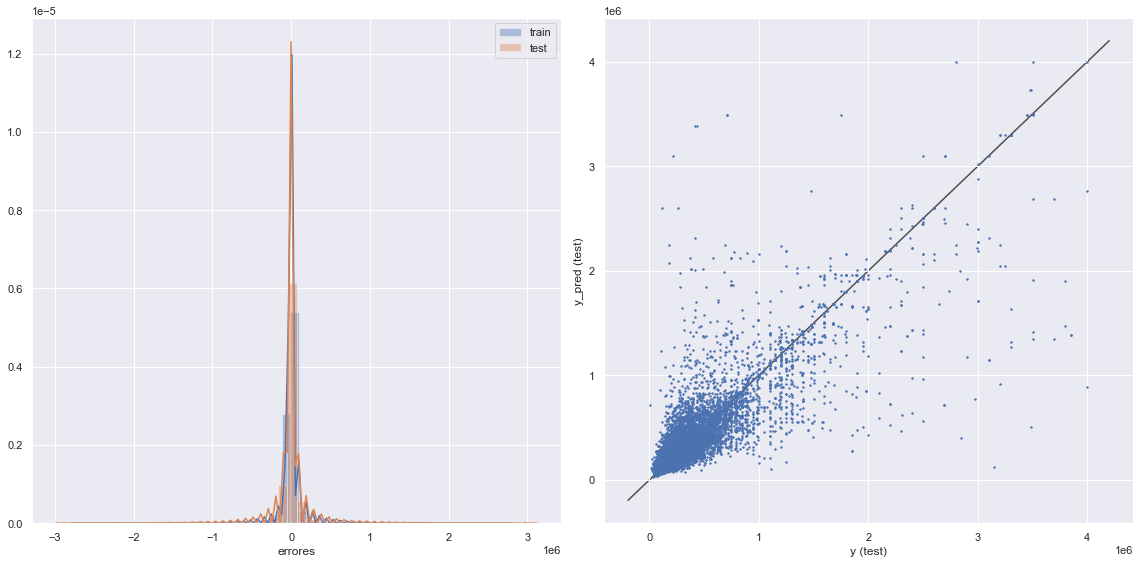

In [189]:
modelos = ['Modelo Benchmark', 'Árbol de Decisión', 'Vecinos más cercanos']

for i, model in enumerate([cfl_benchmark, clf_tree_best, clf_knn_best]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    
    print(f'Modelo: {modelos[i]}')

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (16,8))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 50, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 50, label = 'test')
    plt.xlabel('errores')
    plt.legend()


    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

**Análisis de los gráficos:**


En los histogramas se ven distribuciones simétricas con la mayoría de los valores agrupados en el 0.
Respecto a las curvas con los valores predichos y los reales se ve una variación que aumenta en relación a valores muy altos. De todas maneras se distribuyen de manera proporcionada.**
Por lo tanto se puede pensar que el modelo no sobrestima  ni subestima.

**Dataset filtrado y procesado para el Proyecto 2**

Vamos a probar los modelos de Proyecto 1 con el dataset del Proyecto 2 y comparar sus rendimientos.

In [190]:
# Nuevo Dataset
y = df_escalado.price
X = df_final



In [191]:
# Separamos en conjunto de testeo y entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [192]:
# Instaciams los modelos
clf_tree_best = DecisionTreeRegressor(max_depth = 6)
clf_knn_best = KNeighborsRegressor(n_neighbors= 4)
cfl_benchmark = linear_model


Entrenamos con los hiperparámetros elegidos en el Proyecto 1

In [193]:
clf_tree_best.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=6)

In [194]:
clf_knn_best.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=4)

In [195]:
cfl_benchmark.fit(X_train, y_train)

LinearRegression()

**Para el modelo árbol**

In [196]:
#Predecimos con valores reales y obtenemos el RSME.
y_test_pred = clf_tree_best.predict(X_test)
arbol_2 = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'RSME para modelo árbol con max_depth = 6 para X_test:  {np.sqrt(mean_squared_error(y_test, y_test_pred))} ')


RSME para modelo árbol con max_depth = 6 para X_test:  61697.013816613726 


**Para el modelo kNN**

In [197]:
#Predecimos con valores reales y obtenemos el RSME.
y_test_pred = clf_knn_best.predict(X_test)
kNN_2 = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'RSME para modelo de vecinos con kNN = 4 para X_test: {np.sqrt(mean_squared_error(y_test, y_test_pred))} ')

RSME para modelo de vecinos con kNN = 4 para X_test: 51352.47750150323 


Modelo: Modelo Benchmark
Raíz del error cuadrático medio en Train: 63771.22725602421
Raíz del error cuadrático medio en Test: 64399.69988148597


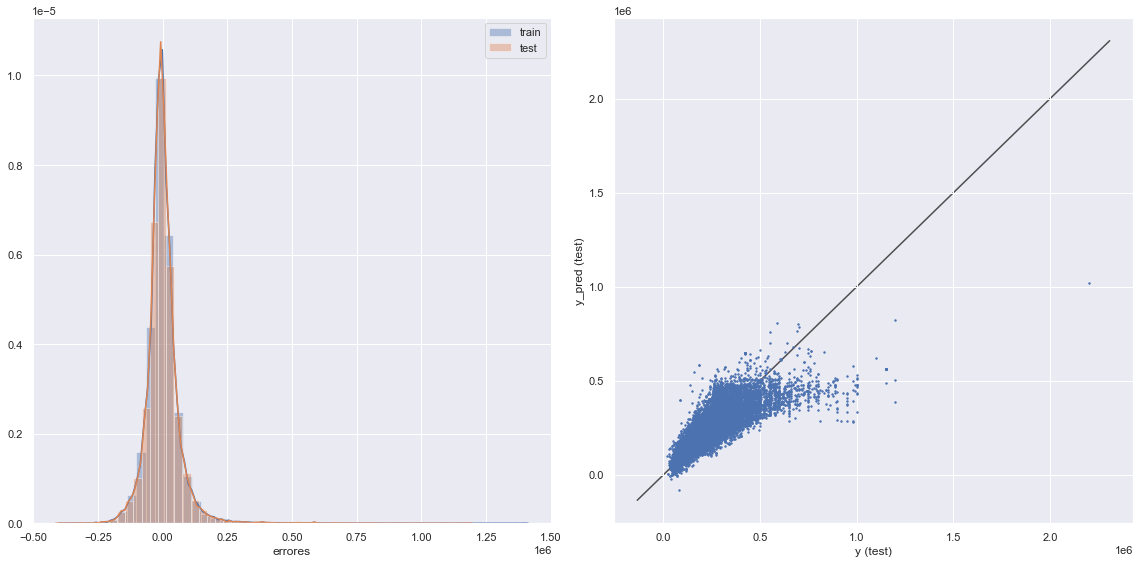

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 60884.89202632166
Raíz del error cuadrático medio en Test: 61697.013816613726


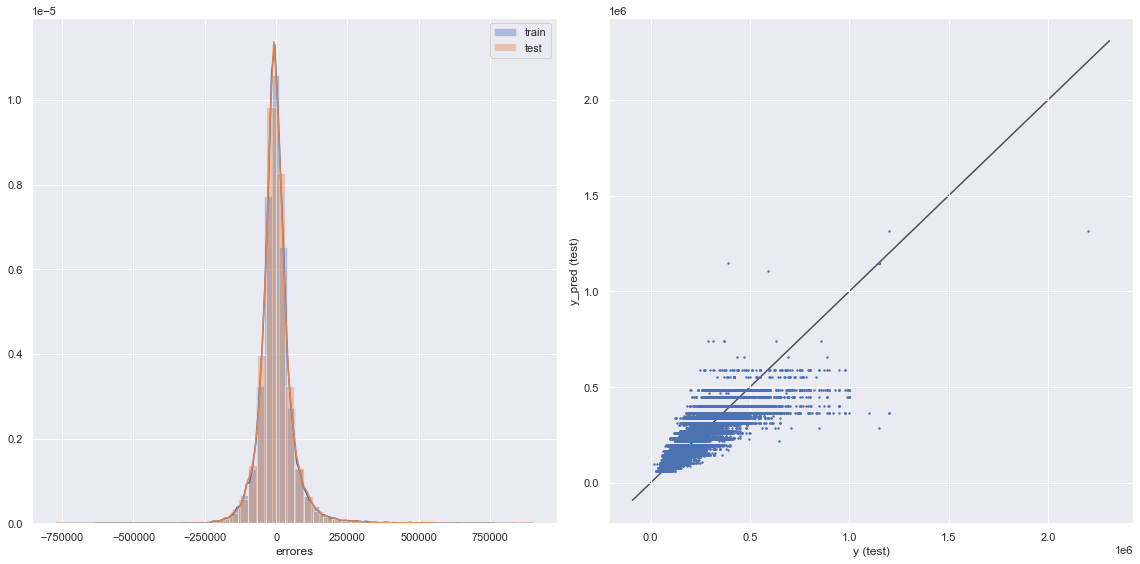

Modelo: Vecinos más cercanos
Raíz del error cuadrático medio en Train: 39175.38696704525
Raíz del error cuadrático medio en Test: 51352.47750150323


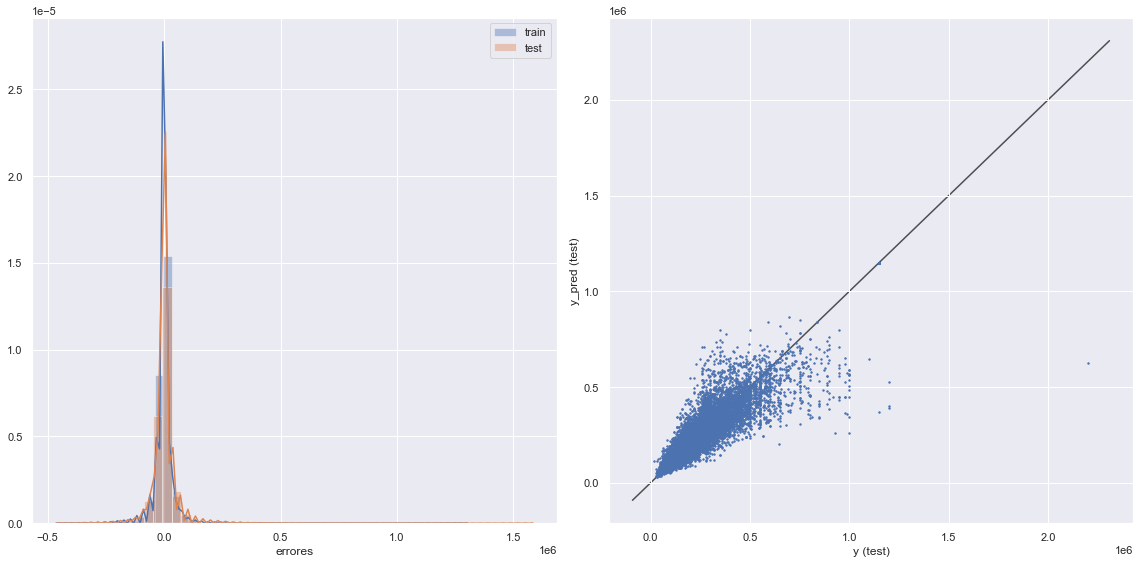

In [198]:
# Comparamos los 3 modelos
modelos = ['Modelo Benchmark', 'Árbol de Decisión', 'Vecinos más cercanos']

for i, model in enumerate([cfl_benchmark, clf_tree_best, clf_knn_best]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    
    print(f'Modelo: {modelos[i]}')

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (16,8))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 50, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 50, label = 'test')
    plt.xlabel('errores')
    plt.legend()


    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

**Análisis de gráficos**

En el modelo de árbol, el histograma de erroes es simétrico. Los picos de los errores sobre los datos de entrenamiento y testeo son similares y los valores de RSME también. El modelo no parece sobreajustar. Sin embargo, en la curva de valores predichos y reales se ve una dispersión similar a la generada con el dataset del Proyecto 1.
Por el contrario, el modelo de kNN parece tener una curva con datos más agrupados, con menos varianza. El RSME también es menor. 
Sin embargo, en el gráfico de errores, los picos difieren por lo que se podría suponer que el modelo se sobre adapta a los valores de entrenamiento.

Vamos a realizar un gráfico de barras con los valores de RSME para cada modelo para un mejor análisis.

In [199]:
RSME={}
RSME['RSME modelo benchmark'] = bench_1
RSME['RSME Data Frame proyecto 1 Árbol'] = arbol_1
RSME['RSME Data Frame proyecto 2 Árbol'] = arbol_2
RSME['RSME Data Frame proyecto 1 kNN'] = kNN_1
RSME['RSME Data Frame proyecto 2 kNN'] = kNN_2
RSME = pd.DataFrame.from_dict(RSME,orient='index')
RSME.columns=['RSME']
RSME = RSME.sort_values('RSME')
RSME

,RSME
RSME Data Frame proyecto 2 kNN,51352.477502
RSME Data Frame proyecto 2 Árbol,61697.013817
RSME Data Frame proyecto 1 kNN,155066.115549
RSME Data Frame proyecto 1 Árbol,166461.354090
RSME modelo benchmark,202375.158599


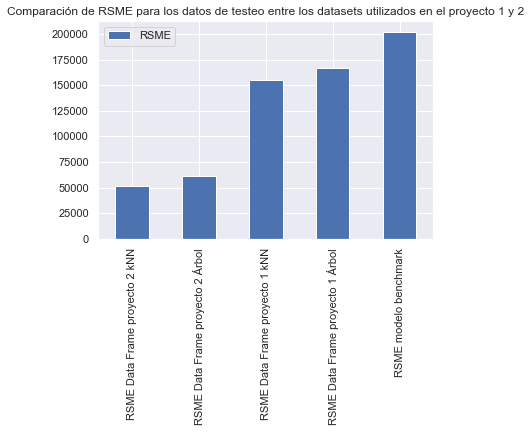

In [200]:
RSME.plot(kind="bar",title='Comparación de RSME para los datos de testeo entre los datasets utilizados en el proyecto 1 y 2')


**Análisis final punto A**

Hay una mejora muy evidente en la métrica elegida para el dataset con el procesamiento realizado en este proyecto. El modelo con el mejor rendimiento es el de vecinos cercanos. En segundo lugar, se encuentra el modelo de árbol de decisión. Ambos modelos tienen una amplia diferencia respecto al rendimiento con el dataset del proyecto 1. 
Estamos comparando los modelos con los mismos hiperparámetros elegidos en el proyecto 1, de forma arbitraria. La mejora, entonces se debe a que el pre procesamiento de los datos permite que los modelos mejoren sus parámétros. El tratamiento de valores nulos, el escalado, la creación de variables nuevas y la reducción de dimensionalidad posibilita que el modelo aprenda de forma más eficiente con los datos de entrenamiento. 
En el preprocesamiento del Proyecto 1, utilizamos solo 5 variables (rooms, bedrooms, bathrooms, surface_total, surface_covered), entre las cuales se encuentra la superficie total y cubierta, con muchos datos nulos. Asimismismo, los datos no están escalados y faltan variables que posiblemente tengan un peso importante para la predicción de los modelos. Como ejemplo, faltan variables relativas a la ubicación. Estas diferencias hacen que los datos de entrenamiento para los modelos sean menos eficientes en el dataset del proyecto 1 en comparación a los del proyecto 2.
En relación al mejor rendimiento del modelo kNN se puede deber a la elección de la estructura del modelo. La estructura la seleccionamos de manera arbitraria al colocar los hiperparámetros. 
Para entender qué modelo se aplica mejor al problema debemos hacer una selección más más precisa de los hiperparámetros. Si queremos comparar el rendimiento sobre un mismo dataframe, los modelos deberían tener la estructura que mejor se adapte al problema. En este caso, un modelo de árbol podría ser mejor que el kNN, pero la profundidad no ser la más adecuada y en consecuencia tener un peor rendimiento.
Sobre la base de este análisis podemos considerar que el preprocesamiento de los datos fue más eficiente que el realizado en el proyecto 1. A continuación seleccionaremos dos modelos avanzanzados y pondremos a prueba con el dataset de este último proyecto. 


# Parte B

### Punto 6. Elección de modelos avanzados: Random Forest y XGB

##### Modelo benchmark de regresión lineal
Creamos un modelo de regresión lineal para poder comparar el rendimientos de los modelos

Seleccionamos las variables. En este caso vamos a utilizar como variable dependiente al precio y como variables independientes al dataset con el procesamiento realizado en el punto anterior

In [201]:
#selección de variables
y = df_escalado.price
X = df_final

In [202]:
# Realizamos una división del dataset en un grupo de estrenamientos y otro de testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Definimos una función que nos permita evaluar los modelos. En este caso utilizaremos como métricas la raíz del error cuadrático medio y el coeficiente de determinación.

In [203]:
def evaluar_regresion(model, X_train, X_test, y_train, y_test):
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    ### CALCULAMOS EL ERROR
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)


    
    print(f'RSME en Train: {rmse_train}')
    print(f'RSME  en Test: {rmse_test}')
    print(f'Coeficiente de determinación para el modelo de regresión lineal con datos de entrenamiento:  {r2_train}')
    print(f'Coeficiente de determinación para el modelo de regresión lineal con datos de testeo:  {r2_test}')

    
    ### GRAFICAMOS LOS RESULTADOS
    plt.figure(figsize = (12,4))
    

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()

    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)

    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]

    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')

    plt.tight_layout()
    plt.show()

Vamos  instanciar los modelos. Comenzamos con el Random Forest y luego con el XGBboost. 
Los entrenamos con los datos de entrenamiento y evaluamos con la función antes explicada donde obtendremos las métricas sobre los datos de entrenamientos y finalmente, la más importante sobre los datos de testeo.

In [204]:
# Modelo Random Forest
rf_reg = RandomForestRegressor()

In [205]:
# Entrenamos
rf_reg.fit(X_train,y_train)

RandomForestRegressor()

RSME en Train: 18071.711594435743
RSME  en Test: 41598.906810250126
Coeficiente de determinación para el modelo de regresión lineal con datos de entrenamiento:  0.9770537476875587
Coeficiente de determinación para el modelo de regresión lineal con datos de testeo:  0.8782069628162588


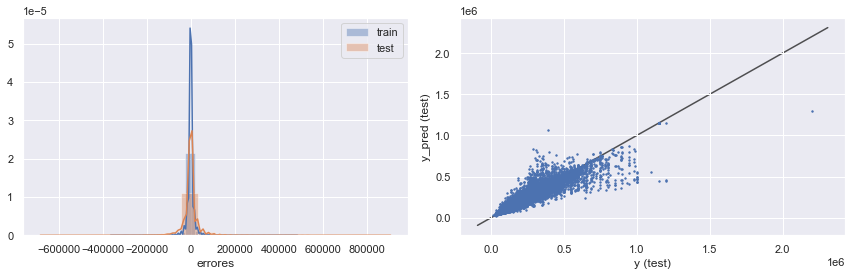

In [206]:
# Evaluamos 
evaluar_regresion(rf_reg, X_train, X_test, y_train, y_test)


**Análisis de los gráficos Random Forest**

En el histograma de errores podemos ver un sobre ajuste. Los errores sobre el conjunto de entrenamiento se agrupan de manera más uniforme y aguda sobre el 0  en comparación con los errores sobre el conjunto de testeo. Asimismo, el RSME del conjunto de entrenamiento es menos de la mitad del error en el testo, con lo cual se refuerza la idea del sobre ajuste.
De todas maneras, en el gráfico de los valores predichos y de testeo, los valores parecen corresponder de manera lineal y se observa una variación mucho menor que en los gráficos del proyecto 1. 



In [207]:
# Instanciamos
xgb_reg = xgb.XGBRegressor() 
print(xgb_reg)


XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None)


In [208]:
# Entrenamos
xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [209]:
# Obtenemos métricas que vienen como funciones ya instaladas dentro del modelo XGB
# Sobre los datos de entrenamiento
score_train = xgb_reg.score(X_train, y_train)  
print("Training score: ", score_train)

Training score:  0.8951683339769223


In [210]:
# Sobre los dato de testeo
score_test = xgb_reg.score(X_test, y_test)  
print("Test score: ", score_test)

Test score:  0.8499934416212785


RSME en Train: 38626.88162338854
RSME  en Test: 46166.37883521158
Coeficiente de determinación para el modelo de regresión lineal con datos de entrenamiento:  0.8951683339769223
Coeficiente de determinación para el modelo de regresión lineal con datos de testeo:  0.8499934416212785


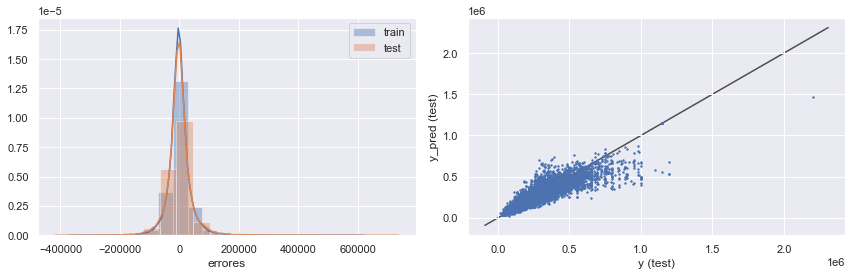

In [211]:
# Evaluamos el modelo
evaluar_regresion(xgb_reg, X_train, X_test, y_train, y_test)

**Análisis de los gráficos XGB**

El histograma de errores muestra una distribución simétrica y uniforme con media en 0, para ambos conjuntos. Es una buena señal de que el modelo no se sobre adaptó a los datos del entrenamiento.
La diferencia entre los valores del RSME para los datos de entrenamiento y testeo es menor que en el caso del Random Forest. 



**Funciones**

Vamos a desarrollar dos funciones que nos permitan comparar los modelos sobre los datos de testeo, con métricas diferentes. Continuamos utilizando el RSME y R2 para mantener una consistencia con las comparaciones. Los modelos a comparar son los dos avanzados elegidos y los modelos de árbol y kNN utilizados en el proyecto 1. 
Los modelos avanzados tienen los hiperparámetros por defecto. Por el contrario, los modelos simples tuvieron una optimización manual durante el proyecto 1.

In [212]:
# Definimos la función para RSME
def comparar_modelos(train, label):
    results={}
    def test_model(clf):
        
        y_test_pred = clf.predict(train)
        rmse_test = np.sqrt(mean_squared_error(label, y_test_pred))
        return rmse_test


    clf = cfl_benchmark
    results["Reg. Benchmark"]=test_model(clf)
    
    clf = clf_tree_best
    results["Árbol Pr. 1"]=test_model(clf)
    
    clf = clf_knn_best
    results["kNN Pr. 1"]=test_model(clf)
    
    clf = rf_reg
    results["Random Forest"]=test_model(clf)
    
    clf = xgb_reg
    results["XGBreg"]=test_model(clf)
    
    
    
    
    
    results = pd.DataFrame.from_dict(results, orient='index')
    results.columns=['RSME']
    results = pd.DataFrame(results['RSME'].sort_values(ascending=False))
    results.plot(kind="bar",title="Model Scores")
    axes = plt.gca()
    
    return results

,RSME
Reg. Benchmark,64399.699881
Árbol Pr. 1,61697.013817
kNN Pr. 1,51352.477502
XGBreg,46166.378835
Random Forest,41598.906810


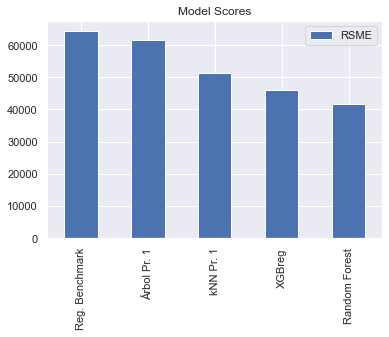

In [213]:
# Instanciamos la función con los datos de testeo con RSME
comparar_modelos(X_test, y_test)

**Análisis del gráfico**

El modelo que obtuvo el mejor rendimiento fue el Random Forest. Si comparamos con el modelo de de kNN del proyecto 1, sigue teniendo un buen rendimiento para ser un modelo simple.


**Validación cruzada**

Vamos a realizar una validación cruzada para contrastar los resultados obtenidos y descartar que hayan sido un producto aleatorio de la división en datos de entrenamientoa y testeo.
Definimos una función, utilizando un KFOld en 3 splits para no sobrecargar el proceso, lo ideal sería hacerlo con 5.
Nuevamente utilizaremos como métricas el RSME y el r2.

In [214]:
# Definimos la función para r2
def cv_r2(train,labels):
    results={}
    def test_model(clf):
        
        cv = KFold(n_splits=3,shuffle=True,random_state=45)
        r2 = make_scorer(r2_score)
        r2_val_score = cross_val_score(clf, train, labels, cv=cv,scoring=r2)
        scores=[r2_val_score.mean()]
        return scores

    clf = cfl_benchmark
    results["Reg. Benchmark"]=test_model(clf)
    
    clf = clf_tree_best
    results["Árbol Pr. 1"]=test_model(clf)
    
    clf = clf_knn_best
    results["kNN Pr. 1"]=test_model(clf)
    
    clf = rf_reg
    results["Random Forest"]=test_model(clf)
    
    clf = xgb_reg
    results["XGBreg"]=test_model(clf)
   
    
    results = pd.DataFrame.from_dict(results,orient='index')
    results.columns=["R Square Score"] 
    results = pd.DataFrame(results["R Square Score"].sort_values(ascending=False))
    results.plot(kind="bar",title="Model Scores")
    axes = plt.gca()
    return results

,R Square Score
Random Forest,0.877223
XGBreg,0.846669
kNN Pr. 1,0.811065
Árbol Pr. 1,0.726830
Reg. Benchmark,0.712163


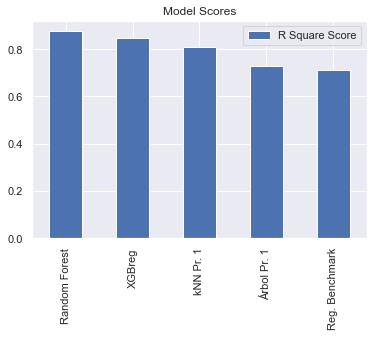

In [215]:
#Instanciamos la función con todos los datos.
cv_r2(X, y)

El mejor rendimiento lo obtuvo nuevamente el Random Forest y el orden es el mismo al resultado anterior, por lo tanto la división entre dats de testeo y entrenamiento fue adecuado.

In [216]:
# Definimos la misma función pero con RSME
def cv_rsme(train,labels):
    results={}
    def test_model(clf):
        
        
        cv = KFold(n_splits=3,shuffle=True,random_state=45)
        rmse = np.sqrt(-cross_val_score(clf, train, labels,scoring="neg_mean_squared_error",cv=cv))
        scores=[rmse.mean()]
        return scores

    clf = cfl_benchmark
    results["Reg. Benchmark"]=test_model(clf)
    
    clf = clf_tree_best
    results["Árbol Pr. 1"]=test_model(clf)
    
    clf = clf_knn_best
    results["kNN Pr. 1"]=test_model(clf)
    
    clf = rf_reg
    results["Random Forest"]=test_model(clf)
    
    clf = xgb_reg
    results["XGBreg"]=test_model(clf)
    
   
    
    results = pd.DataFrame.from_dict(results,orient='index')
    results.columns=["RSME"] 
    results = pd.DataFrame(results["RSME"].sort_values(ascending=False))
    results.round()
    results.plot(kind="bar",title="Model Scores")
    axes = plt.gca()
 
    return results

,RSME
Reg. Benchmark,63985.811476
Árbol Pr. 1,62333.087994
kNN Pr. 1,51840.299463
XGBreg,46700.802239
Random Forest,41833.139684


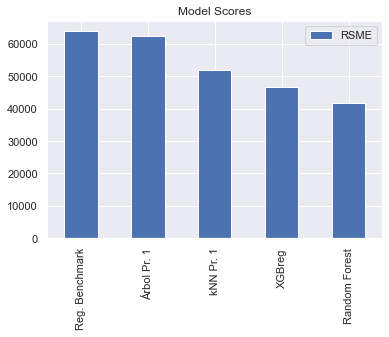

In [217]:
# Instanciamos
cv_rsme(X, y)

El resultado obtenido con esta métrica es la misma, el mejor modelo es el Random Forest.

**Punto 7. Optimización de hiperparámetros.**

En este punto vamos buscar y seleccionar los mejores hiperparámetros para ambos modelos seleccionados, de modo tal de obtener sus mejores rendimientos sobre el dataset de properati.
Para el modelo de Random Forest, establecemos un rango de valores para los hiperparámetros que queremos optimizar. Utilizaremos la función de RandomizedSearchCV, que realiza una búsqueda aleatoria sobre los hiperparámetros y, asimismo, optimiza los parámteros del modelo mediante validación cruzada. El objetivo es obtener una idea de cuales son los hiperparámetros más eficientes y realizar una "malla fina" de valores o una selección previa,  en los cuales utilizar la función de GridSearchCV.
A diferencia de la función mencionada, GridSearchCV evalúa todos los valores de la grilla que que definimos mediante la elección al azar en RandomSearch.
Según la documentación de Scikit-Learn, sobre RandomForest, los hiperparámetros más relevantes son el número de árboles (n_estimators) y el número en que se puede dividir cada nodo (max_features), por lo tanto intentaremos mejorar mediante este método.
En el caso del model de Boosting, realizaremos una optimización de hiperparámetros mediante la búsqueda rándom, para reducir los tiempos de procesamiento.


In [218]:
# Instanciamos el modelo de árboles random.
rf_reg1 = RandomForestRegressor()

Realizamos una grilla con rango de valores en dónde realizaremos la búsqueda random de hiperparámetros. 

In [219]:
# Número de árboles. Realizamos un rango de valores mediante la función de numpay linspace
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Número de variables a considerar en cada división de los nodos. Si es "auto", la cantidad es igual a n_variables (13) y si es 'sqrt' es sqrt(n_variables)
max_features = ['auto', 'sqrt']
# Máximo número de niveles en el árbol
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Mínimo número de muestras para dividir un nodo
min_samples_split = [2, 5, 10]
#  Mínimo número de muestras requerido en cada nodo
min_samples_leaf = [1, 2, 4]
#  Método de selección de muestras para entrenar cada árbol.
bootstrap = [True, False]
# Creamos la grilla
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [220]:
# Usamos la grilla para buscar los mejores hiperparámetros
# Primero creamos el modelo base para optimizar

# Random search de hiperparámtros usando una validación cruzada  de 3 K-folds
rf_random = RandomizedSearchCV(estimator = rf_reg1, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, n_jobs = -1, random_state=42)

In [221]:
# Entrenamos
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 18.0min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [222]:
# Imprimimos los mejores parámetros y el mejor rendimiento obtenido en r2
print("Mejores parametros: "+str(rf_random.best_params_))
print("Mejor Score: "+str(rf_random.best_score_)+'\n')

scores = pd.DataFrame(rf_random.cv_results_)
scores

Mejores parametros: {'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 60, 'bootstrap': False}
Mejor Score: 0.8571645800751536



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,14.825151,0.174755,1.188420,0.058062,200,10,2,sqrt,50,True,"{'n_estimators': 200, 'min_samples_split': 10,...",0.843538,0.841316,0.843547,0.842800,0.001050,6
1,62.699216,0.438443,3.995024,0.118783,600,10,4,sqrt,90,False,"{'n_estimators': 600, 'min_samples_split': 10,...",0.844290,0.841703,0.845162,0.843719,0.001469,5
2,243.956870,1.659384,10.026504,1.484884,600,2,2,auto,60,False,"{'n_estimators': 600, 'min_samples_split': 2, ...",0.774059,0.771053,0.762150,0.769087,0.005057,9
3,132.997187,1.537171,30.467752,9.193898,1400,5,1,sqrt,30,True,"{'n_estimators': 1400, 'min_samples_split': 5,...",0.855810,0.854690,0.859188,0.856563,0.001912,2
4,385.297388,1.783696,20.761824,0.610103,1000,10,1,auto,80,False,"{'n_estimators': 1000, 'min_samples_split': 10...",0.782599,0.781041,0.774162,0.779267,0.003666,8
5,48.761326,0.801713,3.491493,0.374027,400,10,1,sqrt,60,False,"{'n_estimators': 400, 'min_samples_split': 10,...",0.857492,0.854874,0.859128,0.857165,0.001752,1
6,745.717673,1.448917,56.002978,1.364793,2000,2,2,auto,50,False,"{'n_estimators': 2000, 'min_samples_split': 2,...",0.774083,0.771048,0.762126,0.769086,0.005075,10
7,9.865199,0.138797,0.611980,0.014746,200,5,2,sqrt,10,True,"{'n_estimators': 200, 'min_samples_split': 5, ...",0.790645,0.790350,0.790158,0.790385,0.000200,7
8,285.755219,7.285686,11.804780,1.885881,1200,2,4,auto,100,True,"{'n_estimators': 1200, 'min_samples_split': 2,...",0.850495,0.845070,0.849803,0.848456,0.002411,4
9,459.154279,8.858724,27.267840,1.777373,2000,5,2,auto,50,True,"{'n_estimators': 2000, 'min_samples_split': 5,...",0.857164,0.851585,0.855607,0.854785,0.002351,3


In [223]:
# Definimos una función para evaluar la mejora en el rendimiento con los hiperparámetros elegidos mediante Random Search
def evaluando(modelo, test_features, test_labels):
    predictions = modelo.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Performance del modelo')
    print('Error promedio: {:0.4f} grados.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy


In [224]:
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)


RandomForestRegressor(n_estimators=10, random_state=42)

In [225]:
# Instanciamos la función con el modelo base
base_accuracy = evaluando(base_model, X_test, y_test)

Performance del modelo
Error promedio: 20512.2403 grados.
Accuracy = 89.79%.


Obtenemos una axactitud de 93.52% para el modelo base.

In [226]:
# Evaluamos con el mejor estimador
best_random = rf_random.best_estimator_
random_accuracy = evaluando(best_random, X_test, y_test)

Performance del modelo
Error promedio: 20830.5812 grados.
Accuracy = 89.63%.


Obtenemos una axactitud de 94.02% para el modelo con los hp elegidos mediante Random Search

In [227]:
#Imprimimos la mejora
print('Mejora del {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Mejora del -0.18%.


Utilizando los valores obtenidos para los hiperparámetros, obtuvimos una mejora en el rendimientos de 0.53%. El siguiente paso es utilizar una grilla con rangos más estrechos donde utilizar el GridSearch

In [232]:
# Creamos la grilla basada en el resulado del random search  
param_grid = {
    'bootstrap': [False],
    'max_depth': [40, 60, 80],
    'max_features': ['sqrt'],
    'min_samples_leaf': [0,1, 2],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [200, 400, 600]
}

In [233]:
# Creamos un modelo base
rf = RandomForestRegressor()

In [234]:
# Instanciamos el modelo GridSearch
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [235]:
# Entrenamos el modelo
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 10.2min
[Parallel(n_jobs=-1)]: Done 243 out of 243 | elapsed: 18.6min finished


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [False], 'max_depth': [40, 60, 80],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [0, 1, 2],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [200, 400, 600]},
             verbose=2)

In [236]:
# Imprimimos los mejores parámetros y un dataframe con todas las combinaciones probadas
print("Mejores parametros: "+str(grid_search.best_params_))
print("Mejor Score: "+str(grid_search.best_score_)+'\n')

scores = pd.DataFrame(grid_search.cv_results_)
scores.head()

Mejores parametros: {'bootstrap': False, 'max_depth': 60, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 600}
Mejor Score: 0.8588564021633244



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.218794,0.012762,0.0,0.0,False,40,sqrt,0,8,200,"{'bootstrap': False, 'max_depth': 40, 'max_fea...",NaN,NaN,NaN,NaN,NaN,81
1,0.417204,0.039564,0.0,0.0,False,40,sqrt,0,8,400,"{'bootstrap': False, 'max_depth': 40, 'max_fea...",NaN,NaN,NaN,NaN,NaN,56
2,0.594048,0.019485,0.0,0.0,False,40,sqrt,0,8,600,"{'bootstrap': False, 'max_depth': 40, 'max_fea...",NaN,NaN,NaN,NaN,NaN,57
3,0.221029,0.045506,0.0,0.0,False,40,sqrt,0,10,200,"{'bootstrap': False, 'max_depth': 40, 'max_fea...",NaN,NaN,NaN,NaN,NaN,58
4,0.372565,0.026106,0.0,0.0,False,40,sqrt,0,10,400,"{'bootstrap': False, 'max_depth': 40, 'max_fea...",NaN,NaN,NaN,NaN,NaN,59


In [240]:
# Evaluaomos el modelo con mejor rendimiento en la búsqueda
best_grid = grid_search.best_estimator_
grid_accuracy = evaluando(best_grid, X_test, y_test)

Performance del modelo
Error promedio: 20188.8763 grados.
Accuracy = 89.95%.


In [241]:
# Imprimimos la mejora
print('Mejora del {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Mejora del 0.18%.


Vamos a instanciar el modelo de árbol con los hiperparámtros que obtuvimos mediante grid search. La mejora en el rendimiento del modelo es de 0.18 %.

In [237]:
# Instanciamos
rf_hp = RandomForestRegressor(n_estimators=2000,
    criterion='mse',
    max_depth=60,
    min_samples_split=8,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='sqrt',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=False,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    ccp_alpha=0.0,
    max_samples=None,
)


In [238]:
# Entrenamos
rf_hp.fit(X_train, y_train)

RandomForestRegressor(bootstrap=False, max_depth=60, max_features='sqrt',
                      min_samples_split=8, n_estimators=2000)

Evaluamos el modelo con sus hiperparámetros optimizados con el función evaluar_regresion para obtener las métricas que utilizamos para comparar los modelos.

RSME en Train: 20653.407026035613
RSME  en Test: 41146.04717537296
Coeficiente de determinación para el modelo de regresión lineal con datos de entrenamiento:  0.9700293198791418
Coeficiente de determinación para el modelo de regresión lineal con datos de testeo:  0.880844288449751


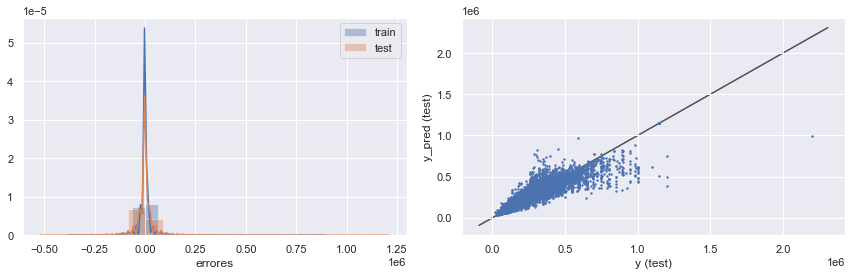

In [239]:
# Evaluamos 
evaluar_regresion(rf_hp, X_train, X_test, y_train, y_test)

En el histograma se ve que hay un sobre ajuste sobre los datos de entrenamiento. El RSME es de casi la mitad con los datos de entrenamiento en relación a los obtenidos con los de testeo. 

**Model XGB**

Vamos a realizar el mismo procedimiento con el modelo XGB, optimizando solo con random search.

In [242]:
# Instanciamos el model
xgb_hp = xgb.XGBRegressor() 
print(xgb_hp)

XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None)


In [243]:
# Hacemos un train, test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.33, random_state=42)

Realizamos un diccionario con los hiperparámetros que queremos optimizar. En esta caso seleccionamos como booster un modelo de árbol (booster='gbtree') por lo tanto vamos a elegir las características más relevantes para optimizar: 

1) learning_rate, rango de 0.0 - 1.0, ajusta los pesos asignados a cada variables para prevenir un sobreajuste
2) max_depth, la profundidad del árbol. Tiene un rango de 0 - ∞, a valores superiores aumenta la complejidad del modelo y la posibilidad de sibreajustar los datos de entrenamiento.
3) 'min_child_weight', el peso mínimo a partir del cual un nodo se puede dividir. Si el peso asignado es menos a ese valor se particiona en otro nodo. Cuanto más grande el valor, más consvador es el modelo. 
4) 'subsample', la proporción de los datos de entrenamiento que toma aleatoriamente el modelo previo al crecimiento de los árboles. 
5) 'n_estimators', número de árboles.


In [244]:

random_grid = {
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 500]
    }

In [245]:
# Instanciamos el modelo
xgb_hp_random = RandomizedSearchCV(estimator = xgb_hp, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [246]:
# Entrenamos
xgb_hp_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   55.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  9.9min finished


RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                          random_state=None, reg_alpha=None,
                                          reg_lambda=None,
                                          scale_pos_we

In [247]:
# Imprimimos los mejores parámetros
print("Mejores parametros: "+str(xgb_hp_random.best_params_))
print("Mejor Score: "+str(xgb_hp_random.best_score_)+'\n')

scores = pd.DataFrame(xgb_hp_random.cv_results_)
scores

Mejores parametros: {'subsample': 0.5, 'n_estimators': 500, 'min_child_weight': 1, 'max_depth': 10, 'learning_rate': 0.1, 'colsample_bytree': 0.7}
Mejor Score: 0.8554484141033227



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_subsample,param_n_estimators,param_min_child_weight,param_max_depth,param_learning_rate,param_colsample_bytree,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,11.355789,0.014736,0.468887,0.000006,0.7,200,3,7,0.01,0.5,"{'subsample': 0.7, 'n_estimators': 200, 'min_c...",0.709775,0.719745,0.710950,0.713490,0.004449,73
1,3.359097,0.091588,0.072938,0.007369,0.7,100,5,3,0.01,0.7,"{'subsample': 0.7, 'n_estimators': 100, 'min_c...",0.206045,0.220699,0.210277,0.212340,0.006158,98
2,31.361109,0.076983,1.204722,0.083938,0.5,500,1,7,0.1,0.7,"{'subsample': 0.5, 'n_estimators': 500, 'min_c...",0.843973,0.844013,0.848419,0.845468,0.002087,10
3,5.930909,0.078012,0.187991,0.012234,0.5,100,3,7,0.01,0.5,"{'subsample': 0.5, 'n_estimators': 100, 'min_c...",0.252013,0.273097,0.262200,0.262437,0.008609,90
4,6.646915,0.045712,0.195311,0.021687,0.7,100,1,7,0.01,0.7,"{'subsample': 0.7, 'n_estimators': 100, 'min_c...",0.275915,0.291306,0.279489,0.282237,0.006577,83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,27.851582,0.139153,0.897587,0.039496,0.5,500,5,7,0.1,0.5,"{'subsample': 0.5, 'n_estimators': 500, 'min_c...",0.836816,0.835206,0.839250,0.837091,0.001662,17
96,3.621974,0.038005,0.092674,0.005186,0.5,100,5,3,0.1,0.7,"{'subsample': 0.5, 'n_estimators': 100, 'min_c...",0.776254,0.779253,0.768309,0.774605,0.004617,52
97,12.565883,0.130162,0.415700,0.007847,0.5,200,1,7,0.01,0.5,"{'subsample': 0.5, 'n_estimators': 200, 'min_c...",0.708066,0.716391,0.709149,0.711202,0.003696,74
98,5.138576,0.051374,0.127010,0.002944,0.7,100,5,5,0.01,0.7,"{'subsample': 0.7, 'n_estimators': 100, 'min_c...",0.250967,0.268362,0.255166,0.258165,0.007411,91


In [248]:
# Instanciamos un modelo base
base_model = xgb.XGBRegressor() 
base_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [249]:
# Evaluamos el modelo base
base_accuracy = evaluando(base_model, X_test, y_test)


Performance del modelo
Error promedio: 27994.8247 grados.
Accuracy = 85.58%.


In [250]:
# Evaluamos el modelo con mejor rendimiento obtenido por random search
best_random = xgb_hp_random.best_estimator_
random_accuracy = evaluando(best_random, X_test, y_test)

Performance del modelo
Error promedio: 21745.0773 grados.
Accuracy = 88.73%.


In [251]:
# Imprimimos la mejora
print('Mejora del {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Mejora del 3.68%.


La elección de los hiperparámetros paraece ser la adecuada. Se obtuvo una mejore del 3.68% los de haber optimizados los parámetros. 
Posiblemente, se pueda disminuir la cantidad de árboles utilizada, obtener un buen rendimiento y disminuir el tiempo de proceso. 
Lo mismo sucede con la profundidad máxima, si bien son valores en los cuales por random search se obtienen mejores rendimientos, podría suceder que a valores mucho menores la diferencia de rendimiento sea despreciable, ganando simpleza del modelo y utilizando menos recursos.

In [252]:
# Instanciamos el modelo con mejor rendimiento
xgb_hp = xgb_hp_random.best_estimator_

In [253]:
# Entrenamos el modelo c
xgb_hp.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=10,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.5,
             tree_method='exact', validate_parameters=1, verbosity=None)

RSME en Train: 20574.03698992333
RSME  en Test: 40695.40659072184
Coeficiente de determinación para el modelo de regresión lineal con datos de entrenamiento:  0.9702592289885041
Coeficiente de determinación para el modelo de regresión lineal con datos de testeo:  0.8834400348593142


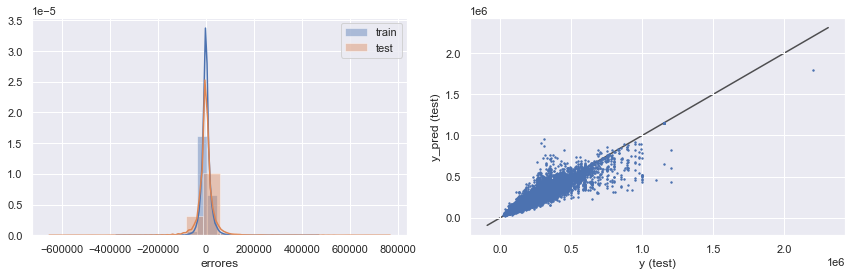

In [254]:
# Evaluamos
evaluar_regresion(xgb_hp, X_train, X_test, y_train, y_test)

Al igual que con el modelo de Random Forest, parece haber un sobre ajuste sobre los datos de entrenamiento. La diferencia de error entre ambos es levemente menor que para el modelo de Random Forest.

**Comparando los modelos**
Vamos a comparar los rendimientos de todos los modelos puestos a prueba, desde el proyecto 1 hasta los modelos avanzados con sus hiperparámetros optimizados.


In [255]:
# Definimos una función para comparar con RSME
def comparar_modelos(train, label):
    results={}
    def test_model(clf):
        
        y_test_pred = clf.predict(train)
        rmse_test = np.sqrt(mean_squared_error(label, y_test_pred))
        return rmse_test


    clf = cfl_benchmark
    results["Reg. Benchmark"]=test_model(clf)
    
    clf = clf_tree_best
    results["Árbol Pr. 1"]=test_model(clf)
    
    clf = clf_knn_best
    results["kNN Pr. 1"]=test_model(clf)
    
    clf = rf_reg
    results["Random Forest"]=test_model(clf)
    
    clf = rf_hp
    results["Random Forest con hp"]=test_model(clf)
    
    clf = xgb_reg
    results["XGBreg"]=test_model(clf)
    
    clf = xgb_hp
    results["XGBreg con hp"]=test_model(clf)
    
    
    
    
    
    
    results = pd.DataFrame.from_dict(results, orient='index')
    #results.round
    results.columns=['RSME']
    results= pd.DataFrame(results['RSME'].sort_values(ascending = False))
    results.plot(kind="bar",title="Model Scores")
    axes = plt.gca()
    
    return results

,RSME
Reg. Benchmark,64399.699881
Árbol Pr. 1,61697.013817
kNN Pr. 1,51352.477502
XGBreg,46166.378835
Random Forest,41598.906810
Random Forest con hp,41146.047175
XGBreg con hp,40695.406591


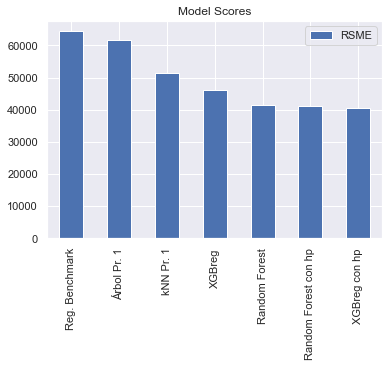

In [256]:
comparar_modelos(X_test, y_test)

EL modelo con mejor rendimiento fue el XGB con optimización de hiper parámetros. Asimismo sobre ajustó un poco menos que el modelo de RF.

**Validación cruzada**

Vamos a utilizar dos funciones para comprar con validación cruzada. Una con RSME y otra con r2.


In [257]:
def cv_r2(train,labels):
    results={}
    def test_model(clf):
        
        cv = KFold(n_splits=3,shuffle=True,random_state=45)
        r2 = make_scorer(r2_score)
        r2_val_score = cross_val_score(clf, train, labels, cv=cv,scoring=r2)
        scores=[r2_val_score.mean()]
        return scores

    clf = cfl_benchmark
    results["Reg. Benchmark"]=test_model(clf)
    
    clf = clf_tree_best
    results["Árbol Pr. 1"]=test_model(clf)
    
    clf = clf_knn_best
    results["kNN Pr. 1"]=test_model(clf)
    
    clf = rf_reg
    results["Random Forest"]=test_model(clf)
    
    clf = rf_hp
    results["Random Forest con hp"]=test_model(clf)
    
    clf = xgb_reg
    results["XGBreg"]=test_model(clf)
    
    clf = xgb_hp
    results["XGBreg con hp"]=test_model(clf)
    
   
    
    results = pd.DataFrame.from_dict(results,orient='index')
    results.columns=["R Square Score"] 
    results = pd.DataFrame(results["R Square Score"].sort_values(ascending=False))
    results.plot(kind="bar",title="Model Scores")
    axes = plt.gca()
    return results

,R Square Score
XGBreg con hp,0.878111
Random Forest,0.878039
Random Forest con hp,0.877582
XGBreg,0.846669
kNN Pr. 1,0.811065
Árbol Pr. 1,0.723229
Reg. Benchmark,0.712163


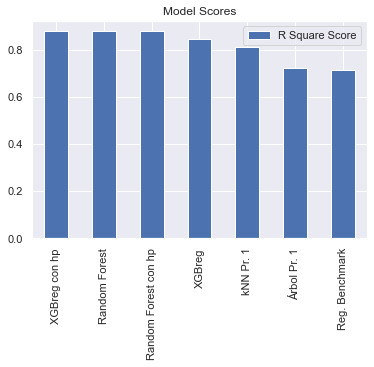

In [258]:
cv_r2(X, y)

Mediante la métrica de r2, los resultados fueron similares. 

In [259]:
def cv_rsme(train,labels):
    results={}
    def test_model(clf):
        
        
        cv = KFold(n_splits=3,shuffle=True,random_state=45)
        rmse = np.sqrt(-cross_val_score(clf, train, labels,scoring="neg_mean_squared_error",cv=cv))
        scores=[rmse.mean()]
        return scores

    clf = cfl_benchmark
    results["Reg. Benchmark"]=test_model(clf)
    
    clf = clf_tree_best
    results["Árbol Pr. 1"]=test_model(clf)
    
    clf = clf_knn_best
    results["kNN Pr. 1"]=test_model(clf)
    
    clf = rf_reg
    results["Random Forest"]=test_model(clf)
    
    clf = rf_hp
    results["Random Forest con hp"]=test_model(clf)
    
    clf = xgb_reg
    results["XGBreg"]=test_model(clf)
    
    clf = xgb_hp
    results["XGBreg con hp"]=test_model(clf)
    
   
    
    results = pd.DataFrame.from_dict(results,orient='index')
    results.columns=["RSME"] 
    results = pd.DataFrame(results["RSME"].sort_values(ascending=False))
    results.round()
    results.plot(kind="bar",title="Model Scores")
    axes = plt.gca()
 
    return results

,RSME
Reg. Benchmark,63985.811476
Árbol Pr. 1,62736.609570
kNN Pr. 1,51840.299463
XGBreg,46700.802239
Random Forest con hp,41737.059495
Random Forest,41718.946187
XGBreg con hp,41638.544696


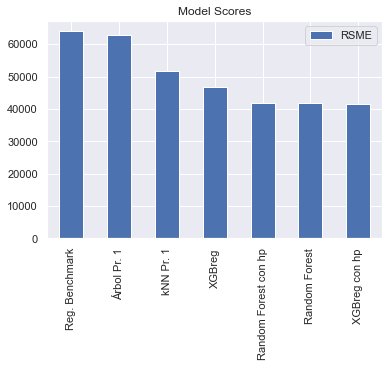

In [260]:
cv_rsme(X, y)

EL resultado luego de realizar una validación cruzada es muy similar, por lo tanto la división de datos original en datos de testeo y entrenamiento fue ralizada de manera válida.

Vamos a analizarqué variables fueron más importantes en el modelos XGB. EL modelo tienen integrada una función que categoriza las variables según tres tipos de características.

* Peso de las variables: el número de veces que una variable aparece en cada árbol del ensamble.

* Ganancia: ganancia que aporta cada variable en la reducción de la impureza

* Covertura: es el promedio de las instancias afectadas en cada variable


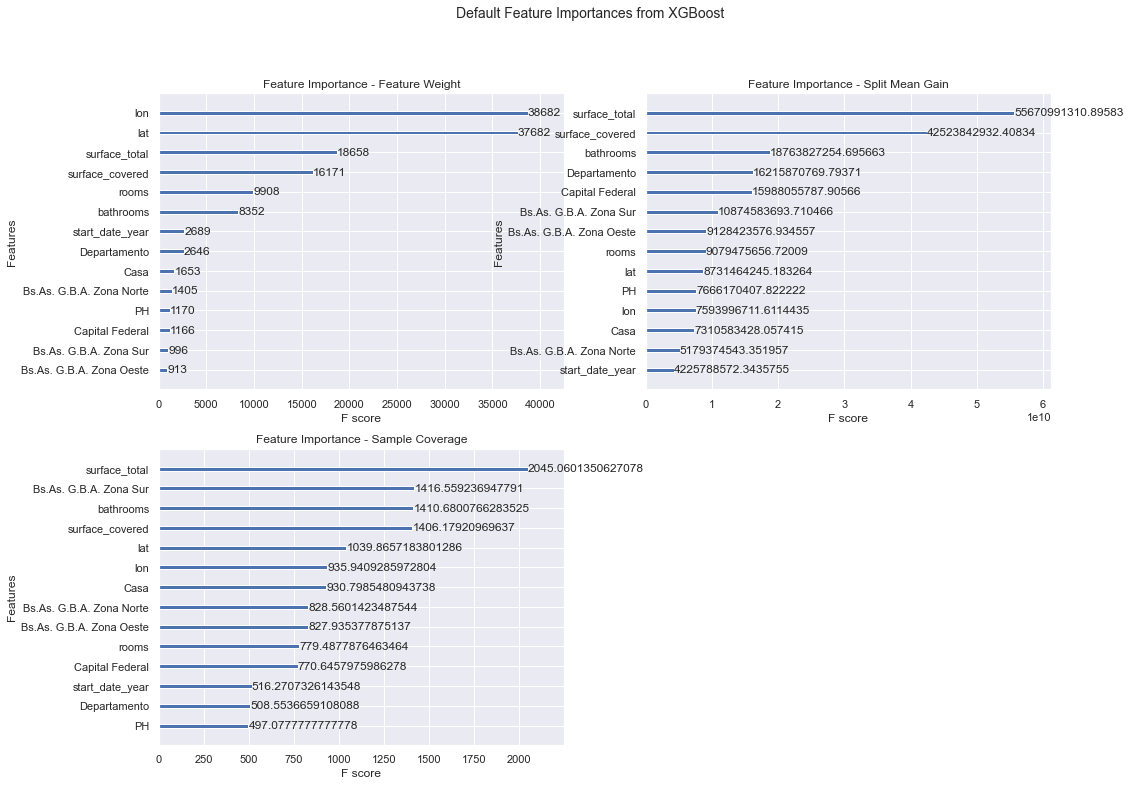

In [261]:
fig = plt.figure(figsize = (16, 12))
title = fig.suptitle("Default Feature Importances from XGBoost", fontsize=14)

ax1 = fig.add_subplot(2,2, 1)
xgb.plot_importance(xgb_hp, importance_type='weight', ax=ax1)
t=ax1.set_title("Feature Importance - Feature Weight")

ax2 = fig.add_subplot(2,2, 2)
xgb.plot_importance(xgb_hp, importance_type='gain', ax=ax2)
t=ax2.set_title("Feature Importance - Split Mean Gain")

ax3 = fig.add_subplot(2,2, 3)
xgb.plot_importance(xgb_hp, importance_type='cover', ax=ax3)
t=ax3.set_title("Feature Importance - Sample Coverage")

Antes de analizar la importancia de las variables, es importante aclarar que la elección de la forma de evaluar cada variable es sensible al criterio utilizado para el problema. Si elegimos la importancia de cada variable en función de la pérdida de impureza que genera en cada división, la superficie total sería la variable más importante. Pero, si consideramos el número de veces que una variable aparece en los árboles, la longitud sería la variable más importante.

Por otro lado, la importancia de las variables fueron desarrolladas por algorítmos específicos del XGB. Si quisiéramos evaluar la importancia con otros modelos, por ejempo de soporte vectorial, deberíamos calularlos con ese modelo. 

Otra limitación de estas mediciones, es que no tiene interpretación local. Si, llevamos este modelo a una población por fuera de la provincia de Buenos Aires, posiblemente habría sesgos que no se tomarían en cuenta.

Sin embargo, habiendo aclarado las limitaciones en la interpretabilidad del modelo, podemos decir que, a modo intuitivo y en relación al sentido común, la importancia de las variables elegidas se asemejan a la realidad. En general, se dice que lo más relevante para valuar una proiedad es la locación y en menor medida la superficie. Un departamento de dos ambientes en puerto madero posiblemten sea más cara que en otras zonas de la ciudad. Particularmente, son las dos variables más importantes que considera el modelo: superficie total y cubierta en ganancia y cobertura, y lat y lon en peso.

Como consideración final, y crítica al trabajo realizado, creo que la variable ubicación no fue del todo bien interpretada. Por un lado, tiene muchas intancias repetidas, además de valores faltantes y como crítica más importante, el escalado no fue correcto. Las coordenadas no pueden escalarse porque pierden la representatibilidad, los cálculos que realicemos deberían ser específicos de las coordenadas polares. Intenté realizar una multiplicación polar para obtener una sola variable que representara la ubicación pero no llegué a una metodología fiable. 

Por último, creo que lo más importante fue el preprocesamiento y la interpretación de los datos. 
